In [2]:
# You can run this cell if you want to take a look at the individual components that go into the equations of motion
# but the next one has a super slow simplifying step, so avoid running that one if possible.
# The pickle containing the calculated and simplified expressions you need should be in the repo, so just start from the
# unpickling cell instead.

%reset
# DERIVE THE EOMs SYMBOLICALLY --------------------------------------------------------------------------------------------

# import libraries
import sympy as sym
import numpy as np

sym.init_printing()
from IPython.display import display #for pretty printing

# create symbolic variables

# system parameters

# b = body
# h = leg

g = sym.symbols('g')
mb,mn,mh1,mh2,mt = sym.symbols(['m_{b}','m_{n}','m_{h1}','m_{h2}','m_{t}']) # mass
lb,ln,lh1,lh2,lt = sym.symbols(['l_{b}','l_{n}','l_{h1}','l_{h2}','l_{t}']) # length
Inb,Inn,Inh1,Inh2,Int = sym.symbols(['In_{b}','In_{n}','In_{h1}','In_{h2}','In_{t}']) # mass
ks = sym.symbols('ks')   #spring constant
kd = sym.symbols('kd')   #spring constant

# generalized coordinates

# x, y = torso COM position
# thb = body angle ccw from X
# thf1, thf2, thh1, thh2 = angles ccw from parent link (aka shoulder, elbow, hip, knee)

sides = ['R','L']
x,y,thb,thn,tht = sym.symbols(['x','y','\\theta_{b}','\\theta_{n}','\\theta_{t}']) 
dx,dy,dthb,dthn,dtht = sym.symbols(['\dot{x}','\dot{y}','\dot{\\theta}_{b}','\dot{\\theta}_{n}','\dot{\\theta}_{t}']) 
ddx,ddy,ddthb,ddthn,ddtht = sym.symbols(['\ddot{x}','\ddot{y}','\ddot{\\theta}_{b}','\ddot{\\theta}_{n}','\ddot{\\theta}_{t}']) 


thh1  = [sym.symbols('\\theta_{h1%s}'%sides[i]) for i in range(len(sides))]
thh2  = [sym.symbols('\\theta_{h2%s}'%sides[i]) for i in range(len(sides))]


dthh1  = [sym.symbols('\dot{\\theta}_{h1%s}'%sides[i]) for i in range(len(sides))]
dthh2  = [sym.symbols('\dot{\\theta}_{h2%s}'%sides[i]) for i in range(len(sides))]


ddthh1  = [sym.symbols('\ddot{\\theta}_{h1%s}'%sides[i]) for i in range(len(sides))]
ddthh2  = [sym.symbols('\ddot{\\theta}_{h2%s}'%sides[i]) for i in range(len(sides))]

# q = sym.Matrix([x]+[y]+[thb]+thf1+thf2+thh1+thh2)
# dq = sym.Matrix([dx]+[dy]+[dthb]+dthf1+dthf2+dthh1+dthh2)
# ddq = sym.Matrix([ddx]+[ddy]+[ddthb]+ddthf1+ddthf2+ddthh1+ddthh2)

q = sym.Matrix([x]+[y]+[thb]+[thn]+[tht]+thh1+thh2)
dq = sym.Matrix([dx]+[dy]+[dthb]+[dthn]+[dtht]+dthh1+dthh2)
ddq = sym.Matrix([ddx]+[ddy]+[ddthb]+[ddthn]+[ddtht]+ddthh1+ddthh2)

# forces
# tauf1  = [sym.symbols('\\tau_{f1%s}'%sides[i]) for i in range(len(sides))]
# tauf2  = [sym.symbols('\\tau_{f2%s}'%sides[i]) for i in range(len(sides))]
taut,taun,GRFx,GRFy = sym.symbols(['\\taut','\\taun','GRFx','GRFy']) 


tauh1  = [sym.symbols('\\tau_{h1%s}'%sides[i]) for i in range(len(sides))]
tauh2  = [sym.symbols('\\tau_{h2%s}'%sides[i]) for i in range(len(sides))]

# Gxf  = [sym.symbols('G_{xf%s}'%sides[i]) for i in range(len(sides))]
# Gyf  = [sym.symbols('G_{yf%s}'%sides[i]) for i in range(len(sides))]
Gxh  = [sym.symbols('G_{xh%s}'%sides[i]) for i in range(len(sides))]
Gyh  = [sym.symbols('G_{yh%s}'%sides[i]) for i in range(len(sides))]


rb = sym.Matrix([[x+0.5*lb*sym.cos(thb)],
                [y+0.5*lb*sym.sin(thb)],
                [thb]])      ##center of mass of body

rn = sym.Matrix([[x+lb*sym.cos(thb)+0.2*sym.cos(thb+thn)],
                [y+lb*sym.sin(thb)+0.2*sym.sin(thb+thn)],
                [thb+thn]])      ##center of mass of body


rt = sym.Matrix([[x-0.43*sym.cos(thb+tht)],
                [y-0.43*sym.sin(thb+tht)],
                 [thb+tht]])        ##tail center of mass


rh1 = []       ##center of mass of "thigh"
rh2 = []      ##center of mass of "lower-leg section


p_knee = []      #position of knee
p_hip = []       #position of hip
p_footh = []    #position of foot


Jb = rb.jacobian(q) # jacobians
Jn = rn.jacobian(q)
Jt = rt.jacobian(q)
Jh1 = []
Jh2 = []


vb = Jb*dq # velocities
vn = Jn*dq # velocities
vt = Jt*dq
vh1 = []
vh2 = []
v_footh = []

for i in range(len(sides)):
    p_hip.append(sym.Matrix([[x],
                            [y]]))
    
    rh1.append(sym.Matrix([[p_hip[i][0] + 0.5*lh1*sym.sin(thb+thh1[i])],
                          [p_hip[i][1] - 0.5*lh1*sym.cos(thb+thh1[i])],
                          [thb+thh1[i]]]))
    
    p_knee.append(sym.Matrix([[p_hip[i][0] + lh1*sym.sin(thb+thh1[i])],
                            [p_hip[i][1] - lh1*sym.cos(thb+thh1[i])]]))
    
    rh2.append(sym.Matrix([[p_knee[i][0] + 0.5*lh2*sym.sin(thb+thh1[i]+thh2[i])],
                          [p_knee[i][1] - 0.5*lh2*sym.cos(thb+thh1[i]+thh2[i])],
                          [thb+thh1[i]+thh2[i]]]))
    
    p_footh.append(sym.Matrix([[p_knee[i][0] + lh2*sym.sin(thb+thh1[i]+thh2[i])],
                            [p_knee[i][1] - lh2*sym.cos(thb+thh1[i]+thh2[i])]]))
    
    Jh1.append(rh1[i].jacobian(q))
    Jh2.append(rh2[i].jacobian(q))
    
    vh1.append(Jh1[i]*dq)
    vh2.append(Jh2[i]*dq)
    v_footh.append(p_footh[i].jacobian(q)*dq)
    
Mb = sym.Matrix([[mb,mb,Inb]])
Mn = sym.Matrix([[mn,mn,Inn]])
Mt = sym.Matrix([[mt,mt,Int]])
Mh1 = sym.Matrix([[mh1,mh1,Inh1]])
Mh2 = sym.Matrix([[mh2,mh2,Inh2]])
T = 0.5*Mb*sym.matrix_multiply_elementwise(vb,vb)+0.5*Mt*sym.matrix_multiply_elementwise(vt,vt)+0.5*Mn*sym.matrix_multiply_elementwise(vn,vn)
V = mb*g*rb[1]+mt*g*rt[1]+mn*g*rn[1]

for i in range(len(sides)):
    T += 0.5*Mh1*sym.matrix_multiply_elementwise(vh1[i],vh1[i]) + \
    0.5*Mh2*sym.matrix_multiply_elementwise(vh2[i],vh2[i]) 
   
    V += mh1*g*rh1[i][1] + \
    mh2*g*rh2[i][1] 
######   
# STEP 4: partials of T and V ----------------------------------------------------------------------------------------------
# term 1
Lg1 = sym.zeros(len(q),1)
for i in range(len(q)):
    dT_ddq = sym.Matrix([sym.diff(T,dq[i])]) # get partial of T in dq_i
    Lg1[i] = dT_ddq.jacobian(q)*dq + dT_ddq.jacobian(dq)*ddq #...then get time derivative of that partial

# term 3
Lg3 = sym.Matrix([T]).jacobian(q).transpose() # partial of T in q

# term 4
Lg4 = sym.Matrix([V]).jacobian(q).transpose() # partial of U in q

# STEP 5: generalized forces -----------------------------------------------------------------------------------------------
tau_n_b = sym.Matrix([[0],[0],[-taun]])
tau_n_n = sym.Matrix([[0],[0],[taun]])
tau_t_b = sym.Matrix([[0],[0],[-taut]])
tau_t_t = sym.Matrix([[0],[0],[taut]])
tau_h1_b = sym.Matrix([[0],[0],[-sum(tauh1)]])
tau_h1_h1 = [sym.Matrix([[0],[0],[tauh1[i]]]) for i in range(len(sides))]
tau_h2_h1 = [sym.Matrix([[0],[0],[-tauh2[i]]]) for i in range(len(sides))]
tau_h2_h2 = [sym.Matrix([[0],[0],[tauh2[i]]]) for i in range(len(sides))]

GRF_h2 = [sym.Matrix([[Gxh[i]],
                    [Gyh[i]],
                    [Gxh[i]*0.5*lh2*sym.cos(thh2[i])+Gyh[i]*0.5*lh2*sym.sin(thh2[i])]]) for i in range(len(sides))]

Q = sym.zeros(len(q),1)
for j in range(len(q)):
    Qj = (tau_h1_b+tau_t_b+tau_n_b).transpose()*Jb[:,j]+ (tau_t_t).transpose()*Jt[:,j]+ (tau_n_n).transpose()*Jn[:,j]
    for i in range(len(sides)):
        Qj += (tau_h1_h1[i]+tau_h2_h1[i]).transpose()*Jh1[i][:,j] +\
        (tau_h2_h2[i]+GRF_h2[i]).transpose()*Jh2[i][:,j]
    Q[j] = Qj[0]
        
#AND combine!
EOM = Lg1 - Lg3 + Lg4 - Q

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
# TAKES FOREVER. DO NOT RERUN UNLESS YOU ABSOLUTELY HAVE TO.
EOMs = sym.zeros(7,1)
ind = [0,1,2,3,4,5,7]


for j in range(7):
    EOMs[j] = EOM[ind[j]].simplify()

p_footh_s = sym.zeros(2,1)
v_footh_s = sym.zeros(2,1)

for j in range(2):
    p_footh_s[j] = p_footh[0][j].simplify()
    v_footh_s[j] = v_footh[0][j].simplify()

In [5]:
# Saving equations of motion so you don't have to generate them again
import pickle as pkl

data = {"EOM":EOMs,
       "pfooth":p_footh_s,
       "vfooth":v_footh_s}

outfile = open('Raptor - 2seg -actuated tail','wb')
pkl.dump(data,outfile)
outfile.close()

In [1]:
# UNPICKLE (start here if you have saved EOM's to use instead)
import pickle as pkl
import sympy as sym
import numpy as np

infile = open('Raptor - 2seg -actuated tail','rb')
data = pkl.load(infile)
infile.close()

EOMs = data['EOM']
p_footh_s = data['pfooth']
v_footh_s = data['vfooth']

g = sym.symbols('g')
mb,mn,mh1,mh2,mt = sym.symbols(['m_{b}','m_{n}','m_{h1}','m_{h2}','m_{t}']) # mass
lb,ln,lh1,lh2,lt = sym.symbols(['l_{b}','l_{n}','l_{h1}','l_{h2}','l_{t}']) # length
Inb,Inn,Inh1,Inh2,Int = sym.symbols(['In_{b}','In_{n}','In_{h1}','In_{h2}','In_{t}']) # mass
ks = sym.symbols('ks')   #spring constant
kd = sym.symbols('kd')   #spring constant

# generalized coordinates

# x, y = torso COM position
# thb = body angle ccw from X
# thf1, thf2, thh1, thh2 = angles ccw from parent link (aka shoulder, elbow, hip, knee)

sides = ['R','L']
x,y,thb,thn,tht = sym.symbols(['x','y','\\theta_{b}','\\theta_{n}','\\theta_{t}']) 
dx,dy,dthb,dthn,dtht = sym.symbols(['\dot{x}','\dot{y}','\dot{\\theta}_{b}','\dot{\\theta}_{n}','\dot{\\theta}_{t}']) 
ddx,ddy,ddthb,ddthn,ddtht = sym.symbols(['\ddot{x}','\ddot{y}','\ddot{\\theta}_{b}','\ddot{\\theta}_{n}','\ddot{\\theta}_{t}']) 


thh1  = [sym.symbols('\\theta_{h1%s}'%sides[i]) for i in range(len(sides))]
thh2  = [sym.symbols('\\theta_{h2%s}'%sides[i]) for i in range(len(sides))]


dthh1  = [sym.symbols('\dot{\\theta}_{h1%s}'%sides[i]) for i in range(len(sides))]
dthh2  = [sym.symbols('\dot{\\theta}_{h2%s}'%sides[i]) for i in range(len(sides))]


ddthh1  = [sym.symbols('\ddot{\\theta}_{h1%s}'%sides[i]) for i in range(len(sides))]
ddthh2  = [sym.symbols('\ddot{\\theta}_{h2%s}'%sides[i]) for i in range(len(sides))]

# q = sym.Matrix([x]+[y]+[thb]+thf1+thf2+thh1+thh2)
# dq = sym.Matrix([dx]+[dy]+[dthb]+dthf1+dthf2+dthh1+dthh2)
# ddq = sym.Matrix([ddx]+[ddy]+[ddthb]+ddthf1+ddthf2+ddthh1+ddthh2)

q = sym.Matrix([x]+[y]+[thb]+[thn]+[tht]+thh1+thh2)
dq = sym.Matrix([dx]+[dy]+[dthb]+[dthn]+[dtht]+dthh1+dthh2)
ddq = sym.Matrix([ddx]+[ddy]+[ddthb]+[ddthn]+[ddtht]+ddthh1+ddthh2)

# forces
# tauf1  = [sym.symbols('\\tau_{f1%s}'%sides[i]) for i in range(len(sides))]
# tauf2  = [sym.symbols('\\tau_{f2%s}'%sides[i]) for i in range(len(sides))]
taut,taun,GRFx,GRFy = sym.symbols(['\\taut','\\taun','GRFx','GRFy']) 


tauh1  = [sym.symbols('\\tau_{h1%s}'%sides[i]) for i in range(len(sides))]
tauh2  = [sym.symbols('\\tau_{h2%s}'%sides[i]) for i in range(len(sides))]

# Gxf  = [sym.symbols('G_{xf%s}'%sides[i]) for i in range(len(sides))]
# Gyf  = [sym.symbols('G_{yf%s}'%sides[i]) for i in range(len(sides))]
Gxh  = [sym.symbols('G_{xh%s}'%sides[i]) for i in range(len(sides))]
Gyh  = [sym.symbols('G_{yh%s}'%sides[i]) for i in range(len(sides))]


In [2]:
EOMs[3]

1.0*In_{n}*\ddot{\theta}_{b} + 1.0*In_{n}*\ddot{\theta}_{n} + 0.2*\ddot{\theta}_{b}*l_{b}*m_{n}*cos(\theta_{n}) + 0.04*\ddot{\theta}_{b}*m_{n} + 0.04*\ddot{\theta}_{n}*m_{n} - 0.2*\ddot{x}*m_{n}*sin(\theta_{b} + \theta_{n}) + 0.2*\ddot{y}*m_{n}*cos(\theta_{b} + \theta_{n}) + 0.2*\dot{\theta}_{b}**2*l_{b}*m_{n}*sin(\theta_{n}) - 1.0*\taun + 0.2*g*m_{n}*cos(\theta_{b} + \theta_{n})

In [2]:
# lambdify
from pyomo.environ import*
from pyomo.opt import SolverFactory
from pyomo.opt import SolverStatus, TerminationCondition

func_map = {'sin':sin, 'cos':cos} 

sym_list = [g,
            mb,mn,mh1,mh2,mt,
            lb,ln,lh1,lh2,lt,
            Inb,Inn,Inh1,Inh2,Int,
            x,y,thb,thn,tht]+thh1+thh2+\
            [dx,dy,dthb,dthn,dtht]+dthh1+dthh2+\
            [ddx,ddy,ddthb,ddthn,ddtht]+ddthh1+ddthh2+\
            [taut,taun]+tauh1+tauh2+\
            Gxh+Gyh

sym_list_side = [g,
            mb,mn,mt,mh1,mh2,
            lb,ln,lt,lh1,lh2,
            Inb,Inn,Int,Inh1,Inh2,
            x,y,thb,thn,tht,thh1[0],thh2[0],
            dx,dy,dthb,dthn,dtht,dthh1[0],dthh2[0],
            ddx,ddy,ddthb,ddthn,ddtht,ddthh1[0],ddthh2[0],
            taut,taun,tauh1[0],tauh2[0],
            Gxh[0],Gyh[0]]

sym_list_side2 = [lb,ln,lt,lh1,lh2,
            x,y,thb,thn,tht,thh1[0],thh2[0],
            dx,dy,dthb,dthn,dtht,dthh1[0],dthh2[0]]

lambEOM_x = sym.lambdify(sym_list,EOMs[0],modules = [func_map])
lambEOM_y = sym.lambdify(sym_list,EOMs[1],modules = [func_map])
lambEOM_thb = sym.lambdify(sym_list,EOMs[2],modules = [func_map])
lambEOM_thn = sym.lambdify(sym_list,EOMs[3],modules = [func_map])
lambEOM_tht = sym.lambdify(sym_list,EOMs[4],modules = [func_map])
lambEOM_thh1 = sym.lambdify(sym_list_side,EOMs[5],modules = [func_map])
lambEOM_thh2 = sym.lambdify(sym_list_side,EOMs[6],modules = [func_map]) 

lamb_pfooth_y = sym.lambdify(sym_list_side2,p_footh_s[1],modules = [func_map])

lamb_vfooth_x = sym.lambdify(sym_list_side2,v_footh_s[0],modules = [func_map])

In [3]:
# rerun from here if you don't want to calculate the EOM's again
if 'm' in globals():
    del m # deletes the model
    
m = ConcreteModel()

# SETS-----------------------------------------------------------------------------------------------------------------------

N = 300
m.N = RangeSet(N) # number of elements

P = 1
m.P = RangeSet(1) # number of collocation points (don't worry about this for now)

sides = ['R','L']
# links
# format: (lb, ls, ln) = branch, side, number
links = [('body','T',1)]+[('neck','T',1)]+[('tail','T',1)]+[('legH',s,1) for s in sides]+\
[('legH',s,2) for s in sides]
m.L = Set(dimen=3, initialize = links)

# generalized coordinates
DOFs = ['x','y','thb','thn','tht']+['thh1%s'%s for s in sides]+\
['thh2%s'%s for s in sides]
m.DOF = Set(initialize = DOFs) 

# PARAMETERS-----------------------------------------------------------------------------------------------------------------


m.g = Param(initialize = 9.81)
m.ks = Param(initialize = 5000.0)
m.kd = Param(initialize = 5000.0)

def get_m(n, lb, ls, ln):
    if lb == 'body':
        return 10.0
    if lb == 'neck':
        return 7.0
    if lb == 'tail':
        return 3.9
    else: return 3.0
m.m = Param(m.L, initialize = get_m) # mass of links

def get_len(n, lb, ls, ln):
    if lb == 'body':
        return 0.55
    if lb == 'neck':
        return 0.55
    if lb == 'tail':
        return 1.4
    else: return 0.22
m.len = Param(m.L, initialize = get_len) # length of links

def calculate_In(m, lb, ls, ln): 
    l = (lb,ls,ln)
    return m.m[l]*m.len[l]**2/12 
m.In = Param(m.L, initialize = calculate_In) # moment of inertia

mbody = sum(m.m[l] for l in links)
BW = mbody*m.g.value

# VARIABLES -----------------------------------------------------------------------------------------------------------------

# system coordinates
m.q = Var(m.N, m.P, m.DOF) # position

m.dq = Var(m.N, m.P, m.DOF) # velocity
m.ddq = Var(m.N, m.P, m.DOF) # acceleration

# bound variables
for n in range(1,N+1):
    for p in range(1,P+1):
        m.q[n,p,'y'].setlb(0.0)

In [4]:
# TIME AND INTEGRATION

# variable timestep
TT = 3.0
hm = TT/N # master timestep
m.h = Var(m.N, bounds = (0.8,1.2)) 
#5m 1.5s

# Integration constraints 
def BwEuler_p(m,n,dof): # for positions
    if n > 1:
        return m.q[n,1,dof] == m.q[n-1,1,dof] + hm*m.h[n]*m.dq[n,1,dof]
    else:
        return Constraint.Skip #use this to leave out members of a set that the constraint doesn't apply to
m.integrate_p = Constraint(m.N, m.DOF, rule = BwEuler_p)

def BwEuler_v(m,n,dof): # for velocities
    if n > 1:
        return m.dq[n,1,dof] == m.dq[n-1,1,dof] + hm*m.h[n]*m.ddq[n-1,1,dof]
    else:
        return Constraint.Skip 
m.integrate_v = Constraint(m.N, m.DOF, rule = BwEuler_v)

In [6]:
lamb_pfooth_y

<function _lambdifygenerated(_Dummy_522, _Dummy_519, _Dummy_518, _Dummy_521, _Dummy_520, x, y, _Dummy_527, _Dummy_524, _Dummy_523, _Dummy_526, _Dummy_525, _Dummy_529, _Dummy_528, _Dummy_534, _Dummy_531, _Dummy_530, _Dummy_533, _Dummy_532)>

In [5]:
# GROUND INTERACTIONS -------------------------------------------------------------------------------------------------------

# paramters
m.mu = Param(initialize = 0.85) # friction coefficient

signs = ['ps','ng'] # sign set for positive and negative components
m.sgn = Set(initialize = signs)

WDOFs = ['X','Y',"THETA"] # absolute coordinates (see what I mean about switching between frames the whole time...?)
m.WDOF = Set(initialize = WDOFs) 

contacts = [('legH',s,2) for s in sides] # set of contacts
m.C = Set(dimen=3, initialize = contacts) 

# variables
m.taily = Var(m.N, m.WDOF, bounds = (0.0,None))
m.heady = Var(m.N, m.WDOF, bounds = (0.0,None))
m.footy = Var(m.N, m.P, m.C, bounds = (0.0,None)) # foot position
m.footdx = Var(m.N, m.P, m.C, m.sgn, bounds = (0.0,None)) # foot velocity
m.friction_cone = Var(m.N, m.P, m.C, bounds = (0.0,None))
m.GRF = Var(m.N, m.P, m.C, m.WDOF, m.sgn, bounds = (0.0,None)) # ground reaction forces

def def_taily(m,n,dof):
    if dof == 'Y':
        return m.taily[n,'Y'] == m.q[n,1,'y']-m.len['tail','T',1]*sin(m.q[n,1,'tht']+m.q[n,1,'thb'])
    else:                                          
        return Constraint.Skip                                     
m.def_taily = Constraint(m.N, m.WDOF, rule = def_taily)

def def_heady(m,n,p,dof):
    if dof == 'Y':
        return m.heady[n,'Y'] == m.q[n,1,'y']+m.len['body','T',1]*sin(m.q[n,1,'thb'])+m.len['neck','T',1]*sin(m.q[n,1,'thb']+m.q[n,1,'thn'])
    else:                                          
        return Constraint.Skip                                     
m.def_heady = Constraint(m.N, m.P, m.WDOF, rule = def_heady)

w=0.625
ci = 5.0
Hi = 0.8
def jump1(m,n):
    return m.q[n,1,'y'] >= -w*(m.q[n,1,'x'] - ci)**2 + Hi
m.jump1 = Constraint(m.N, rule = jump1)

# def jump2(m,n):
#     return m.q[n,1,'y'] >= -w*(m.q[n,1,'x'] - c)**2 + H - m.len['body','T',1]*sin(m.q[n,1,'thb'])-m.len['neck','T',1]*sin(m.q[n,1,'thb']+m.q[n,1,'thn'])
# m.jump2 = Constraint(m.N, rule = jump2)

# def jump3(m,n):
#     return m.q[n,1,'y'] >= -w*(m.q[n,1,'x'] - c)**2 + H - (-m.len['tail','T',1]*sin(m.q[n,1,'tht']+m.q[n,1,'thb']))




ground_constraints = ['contact','friction','slip_ps','slip_ng'] 
m.ground_constraints = Set(initialize = ground_constraints) # set for indexing ground-related penalties
m.ground_penalty = Var(m.N, m.C, m.ground_constraints, bounds = (0.0,None))

# constraints: aux variables
def def_footy(m,n,p,lb,ls,ln):
    c = (lb,ls,ln)
    if lb == 'legH':
        var_list = [m.len[('body','T',1)],m.len[('neck','T',1)],m.len[('tail','T',1)],
                    m.len[('legH','R',1)],m.len[('legH','R',2)],
                    m.q[n,p,'x'],m.q[n,p,'y'],m.q[n,p,'thb'],m.q[n,p,'thn'],m.q[n,p,'tht'],
                    m.q[n,p,'thh1%s'%ls],m.q[n,p,'thh2%s'%ls],
                    m.dq[n,p,'x'],m.dq[n,p,'y'],m.dq[n,p,'thb'],m.dq[n,p,'thn'],m.dq[n,p,'tht'],
                    m.dq[n,p,'thh1%s'%ls],m.dq[n,p,'thh2%s'%ls]]
        return m.footy[n,p,c] == lamb_pfooth_y(*var_list)
    else:
        return Constraint.Skip
m.def_footy = Constraint(m.N, m.P, m.C, rule = def_footy)


def def_footdx(m,n,p,lb,ls,ln):
    c = (lb,ls,ln)
    if lb == 'legH':
        var_list = [m.len[('body','T',1)],m.len[('neck','T',1)],m.len[('tail','T',1)],
                    m.len[('legH','R',1)],m.len[('legH','R',2)],
                    m.q[n,p,'x'],m.q[n,p,'y'],m.q[n,p,'thb'],m.q[n,p,'thn'],m.q[n,p,'tht'],
                    m.q[n,p,'thh1%s'%ls],m.q[n,p,'thh2%s'%ls],
                    m.dq[n,p,'x'],m.dq[n,p,'y'],m.dq[n,p,'thb'],m.dq[n,p,'thn'],m.dq[n,p,'tht'],
                    m.dq[n,p,'thh1%s'%ls],m.dq[n,p,'thh2%s'%ls]]
        return m.footdx[n,p,c,'ps']-m.footdx[n,p,c,'ng'] == lamb_vfooth_x(*var_list)
    else:
        return Constraint.Skip
m.def_footdx = Constraint(m.N, m.P, m.C, rule = def_footdx)

def def_friction_cone(m,n,p,lb,ls,ln):
    c = (lb,ls,ln)
    return m.friction_cone[n,p,c] == m.mu*m.GRF[n,p,c,'Y','ps'] - (m.GRF[n,p,c,'X','ps'] + m.GRF[n,p,c,'X','ng'])
m.def_friction_cone = Constraint(m.N, m.P, m.C, rule = def_friction_cone)

# constraints: complementarity

# contact
def ground_contact(m,n,lb,ls,ln):
    c = (lb,ls,ln)
    if n < N:
        return m.ground_penalty[n,c,'contact'] == m.footy[n+1,1,c]*m.GRF[n,1,c,'Y','ps'] 
    else:
        return Constraint.Skip
m.ground_contact = Constraint(m.N, m.C, rule = ground_contact)



# friction
def ground_friction(m,n,lb,ls,ln):
    c = (lb,ls,ln)
    if n < N:
        return m.ground_penalty[n,c,'friction'] == (m.footdx[n+1,1,c,'ps']+m.footdx[n+1,1,c,'ng'])*m.friction_cone[n,1,c]
    else:
        return Constraint.Skip
m.ground_friction = Constraint(m.N, m.C, rule = ground_friction)

# slipping
def ground_slip_ps(m,n,lb,ls,ln):
    c = (lb,ls,ln)
    if n < N:
        return m.ground_penalty[n,c,'slip_ps'] == m.footdx[n+1,1,c,'ps']*m.GRF[n,1,c,'X','ps']
    else:
        return Constraint.Skip
m.ground_slip_ps = Constraint(m.N, m.C, rule = ground_slip_ps)

def ground_slip_ng(m,n,lb,ls,ln):
    c = (lb,ls,ln)
    if n < N:
        return m.ground_penalty[n,c,'slip_ng'] == m.footdx[n+1,1,c,'ng']*m.GRF[n,1,c,'X','ng']
    else:
        return Constraint.Skip
m.ground_slip_ng = Constraint(m.N, m.C, rule = ground_slip_ng)

# bound contact forces at last node
for p in range(1,P+1):
    for c in contacts:
        for dof in WDOFs:
            for sgn in signs:
                m.GRF[N,p,c,dof,sgn].value = 0
                m.GRF[N,p,c,dof,sgn].fixed = True

In [6]:
# HARD JOINT STOPS ----------------------------------------------------------------------------------------------------------

# sets
joints = ['tht']+['thn']+['thh1%s'%s for s in sides]+['thh2%s'%s for s in sides] # set of joints
m.J = Set(initialize = joints)

jointsACT = ['tht']+['thn']+['thh1%s'%s for s in sides]+['thh2%s'%s for s in sides] # set of joints
m.Jact = Set(initialize = jointsACT)

selectjoints = ['thh1%s'%s for s in sides]+['thh2%s'%s for s in sides] # set of joints
m.Jselect = Set(initialize = selectjoints)

joint_constraints = ['up','lo'] # set of joint penalties
m.joint_constraints = Set(initialize = joint_constraints)

# bound the joints
for n in range(1,N+1):
    for p in range(1,P+1):
        m.q[n,p,'thb'].setlb(-np.pi/12)
        m.q[n,p,'thb'].setub(np.pi/12)
        m.q[n,p,'tht'].setlb(-np.pi/2)
        m.q[n,p,'tht'].setub(np.pi/2)
        m.q[n,p,'thn'].setlb(-np.pi/12)
        m.q[n,p,'thn'].setub(np.pi/8)
        
        [m.q[n,p,'thh1%s'%s].setlb(-np.pi/2) for s in sides]
        [m.q[n,p,'thh1%s'%s].setub(np.pi/2) for s in sides]
        [m.q[n,p,'thh2%s'%s].setlb(-np.pi/2) for s in sides]
        [m.q[n,p,'thh2%s'%s].setub(0.0) for s in sides]
        

# variables
m.tau_a = Var(m.N, m.Jact, bounds = (-1.0,1.0)) # actuator torque

m.joint_penalty = Var(m.N, m.J, m.joint_constraints, bounds = (0.0,None))

# complementarity
def joint_limits(m,n,j,jc):
    if n < N:
        if jc == 'up':
            return m.joint_penalty[n,j,jc] == (m.q[2,1,j].ub - m.q[n+1,1,j])
        else:
            return m.joint_penalty[n,j,jc] == (m.q[n+1,1,j] - m.q[2,1,j].lb)
    else:
        return Constraint.Skip
m.joint_limits = Constraint(m.N, m.J, m.joint_constraints, rule = joint_limits)

In [7]:
# EQUATIONS OF MOTION -------------------------------------------------------------------------------------------------------
S = 0.5*BW    #scale

# sym_list = [g,
#             mb,mn,mh1,mh2,mt,
#             lb,ln,lh1,lh2,lt,
#             Inb,Inn,Inh1,Inh2,Int,
#             x,y,thb,thn,tht]+thh1+thh2+\
#             [dx,dy,dthb,dthn,dtht]+dthh1+dthh2+\
#             [ddx,ddy,ddthb,ddthn,ddtht]+ddthh1+ddthh2+\
#             [taut,taun]+tauh1+tauh2+\
#             Gxh+Gyh

def EOM_x(m,n,p):
    var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%s] for s in sides]+\
            [m.q[n,p,'thh2%s'%s] for s in sides]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%s] for s in sides]+\
            [m.dq[n,p,'thh2%s'%s] for s in sides]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%s] for s in sides]+\
            [m.ddq[n,p,'thh2%s'%s] for s in sides]+\
            [S*m.tau_a[n,'tht']]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%s] for s in sides]+\
            [S*m.tau_a[n,'thh2%s'%s] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'X','ps']-S*m.GRF[n,p,('legH',s,2),'X','ng'] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'Y','ps'] for s in sides] 
    return lambEOM_x(*var_list) == 0
m.EOM_x = Constraint(m.N, m.P, rule = EOM_x)

def EOM_y(m,n,p):
    var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%s] for s in sides]+\
            [m.q[n,p,'thh2%s'%s] for s in sides]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%s] for s in sides]+\
            [m.dq[n,p,'thh2%s'%s] for s in sides]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%s] for s in sides]+\
            [m.ddq[n,p,'thh2%s'%s] for s in sides]+\
            [S*m.tau_a[n,'tht']]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%s] for s in sides]+\
            [S*m.tau_a[n,'thh2%s'%s] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'X','ps']-S*m.GRF[n,p,('legH',s,2),'X','ng'] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'Y','ps'] for s in sides]
    return lambEOM_y(*var_list) == 0
m.EOM_y = Constraint(m.N, m.P, rule = EOM_y)

def EOM_thb(m,n,p):
    var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%s] for s in sides]+\
            [m.q[n,p,'thh2%s'%s] for s in sides]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%s] for s in sides]+\
            [m.dq[n,p,'thh2%s'%s] for s in sides]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%s] for s in sides]+\
            [m.ddq[n,p,'thh2%s'%s] for s in sides]+\
            [S*m.tau_a[n,'tht']]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%s] for s in sides]+\
            [S*m.tau_a[n,'thh2%s'%s] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'X','ps']-S*m.GRF[n,p,('legH',s,2),'X','ng'] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'Y','ps'] for s in sides]
    return lambEOM_thb(*var_list) == 0
m.EOM_thb = Constraint(m.N, m.P, rule = EOM_thb)

def EOM_tht(m,n,p):
    var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%s] for s in sides]+\
            [m.q[n,p,'thh2%s'%s] for s in sides]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%s] for s in sides]+\
            [m.dq[n,p,'thh2%s'%s] for s in sides]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%s] for s in sides]+\
            [m.ddq[n,p,'thh2%s'%s] for s in sides]+\
            [S*m.tau_a[n,'tht']]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%s] for s in sides]+\
            [S*m.tau_a[n,'thh2%s'%s] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'X','ps']-S*m.GRF[n,p,('legH',s,2),'X','ng'] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'Y','ps'] for s in sides]
    return lambEOM_tht(*var_list) == 0
m.EOM_tht = Constraint(m.N, m.P, rule = EOM_tht)

def EOM_thn(m,n,p):
    var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%s] for s in sides]+\
            [m.q[n,p,'thh2%s'%s] for s in sides]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%s] for s in sides]+\
            [m.dq[n,p,'thh2%s'%s] for s in sides]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%s] for s in sides]+\
            [m.ddq[n,p,'thh2%s'%s] for s in sides]+\
            [S*m.tau_a[n,'tht']]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%s] for s in sides]+\
            [S*m.tau_a[n,'thh2%s'%s] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'X','ps']-S*m.GRF[n,p,('legH',s,2),'X','ng'] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'Y','ps'] for s in sides]
    return lambEOM_thn(*var_list) == 0
m.EOM_thn = Constraint(m.N, m.P, rule = EOM_thn)



def EOM_thh1(m,n,p,lb,ls,ln):
    if lb == 'legH' and ln == 1:
        var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%ls]]+\
            [m.q[n,p,'thh2%s'%ls]]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%ls]]+\
            [m.dq[n,p,'thh2%s'%ls]]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%ls]]+\
            [m.ddq[n,p,'thh2%s'%ls]]+\
            [S*m.tau_a[n,'tht']]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%ls]]+\
            [S*m.tau_a[n,'thh2%s'%ls]]+\
            [S*m.GRF[n,p,('legH',ls,2),'X','ps']-S*m.GRF[n,p,('legH',ls,2),'X','ng']]+\
            [S*m.GRF[n,p,('legH',ls,2),'Y','ps']]
        return lambEOM_thh1(*var_list) == 0
    else:
        return Constraint.Skip
m.EOM_thh1 = Constraint(m.N, m.P, m.L, rule = EOM_thh1)


def EOM_thh2(m,n,p,lb,ls,ln):
    if lb == 'legH' and ln == 2:
        var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%ls]]+\
            [m.q[n,p,'thh2%s'%ls]]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%ls]]+\
            [m.dq[n,p,'thh2%s'%ls]]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%ls]]+\
            [m.ddq[n,p,'thh2%s'%ls]]+\
            [S*m.tau_a[n,'tht']]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%ls]]+\
            [S*m.tau_a[n,'thh2%s'%ls]]+\
            [S*m.GRF[n,p,('legH',ls,2),'X','ps']-S*m.GRF[n,p,('legH',ls,2),'X','ng']]+\
            [S*m.GRF[n,p,('legH',ls,2),'Y','ps']]
        return lambEOM_thh2(*var_list) == 0
    else:
        return Constraint.Skip
m.EOM_thh2 = Constraint(m.N, m.P, m.L, rule = EOM_thh2)

In [8]:
# INITIALIZATION
guide = np.linspace(0.0,5.0,N)
for n in range(1,N+1):
    m.q[n,1,'x'].value = guide[n-1] + np.random.uniform(-0.25,0.25)
    m.q[n,1,'y'].value  = np.random.uniform(0.5,1.1)
    m.q[n,1,'thb'].value  = np.random.uniform(-np.pi/8,np.pi/8)
    for j in joints:
        m.q[n,1,j].value = np.random.uniform(m.q[n,1,j].lb,m.q[n,1,j].ub)
    
    for c in contacts:
        m.GRF[n,1,c,'Y','ps'].value = np.random.uniform(0.0,1)
        m.GRF[n,1,c,'X','ps'].value = m.mu.value*m.GRF[n,1,c,'Y','ps'].value

In [11]:
# # HIGH DROP TEST
# # initial condition
# #N = 15

# for dof in DOFs:
#     m.q[1,1,dof].value = 0.0
#     m.q[1,1,dof].fixed = True
#     m.dq[1,1,dof].value = 0.0
#     m.dq[1,1,dof].fixed = True
    
# for n in range(1,N):
#     for j in jointsACT:
#         m.tau_a[n,j].value = 0.0
#         m.tau_a[n,j].fixed = True

# m.q[1,1,'x'].value = 0.0
# m.q[1,1,'y'].value = 10.0



# for n in range(1,N+1):
#     for c in contacts:
#         for dof in WDOFs:
#             for s in signs:
#                 m.GRF[n,1,c,dof,s].value = 0.0
#                 m.GRF[n,1,c,dof,s].fixed = True
                

In [12]:
# #LOW DROP TEST
# #initial condition

# m.q[1,1,'x'].value = 0.0
# m.q[1,1,'x'].fixed = True

# for j in joints:
#     m.q[1,1,j].value = 0.0
#     m.q[1,1,j].fixed = True
    
# for c in contacts:
#     m.footy[1,1,c].value = 0.1
#     m.footy[1,1,c].fixed = True
    
# for dof in DOFs:
#     m.dq[1,1,dof].value = 0.0
#     m.dq[1,1,dof].fixed = True
    
# for n in range(1,N):
#     for j in joints:
#         m.tau_a[n,j].value = 0.0
#         m.tau_a[n,j].fixed = True
        


In [13]:
# #STANDING TEST
# #initial condition

# m.q[1,1,'x'].value = 0.0
# m.q[1,1,'x'].fixed = True

# m.q[1,1,'thb'].value = 0.0
# m.q[1,1,'thb'].fixed = True

# for j in joints:
#     m.q[1,1,j].value = 0.0
#     m.q[1,1,j].fixed = True
    
# for c in contacts:
#     m.footy[1,1,c].value = 0.0
#     m.footy[1,1,c].fixed = True

# for dof in DOFs:
#     m.dq[1,1,dof].value = 0.0
#     m.dq[1,1,dof].fixed = True
    
# # for n in range(1,N):
# #     for j in jointsACT:
# #         m.tau_a[n,j].value = 0.0
# #         m.tau_a[n,j].fixed = True
        
# for j in selectjoints:
#     for n in range(N):
#         m.q[n+1,1,j].value = 0.0
#         m.q[n+1,1,j].fixed = True
#         m.q[n+1,1,'thb'].value = 0.0
#         m.q[n+1,1,'thb'].fixed = True
        

In [14]:
# # HOP TEST
# # initial condition

# m.q[1,1,'x'].value = 0.0
# m.q[1,1,'x'].fixed = True

# m.q[1,1,'thb'].value = 0.0
# m.q[1,1,'thb'].fixed = True

# m.q[1,1,'tht'].value = 0.0
# m.q[1,1,'tht'].fixed = True


# for j in jointsACT:
#     m.q[1,1,j].value = 0.0
#     m.q[1,1,j].fixed = True
    
# for c in contacts:
#     m.footy[1,1,c].value = 0.0
#     m.footy[1,1,c].fixed = True

# for dof in DOFs:
#     m.dq[1,1,dof].value = 0.0
#     m.dq[1,1,dof].fixed = True
    
# # final condition
# m.q[N,1,'y'].setlb(2.0)

In [9]:

# SPRINT TEST
# initial condition

# SPRINT TEST
# initial condition

m.q[1,1,'x'].value = 0.0
m.q[1,1,'x'].fixed = True

#m.q[1,1,'x'].fix(0.0)

m.q[1,1,'tht'].value = 0.0
m.q[1,1,'tht'].fixed = True

for j in jointsACT:
    m.q[1,1,j].value = 0.0
    m.q[1,1,j].fixed = True
    
m.q[1,1,'thb'].value = 0.0
m.q[1,1,'thb'].fixed = True


for c in contacts:
    m.footy[1,1,c].value = 0.0
    m.footy[1,1,c].fixed = True

for dof in DOFs:
    m.dq[1,1,dof].value = 0.0
    m.dq[1,1,dof].fixed = True
# m.q[N,1,'x'].value = 5.0
# m.q[N,1,'x'].fixed = True

m.q[N,1,'x'].setlb(10.0)

# for n in range(1,N):
#     jump = (-0.29*m.q[n,1,'x'].value*m.q[n,1,'x'].value)+3.1*m.q[n,1,'x'].value-8
#     m.q[n,1,'y'].setlb(jump)

#     jump = -w*(m.q[n,1,'x'].value - ci)**2 + H 



# for n in range(2,230):
#     m.taily[n,'Y'].setlb(jump)
#     m.heady[n,'Y'].setlb(jump)

    
# m.q[N,1,'thb'].setlb(0.0)
# m.q[N,1,'thb'].setub(np.pi/32)

for j in joints:
    m.q[N,1,j].value = 0.0
    m.q[N,1,j].fixed = True

m.q[N,1,'thb'].value = 0.0
m.q[N,1,'thb'].fixed = True
    
for j in joints:
    m.dq[N,1,j].value = 0.0
    m.dq[N,1,j].fixed = True
m.dq[N,1,'x'].value = 0.0
m.dq[N,1,'x'].fixed = True

m.dq[N,1,'y'].value = 0.0
m.dq[N,1,'y'].fixed = True


In [16]:
type(c)

tuple

In [10]:
# COST FUNCTION -------------------------------------------------------------------------------------------------------------


def MinTime(m):
    T = sum(m.h[n] for n in range(1,N+1))
    penalty_sum = 0
    for n in range(1,N+1):
        for c in contacts:
            for gc in ground_constraints:
                penalty_sum += m.ground_penalty[n,c,gc]
    return T + 1000*penalty_sum
m.MinTime = Objective(rule = MinTime)

# # minimum effort

def MinTorque(m):
    torque_sum = 0
    for n in range(1,N+1):
        for j in jointsACT:
            torque_sum += m.tau_a[n,j]**2
    penalty_sum = 0
    for n in range(1,N+1):
        for c in contacts:
            for gc in ground_constraints:
                penalty_sum += m.ground_penalty[n,c,gc]
    return torque_sum + 1000*penalty_sum
m.MinTorque = Objective(rule = MinTorque)

#feasibility

def MinPenalty(m):
    penalty_sum = 0
    for n in range(1,N+1):
        for c in contacts:
            for gc in ground_constraints:
                penalty_sum += m.ground_penalty[n,c,gc]
    return penalty_sum
m.MinPenalty = Objective(rule = MinPenalty)


def penalty_solved(m):
    ground_penalty_max = np.max([m.ground_penalty[n,c,gc].value for n in range(1,N+1) for c in contacts for gc in ground_constraints])
    threshold = 1e-4
    if ground_penalty_max <= threshold:
        return True
    else: return False


def get_status(results):
    try:
        status = results.solver.termination_condition == TerminationCondition.optimal
    except:
        status = False
    return status

def purge(m):
    for j in joints:
        for n in range(1,N):
            m.q[n,1,j].value = None
            m.dq[n,1,j].value = None
            m.ddq[n,1,j].value = None
    for i in jointsACT:
        for n in range(1,N):
            m.tau_a[n,i].value = None

In [11]:
# solving
testing = 0
count = 10023
stringcount = str(count)
iterations = 1
timeout = 5
success = False
opt = SolverFactory('ipopt') # standard issue, garden variety ipopt
opt.options["expect_infeasible_problem"] = 'yes'
opt.options["print_level"] = 5 # prints a log with each iteration (you want to this - it's the only way to see progress.)
opt.options["max_iter"] = 30000 # maximum number of iterations
opt.options["max_cpu_time"] = 3600 # maximum cpu time in seconds
opt.options["Tol"] = 1e-6 # the tolerance for feasibility. Considers constraints satisfied when they're within this margin.   
m.MinTime.deactivate()
m.MinPenalty.deactivate() 
m.MinTorque.activate() 
while iterations > 0 and timeout > 0:
    timeout = timeout-1
    try:
        results1 = opt.solve(m, tee = True)
        success = get_status(results1) and penalty_solved(m)
    except:
        success = False
    if success == True:
        print('success')
        iterations = iterations - 1
    else:
        # INITIALIZATION
        guide = np.linspace(0.0,5.0,N)
        for n in range(1,N+1):
            m.q[n,1,'x'].value = guide[n-1] + np.random.uniform(-0.25,0.25)
            m.q[n,1,'y'].value  = np.random.uniform(0.5,1.1)
            m.q[n,1,'thb'].value  = np.random.uniform(-np.pi/8,np.pi/8)
            for j in joints:
                m.q[n,1,j].value = np.random.uniform(m.q[n,1,j].lb,m.q[n,1,j].ub)
    
            for c in contacts:
                m.GRF[n,1,c,'Y','ps'].value = np.random.uniform(0.0,1)
                m.GRF[n,1,c,'X','ps'].value = m.mu.value*m.GRF[n,1,c,'Y','ps'].value
        print('failure')
        

Ipopt 3.11.1: expect_infeasible_problem=yes
print_level=5
max_iter=30000
max_cpu_time=3600
Tol=1e-06


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

NOTE: You are using Ipopt by default with the MUMPS linear solver.
      Other linear solvers might be more efficient (see Ipopt documentation).


This is Ipopt version 3.11.1, running with linear solver mumps.

Number of nonzeros in equality constraint Jacobian...:    94676
Number of nonzeros in inequality constraint Jacobian.:      599
Number of nonzeros in Lagrangian Hessian.............:    42648

Total number of variables............................:    20947
                     variables with only 

  71 4.3603989e+004 2.78e+002 2.34e+002  -1.0 5.32e+002  -1.8 1.29e-003 8.09e-005h  1
  72 4.3772910e+004 2.78e+002 2.40e+002  -1.0 2.69e+003  -2.3 3.25e-004 9.06e-004h  1
  73 4.3903930e+004 2.78e+002 2.41e+002  -1.0 5.68e+002  -1.8 3.51e-004 4.58e-004h  1
  74 4.3992664e+004 2.78e+002 2.44e+002  -1.0 4.78e+003  -2.3 2.85e-004 2.14e-004h  1
  75 4.4914620e+004 2.77e+002 2.72e+002  -1.0 5.19e+002  -1.9 1.08e-003 3.21e-003h  1
  76 4.4938418e+004 2.77e+002 2.38e+002  -1.0 3.18e+002  -1.5 1.29e-003 7.78e-005h  1
  77 4.6004859e+004 2.76e+002 2.54e+002  -1.0 9.66e+002  -1.9 2.11e-004 3.19e-003h  1
  78 4.6056108e+004 2.76e+002 1.88e+002  -1.0 3.97e+002  -1.5 2.59e-003 1.77e-004h  1
  79 4.6493662e+004 2.75e+002 1.87e+002  -1.0 1.97e+003  -2.0 3.05e-005 1.19e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80 4.6858287e+004 2.75e+002 1.97e+002  -1.0 5.76e+002  -1.6 8.82e-004 1.21e-003h  1
  81 4.6880066e+004 2.75e+002 1.97e+002  -1.0 1.63e+003  -2

 159 1.3732819e+005 2.23e+002 3.50e+004  -1.0 9.79e+001   0.5 1.92e-003 4.23e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 160 1.3738632e+005 2.23e+002 2.07e+004  -1.0 1.60e+002   0.0 6.93e-003 1.04e-004h  1
 161 1.4268620e+005 2.21e+002 3.74e+004  -1.0 8.75e+001   0.4 2.45e-003 8.75e-003h  1
 162 1.4668047e+005 2.20e+002 5.11e+004  -1.0 1.88e+002  -0.0 5.12e-005 7.26e-003h  1
 163 1.4717676e+005 2.19e+002 3.92e+004  -1.0 1.42e+002   0.4 5.71e-003 8.60e-004h  1
 164 1.4792374e+005 2.19e+002 3.81e+004  -1.0 2.37e+002  -0.1 2.06e-003 1.42e-003h  1
 165 1.5144627e+005 2.18e+002 3.97e+004  -1.0 1.51e+002   0.3 5.34e-003 6.14e-003h  1
 166 1.5415645e+005 2.17e+002 4.76e+004  -1.0 2.37e+002  -0.2 1.53e-004 5.30e-003h  1
 167 1.5790935e+005 2.15e+002 4.49e+004  -1.0 1.54e+002   0.3 7.66e-003 6.62e-003h  1
 168 1.5850410e+005 2.15e+002 3.51e+004  -1.0 2.26e+002  -0.2 7.72e-003 1.22e-003h  1
 169 1.5913773e+005 2.15e+002 3.48e+004  -1.0 1.53e+002   0

 246 2.9961703e+005 1.69e+002 8.61e+004  -1.0 9.95e+001   0.5 9.76e-005 4.39e-003h  1
 247 3.0054301e+005 1.69e+002 7.66e+004  -1.0 5.05e+001   0.9 9.45e-003 1.67e-003h  1
 248 3.0175598e+005 1.69e+002 7.91e+004  -1.0 1.06e+002   0.5 7.80e-004 2.33e-003h  1
 249 3.0562502e+005 1.67e+002 7.63e+004  -1.0 5.49e+001   0.9 8.88e-003 7.09e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 250 3.0724490e+005 1.67e+002 7.07e+004  -1.0 1.11e+002   0.4 6.33e-003 3.33e-003h  1
 251 3.0793601e+005 1.67e+002 6.37e+004  -1.0 5.91e+001   0.8 6.77e-003 1.31e-003h  1
 252 3.0869843e+005 1.66e+002 6.40e+004  -1.0 3.95e+001   1.3 8.78e-004 1.42e-003h  1
 253 3.1001669e+005 1.66e+002 6.38e+004  -1.0 6.39e+001   0.8 2.57e-003 2.50e-003h  1
 254 3.1017190e+005 1.66e+002 6.35e+004  -1.0 3.84e+001   1.2 1.48e-003 2.90e-004h  1
 255 3.1253057e+005 1.65e+002 6.49e+004  -1.0 6.87e+001   0.7 9.74e-004 4.49e-003h  1
 256 3.1274438e+005 1.65e+002 6.41e+004  -1.0 3.96e+001   1

 333 4.5849874e+005 1.25e+002 4.14e+004  -1.0 2.70e+001   2.4 1.91e-003 4.03e-003h  1
 334 4.5994340e+005 1.25e+002 3.98e+004  -1.0 2.83e+001   1.9 1.69e-003 3.07e-003h  1
 335 4.6071118e+005 1.25e+002 4.30e+004  -1.0 2.72e+001   2.3 4.35e-003 1.78e-003h  1
 336 4.6178904e+005 1.24e+002 5.69e+004  -1.0 2.91e+001   1.8 7.15e-003 2.26e-003h  1
 337 4.6337333e+005 1.24e+002 5.58e+004  -1.0 2.74e+001   2.2 3.39e-003 3.61e-003h  1
 338 4.6552915e+005 1.23e+002 5.21e+004  -1.0 4.26e+001   1.8 3.43e-003 4.39e-003h  1
 339 4.6652781e+005 1.23e+002 5.31e+004  -1.0 2.77e+001   2.2 2.54e-003 2.25e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 340 4.6781605e+005 1.23e+002 5.03e+004  -1.0 6.85e+001   1.7 1.80e-003 2.56e-003h  1
 341 4.6788307e+005 1.23e+002 5.88e+004  -1.0 2.75e+001   2.1 4.66e-003 1.49e-004h  1
 342 4.7227440e+005 1.22e+002 5.55e+004  -1.0 1.05e+002   1.7 5.92e-003 8.11e-003h  1
 343 4.7309091e+005 1.21e+002 6.23e+004  -1.0 2.76e+001   2

 420 5.7635277e+005 9.48e+001 6.76e+004  -1.0 2.62e+001   2.4 2.14e-003 6.11e-003h  1
 421 5.7651285e+005 9.47e+001 8.08e+004  -1.0 2.68e+001   1.9 6.18e-003 4.59e-004h  1
 422 5.7768703e+005 9.44e+001 7.45e+004  -1.0 2.63e+001   2.3 9.66e-004 3.42e-003h  1
 423 5.7805717e+005 9.43e+001 8.35e+004  -1.0 2.43e+001   2.8 4.84e-003 1.25e-003h  1
 424 5.8072638e+005 9.35e+001 6.52e+004  -1.0 2.64e+001   2.3 4.44e-004 7.75e-003h  1
 425 5.8087011e+005 9.35e+001 7.54e+004  -1.0 2.44e+001   2.7 4.52e-003 4.77e-004h  1
 426 5.8472021e+005 9.24e+001 5.51e+004  -1.0 2.63e+001   2.2 1.68e-003 1.12e-002h  1
 427 5.8481097e+005 9.24e+001 5.66e+004  -1.0 2.44e+001   2.7 1.75e-003 2.99e-004h  1
 428 5.8761488e+005 9.16e+001 5.18e+004  -1.0 2.60e+001   2.2 3.32e-003 8.31e-003h  1
 429 5.8789223e+005 9.16e+001 5.11e+004  -1.0 2.32e+001   2.6 3.23e-004 9.00e-004h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 430 5.8981144e+005 9.11e+001 4.74e+004  -1.0 4.75e+001   2

 508 6.6821491e+005 6.86e+001 9.68e+004  -1.0 1.42e+001   2.8 9.79e-003 6.76e-003h  1
 509 6.6954488e+005 6.83e+001 9.97e+004  -1.0 2.62e+001   2.4 7.48e-003 5.19e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 510 6.6962008e+005 6.82e+001 9.98e+004  -1.0 1.44e+001   2.8 4.87e-004 3.50e-004h  1
 511 6.7316327e+005 6.73e+001 9.65e+004  -1.0 3.15e+001   2.3 1.23e-002 1.37e-002h  1
 512 6.7527683e+005 6.66e+001 9.18e+004  -1.0 1.44e+001   2.7 7.21e-003 9.84e-003h  1
 513 6.7614479e+005 6.64e+001 8.84e+004  -1.0 3.09e+001   2.3 1.27e-003 3.46e-003h  1
 514 6.7828055e+005 6.57e+001 1.01e+005  -1.0 1.46e+001   2.7 1.97e-002 9.90e-003h  1
 515 6.7908012e+005 6.54e+001 9.76e+004  -1.0 1.25e+001   3.1 2.45e-003 4.87e-003h  1
 516 6.8063417e+005 6.50e+001 8.89e+004  -1.0 1.48e+001   2.6 1.21e-003 7.11e-003h  1
 517 6.8097389e+005 6.48e+001 8.73e+004  -1.0 1.26e+001   3.1 8.88e-004 1.99e-003h  1
 518 6.8114965e+005 6.48e+001 9.01e+004  -1.0 1.51e+001   2

 595 7.4207430e+005 4.45e+001 9.57e+004  -1.0 9.23e+000   2.9 1.92e-002 4.46e-003h  1
 596 7.4229116e+005 4.44e+001 9.49e+004  -1.0 6.78e+001   2.4 9.95e-004 1.51e-003h  1
 597 7.4345370e+005 4.41e+001 9.01e+004  -1.0 9.33e+000   2.8 2.96e-003 7.88e-003h  1
 598 7.4417564e+005 4.38e+001 8.83e+004  -1.0 8.04e+000   3.2 4.65e-003 6.44e-003h  1
 599 7.4486940e+005 4.36e+001 9.17e+004  -1.0 9.38e+000   2.8 9.44e-003 4.66e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 600 7.4670872e+005 4.29e+001 8.21e+004  -1.0 8.08e+000   3.2 4.80e-003 1.60e-002h  1
 601 7.4681397e+005 4.28e+001 8.57e+004  -1.0 9.38e+000   2.7 5.47e-003 7.06e-004h  1
 602 7.4728746e+005 4.27e+001 8.45e+004  -1.0 8.07e+000   3.1 2.71e-003 4.02e-003h  1
 603 7.4733221e+005 4.27e+001 8.56e+004  -1.0 9.56e+000   2.7 1.88e-003 2.97e-004h  1
 604 7.4861218e+005 4.22e+001 7.92e+004  -1.0 8.15e+000   3.1 2.74e-003 1.05e-002h  1
 605 7.4871121e+005 4.22e+001 8.06e+004  -1.0 9.72e+000   2

 682 8.1523857e+005 2.35e+001 6.91e+004  -1.0 5.59e+000   2.9 1.17e-003 1.05e-002h  1
 683 8.1533078e+005 2.34e+001 9.18e+004  -1.0 3.90e+000   3.3 2.52e-002 1.26e-003h  1
 684 8.1656028e+005 2.32e+001 8.97e+004  -1.0 5.81e+000   2.9 1.90e-002 1.18e-002h  1
 685 8.1675185e+005 2.31e+001 9.64e+004  -1.0 4.10e+000   3.3 1.14e-002 2.55e-003h  1
 686 8.1950462e+005 2.25e+001 9.94e+004  -1.0 6.13e+000   2.8 3.25e-003 2.69e-002h  1
 687 8.2071268e+005 2.21e+001 8.95e+004  -1.0 4.22e+000   3.2 2.48e-003 1.60e-002h  1
 688 8.2104509e+005 2.21e+001 7.95e+004  -1.0 6.33e+000   2.8 3.14e-002 3.38e-003h  1
 689 8.2203393e+005 2.18e+001 7.97e+004  -1.0 4.40e+000   3.2 1.52e-002 1.29e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 690 8.2279499e+005 2.16e+001 8.07e+004  -1.0 6.70e+000   2.7 3.91e-003 7.78e-003h  1
 691 8.2393414e+005 2.13e+001 8.40e+004  -1.0 4.54e+000   3.1 2.72e-002 1.46e-002h  1
 692 8.2459289e+005 2.11e+001 8.66e+004  -1.0 7.66e+000   2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 770 9.0594940e+005 5.31e+000 1.07e+005  -1.0 4.72e+000   2.5 1.09e-002 1.51e-003h  1
 771 9.0674814e+005 5.19e+000 9.50e+004  -1.0 3.17e+000   2.9 2.15e-003 2.29e-002h  1
 772 9.0693651e+005 5.18e+000 9.63e+004  -1.0 2.21e+001   2.4 5.02e-003 2.96e-003h  1
 773 9.1005410e+005 4.71e+000 9.71e+004  -1.0 3.28e+000   2.8 1.09e-001 8.95e-002h  1
 774 9.1124435e+005 4.45e+000 8.61e+004  -1.0 1.71e+000   3.3 1.90e-002 5.48e-002h  1
 775 9.1166979e+005 4.39e+000 1.36e+005  -1.0 3.12e+000   2.8 1.11e-001 1.43e-002h  1
 776 9.1194707e+005 4.33e+000 1.38e+005  -1.0 1.78e+000   3.2 3.68e-002 1.29e-002h  1
 777 9.1514683e+005 3.86e+000 7.68e+004  -1.0 3.24e+000   2.7 1.58e-002 1.09e-001h  1
 778 9.1591586e+005 3.70e+000 8.93e+004  -1.0 1.70e+000   3.2 9.70e-002 4.16e-002h  1
 779 9.1700924e+005 3.52e+000 8.78e+004  -1.0 2.96e+000   2.7 5.26e-002 4.77e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 857 8.4049525e+005 1.27e-001 2.67e+004  -1.0 1.11e+000   1.6 1.83e-002 7.13e-002f  1
 858 8.3833779e+005 1.23e-001 3.06e+004  -1.0 3.25e+000   1.1 2.28e-002 4.79e-002f  1
 859 8.3779161e+005 1.19e-001 1.30e+004  -1.0 1.23e+000   1.5 1.15e-001 3.07e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 860 8.3246516e+005 2.09e-001 2.74e+004  -1.0 3.52e+000   1.1 2.03e-002 1.06e-001f  1
 861 8.3164397e+005 2.03e-001 1.03e+004  -1.0 1.34e+000   1.5 1.26e-001 4.15e-002f  1
 862 8.2943037e+005 2.12e-001 9.88e+003  -1.0 3.84e+000   1.0 4.99e-002 4.08e-002f  1
 863 8.2498118e+005 2.38e-001 3.07e+004  -1.0 1.49e+000   1.4 6.36e-002 2.05e-001f  1
 864 8.2315453e+005 2.44e-001 2.27e+004  -1.0 3.17e+000   1.0 6.87e-002 3.04e-002f  1
 865 8.2000405e+005 2.45e-001 3.22e+004  -1.0 9.15e-001   1.4 6.66e-002 1.39e-001f  1
 866 8.1712599e+005 2.67e-001 3.00e+004  -1.0 2.10e+000   0.9 4.87e-002 4.42e-002f  1
 867 8.1573352e+005 2.58e-001 3.25e+004  -1.0 7.92e-001   1

 944 7.1336568e+005 5.23e-004 1.47e+003  -1.0 4.46e-002   2.5 3.04e-001 2.34e-001f  1
 945 7.1333588e+005 8.20e-006 2.47e+001  -1.0 3.43e-003   3.9 1.00e+000 1.00e+000f  1
 946 7.1324203e+005 7.40e-005 1.50e+001  -1.0 6.26e-003   3.4 1.00e+000 1.00e+000f  1
 947 7.1296197e+005 6.63e-004 1.50e+001  -1.0 1.88e-002   2.9 1.00e+000 1.00e+000f  1
 948 7.1285754e+005 9.29e-005 1.50e+001  -1.0 7.06e-003   3.3 1.00e+000 1.00e+000f  1
 949 7.1254374e+005 8.33e-004 1.51e+001  -1.0 2.13e-002   2.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 950 7.1242701e+005 1.17e-004 1.51e+001  -1.0 7.98e-003   3.3 1.00e+000 1.00e+000f  1
 951 7.1207155e+005 1.05e-003 1.51e+001  -1.0 2.40e-002   2.8 1.00e+000 1.00e+000f  1
 952 7.1193717e+005 1.47e-004 1.52e+001  -1.0 9.01e-003   3.2 1.00e+000 1.00e+000f  1
 953 7.1172422e+005 4.41e-004 1.63e+003  -1.0 2.71e-002   2.7 1.00e+000 5.31e-001f  1
 954 7.1157592e+005 1.85e-004 1.52e+001  -1.0 1.02e-002   3

1031 6.9311291e+005 4.29e-005 1.45e+001  -1.0 4.97e-003   3.5 1.00e+000 1.00e+000f  1
1032 6.9293909e+005 3.83e-004 1.96e+002  -1.0 1.49e-002   3.0 8.74e-001 1.00e+000f  1
1033 6.9293123e+005 1.22e-005 1.44e+001  -1.0 6.96e-004   4.3 1.00e+000 1.00e+000f  1
1034 6.9290825e+005 1.74e-005 1.44e+001  -1.0 2.09e-003   3.8 1.00e+000 1.00e+000f  1
1035 6.9284785e+005 8.86e-005 3.26e+003  -1.0 1.20e-002   3.4 6.82e-001 9.65e-001f  1
1036 6.9262890e+005 5.94e-004 6.57e+002  -1.0 1.86e-002   2.9 9.55e-001 1.00e+000f  1
1037 6.9254186e+005 8.36e-005 8.63e+002  -1.0 6.97e-003   3.3 7.83e-001 1.00e+000f  1
1038 6.9242153e+005 2.34e-004 4.23e+003  -1.0 4.14e-002   2.8 1.63e-001 5.03e-001f  1
1039 6.9229823e+005 3.87e-004 9.50e+003  -1.0 6.34e-002   2.4 8.16e-001 1.66e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1040 6.9202146e+005 9.63e-004 8.25e+002  -1.0 2.37e-002   2.8 7.19e-001 1.00e+000f  1
1041 6.9191493e+005 1.35e-004 2.35e+001  -1.0 8.91e-003   3

1119 6.8315792e+005 3.23e-004 1.57e+001  -1.0 1.50e-002   3.0 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1120 6.8273144e+005 2.91e-003 1.57e+001  -1.0 4.52e-002   2.5 1.00e+000 1.00e+000f  1
1121 6.8145691e+005 2.64e-002 1.59e+001  -1.0 1.37e-001   2.1 1.00e+000 1.00e+000f  1
1122 6.8139461e+005 5.29e-005 1.58e+001  -1.0 6.38e-003   3.4 1.00e+000 1.00e+000f  1
1123 6.8137191e+005 8.30e-006 1.59e+001  -1.0 2.40e-003   3.8 1.00e+000 1.00e+000f  1
1124 6.8130443e+005 7.30e-005 1.59e+001  -1.0 7.22e-003   3.3 1.00e+000 1.00e+000f  1
1125 6.8127917e+005 1.02e-005 1.59e+001  -1.0 2.71e-003   3.8 1.00e+000 1.00e+000f  1
1126 6.8120291e+005 9.22e-005 1.59e+001  -1.0 8.13e-003   3.3 1.00e+000 1.00e+000f  1
1127 6.8097427e+005 8.32e-004 1.59e+001  -1.0 2.44e-002   2.8 1.00e+000 1.00e+000f  1
1128 6.8088870e+005 1.17e-004 1.59e+001  -1.0 9.16e-003   3.2 1.00e+000 1.00e+000f  1
1129 6.8063209e+005 1.05e-003 1.59e+001  -1.0 2.75e-002   2

1206 6.7239695e+005 3.70e-005 1.66e+001  -1.0 1.84e-003   4.0 1.00e+000 1.00e+000f  1
1207 6.7236408e+005 3.84e-005 1.58e+001  -1.0 5.25e-003   3.5 1.00e+000 1.00e+000f  1
1208 6.7235087e+005 3.27e-005 1.58e+001  -1.0 1.97e-003   3.9 1.00e+000 1.00e+000f  1
1209 6.7230978e+005 3.45e-005 1.57e+001  -1.0 5.90e-003   3.4 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1210 6.7229417e+005 1.62e-005 1.57e+001  -1.0 2.21e-003   3.9 1.00e+000 1.00e+000f  1
1211 6.7224748e+005 4.33e-005 1.57e+001  -1.0 6.61e-003   3.4 1.00e+000 1.00e+000f  1
1212 6.7223052e+005 1.47e-005 1.56e+001  -1.0 2.47e-003   3.8 1.00e+000 1.00e+000f  1
1213 6.7217730e+005 5.58e-005 1.56e+001  -1.0 7.42e-003   3.3 1.00e+000 1.00e+000f  1
1214 6.7215705e+005 7.92e-006 1.56e+001  -1.0 2.78e-003   3.7 1.00e+000 1.00e+000f  1
1215 6.7209565e+005 7.10e-005 1.56e+001  -1.0 8.34e-003   3.3 1.00e+000 1.00e+000f  1
1216 6.7207341e+005 9.90e-006 1.56e+001  -1.0 3.13e-003   3

1293 6.6933770e+005 2.77e-005 1.57e+001  -1.0 1.62e-003   4.0 1.00e+000 1.00e+000f  1
1294 6.6930591e+005 3.44e-005 1.57e+001  -1.0 4.86e-003   3.5 1.00e+000 1.00e+000f  1
1295 6.6920395e+005 1.93e-004 1.57e+001  -1.0 1.46e-002   3.0 1.00e+000 1.00e+000f  1
1296 6.6916485e+005 2.71e-005 1.57e+001  -1.0 5.47e-003   3.5 1.00e+000 1.00e+000f  1
1297 6.6912630e+005 4.35e-005 4.01e+003  -1.0 1.77e-002   3.0 1.00e+000 3.21e-001f  1
1298 6.6886886e+005 1.30e-003 1.41e+002  -1.0 4.94e-002   2.5 1.00e+000 7.66e-001f  1
1299 6.6874280e+005 3.08e-004 2.51e+002  -1.0 1.85e-002   2.9 4.37e-001 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1300 6.6869592e+005 4.34e-005 1.58e+001  -1.0 6.95e-003   3.4 1.00e+000 1.00e+000f  1
1301 6.6867851e+005 6.12e-006 1.58e+001  -1.0 2.61e-003   3.8 1.00e+000 1.00e+000f  1
1302 6.6862611e+005 5.51e-005 1.58e+001  -1.0 7.82e-003   3.3 1.00e+000 1.00e+000f  1
1303 6.6860641e+005 7.75e-006 1.58e+001  -1.0 2.93e-003   3

1380 6.6120868e+005 1.23e-004 1.66e+001  -1.0 1.27e-002   3.1 1.00e+000 1.00e+000f  1
1381 6.6112780e+005 2.11e-004 4.89e+002  -1.0 3.82e-002   2.6 4.68e-001 3.43e-001f  1
1382 6.6111775e+005 2.91e-006 1.66e+001  -1.0 1.79e-003   4.0 1.00e+000 1.00e+000f  1
1383 6.6108517e+005 2.20e-005 1.66e+001  -1.0 5.37e-003   3.5 1.00e+000 1.00e+000f  1
1384 6.6107297e+005 3.08e-006 1.66e+001  -1.0 2.01e-003   3.9 1.00e+000 1.00e+000f  1
1385 6.6103643e+005 2.77e-005 1.66e+001  -1.0 6.04e-003   3.4 1.00e+000 1.00e+000f  1
1386 6.6102277e+005 3.90e-006 1.66e+001  -1.0 2.26e-003   3.9 1.00e+000 1.00e+000f  1
1387 6.6098512e+005 3.52e-005 2.88e+002  -1.0 6.80e-003   3.4 8.78e-001 1.00e+000f  1
1388 6.6097275e+005 3.03e-005 1.78e+001  -1.0 2.73e-003   3.8 1.00e+000 1.00e+000f  1
1389 6.6094241e+005 9.24e-005 2.46e+003  -1.0 9.92e-003   3.3 7.29e-001 8.97e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1390 6.6079794e+005 3.96e-004 5.46e+001  -1.0 2.30e-002   2

1468 6.4799473e+005 5.85e-005 3.90e+001  -1.0 5.78e-003   3.6 1.00e+000 1.00e+000f  1
1469 6.4792371e+005 1.25e-004 5.50e+001  -1.0 1.39e-002   3.1 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1470 6.4789176e+005 5.36e-005 3.86e+001  -1.0 5.25e-003   3.5 1.00e+000 1.00e+000f  1
1471 6.4779383e+005 1.47e-004 3.04e+001  -1.0 1.56e-002   3.0 1.00e+000 1.00e+000f  1
1472 6.4775743e+005 2.09e-005 1.74e+001  -1.0 5.86e-003   3.5 1.00e+000 1.00e+000f  1
1473 6.4774454e+005 5.22e-006 1.73e+001  -1.0 2.19e-003   3.9 1.00e+000 1.00e+000f  1
1474 6.4770802e+005 2.73e-005 1.73e+001  -1.0 6.55e-003   3.4 1.00e+000 1.00e+000f  1
1475 6.4769473e+005 8.29e-006 1.73e+001  -1.0 2.45e-003   3.8 1.00e+000 1.00e+000f  1
1476 6.4765541e+005 3.57e-005 1.73e+001  -1.0 7.35e-003   3.4 1.00e+000 1.00e+000f  1
1477 6.4764065e+005 1.49e-005 1.73e+001  -1.0 2.76e-003   3.8 1.00e+000 1.00e+000f  1
1478 6.4759666e+005 4.63e-005 1.72e+001  -1.0 8.27e-003   3

1555 6.4387026e+005 1.49e-004 6.89e+001  -1.0 4.19e-003   3.6 1.00e+000 1.00e+000f  1
1556 6.4378420e+005 1.02e-004 3.58e+001  -1.0 1.81e-002   3.1 1.00e+000 1.00e+000f  1
1557 6.4359826e+005 5.36e-004 3.65e+003  -1.0 3.77e-002   2.7 1.00e+000 7.48e-001f  1
1558 6.4351992e+005 1.28e-004 1.70e+001  -1.0 1.41e-002   3.1 1.00e+000 1.00e+000f  1
1559 6.4327244e+005 1.13e-003 1.70e+001  -1.0 4.24e-002   2.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1560 6.4318018e+005 1.58e-004 1.70e+001  -1.0 1.59e-002   3.0 1.00e+000 1.00e+000f  1
1561 6.4314586e+005 2.21e-005 1.70e+001  -1.0 5.97e-003   3.5 1.00e+000 1.00e+000f  1
1562 6.4304304e+005 1.97e-004 1.70e+001  -1.0 1.79e-002   3.0 1.00e+000 1.00e+000f  1
1563 6.4300446e+005 2.76e-005 1.70e+001  -1.0 6.72e-003   3.4 1.00e+000 1.00e+000f  1
1564 6.4288883e+005 2.45e-004 1.70e+001  -1.0 2.02e-002   2.9 1.00e+000 1.00e+000f  1
1565 6.4284549e+005 3.42e-005 1.70e+001  -1.0 7.56e-003   3

1642 6.3832892e+005 5.06e-005 1.53e+003  -1.0 3.42e-002   2.7 1.00e+000 2.62e-001f  1
1643 6.3780153e+005 2.87e-003 6.24e+001  -1.0 9.62e-002   2.3 1.00e+000 1.00e+000f  1
1644 6.3769594e+005 1.39e-003 3.93e+003  -1.0 3.61e-002   2.7 1.32e-001 5.58e-001f  1
1645 6.3762550e+005 1.02e-004 3.96e+001  -1.0 1.35e-002   3.1 1.00e+000 1.00e+000f  1
1646 6.3739787e+005 5.06e-004 2.40e+001  -1.0 4.06e-002   2.6 1.00e+000 1.00e+000f  1
1647 6.3735110e+005 2.43e-004 2.73e+003  -1.0 1.52e-002   3.1 2.35e-001 5.65e-001f  1
1648 6.3734729e+005 7.05e-006 4.24e+001  -1.0 1.73e-003   4.4 1.00e+000 1.00e+000f  1
1649 6.3734667e+005 8.59e-006 3.95e+001  -1.0 6.03e-004   4.8 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1650 6.3734638e+005 1.14e-005 2.61e+003  -1.0 4.29e-003   4.3 1.00e+000 2.42e-001f  3
1651 6.3734559e+005 1.52e-005 6.85e+001  -1.0 1.18e-003   4.8 1.00e+000 1.00e+000f  1
1652 6.3734416e+005 2.88e-005 1.53e+003  -1.0 5.88e-003   4

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1730 6.2714893e+005 3.35e-005 1.82e+001  -1.0 1.16e-002   3.2 1.00e+000 1.00e+000f  1
1731 6.2712612e+005 6.20e-006 1.82e+001  -1.0 4.34e-003   3.6 1.00e+000 1.00e+000f  1
1732 6.2705739e+005 3.98e-005 1.82e+001  -1.0 1.30e-002   3.1 1.00e+000 1.00e+000f  1
1733 6.2703150e+005 6.28e-006 1.82e+001  -1.0 4.89e-003   3.6 1.00e+000 1.00e+000f  1
1734 6.2695310e+005 7.14e-005 1.82e+001  -1.0 1.47e-002   3.1 1.00e+000 1.00e+000f  1
1735 6.2671631e+005 7.91e-004 1.82e+001  -1.0 4.40e-002   2.6 1.00e+000 1.00e+000f  1
1736 6.2601626e+005 4.45e-003 1.83e+001  -1.0 1.33e-001   2.1 1.00e+000 1.00e+000f  1
1737 6.2575183e+005 6.31e-004 1.82e+001  -1.0 4.96e-002   2.6 1.00e+000 1.00e+000f  1
1738 6.2565277e+005 8.89e-005 1.83e+001  -1.0 1.86e-002   3.0 1.00e+000 1.00e+000f  1
1739 6.2535560e+005 8.24e-004 1.83e+001  -1.0 5.60e-002   2.5 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

1817 6.2132290e+005 4.31e-006 2.31e+001  -1.0 1.71e-003   4.1 1.00e+000 1.00e+000f  1
1818r6.2132290e+005 4.31e-006 1.00e+003  -1.0 0.00e+000   3.7 0.00e+000 2.50e-007R 20
1819r6.2771262e+005 5.17e+000 7.55e+002  -1.0 1.60e+001    -  4.57e-001 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1820r6.3445705e+005 1.51e+000 5.59e+002  -1.0 7.40e+000    -  4.02e-001 8.59e-001f  1
1821r6.4711134e+005 7.75e-001 7.02e+002  -1.0 7.38e+000    -  2.09e-001 1.00e+000f  1
1822r6.5449366e+005 2.82e-003 3.94e+002  -1.0 2.97e-002   2.0 4.91e-001 1.00e+000f  1
1823r6.6860955e+005 7.96e-003 3.08e+002  -1.0 6.86e-002   1.5 2.98e-001 1.00e+000f  1
1824r6.9187564e+005 2.77e-002 3.46e+002  -1.0 1.40e-001   1.0 3.43e-001 1.00e+000f  1
1825r7.3025853e+005 8.48e-002 2.62e+002  -1.0 2.38e-001   0.6 4.94e-001 1.00e+000f  1
1826r7.6264835e+005 2.25e+000 2.28e+002  -1.0 4.55e+001    -  1.68e-001 3.35e-001f  1
1827r8.7090899e+005 6.89e+000 2.14e+002  -1.0 1.48e+001    

1904 3.7351980e+005 1.91e-004 8.56e+003  -1.0 1.37e-002   3.3 2.40e-001 1.00e+000f  1
1905 3.7341198e+005 3.60e-004 5.20e+003  -1.0 5.67e-002   2.9 2.77e-001 8.84e-001f  1
1906 3.7340880e+005 4.94e-004 5.11e+003  -1.0 1.02e+000   2.4 5.57e-004 1.76e-002f  1
1907 3.7339830e+005 5.00e-004 5.07e+003  -1.0 2.39e+000   1.9 1.28e-003 7.42e-003f  1
1908 3.7339830e+005 4.97e-004 5.07e+003  -1.0 2.28e-001   3.2 1.40e-001 5.86e-003f  2
1909 3.7327466e+005 1.84e-004 1.51e+001  -1.0 2.68e-002   2.8 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1910 3.7291052e+005 1.64e-003 1.51e+001  -1.0 8.03e-002   2.3 1.00e+000 1.00e+000f  1
1911 3.7181864e+005 1.48e-002 1.51e+001  -1.0 2.41e-001   1.8 1.00e+000 1.00e+000f  1
1912 3.6851998e+005 1.37e-001 1.52e+001  -1.0 7.27e-001   1.3 1.00e+000 1.00e+000f  1
1913 3.6503574e+005 2.46e-001 3.41e+002  -1.0 2.18e+000   0.8 4.03e-001 3.41e-001f  1
1914 3.6479762e+005 1.30e-001 7.31e+002  -1.0 7.09e-002   2

1991 3.4317611e+005 1.01e-005 1.12e+001  -1.0 4.86e-003   3.4 1.00e+000 1.00e+000f  1
1992 3.4309663e+005 6.15e-005 4.27e+001  -1.0 1.46e-002   2.9 1.00e+000 1.00e+000f  1
1993 3.4306461e+005 2.69e-005 1.12e+001  -1.0 5.47e-003   3.3 1.00e+000 1.00e+000f  1
1994 3.4296418e+005 9.27e-005 1.12e+001  -1.0 1.64e-002   2.8 1.00e+000 1.00e+000f  1
1995 3.4292738e+005 9.51e-005 1.36e+004  -1.0 9.23e-002   2.4 1.00e+000 1.14e-001f  1
1996 3.4281926e+005 9.65e-005 1.12e+001  -1.0 1.85e-002   2.8 1.00e+000 1.00e+000f  1
1997 3.4249813e+005 8.57e-004 1.12e+001  -1.0 5.56e-002   2.3 1.00e+000 1.00e+000f  1
1998 3.4237793e+005 1.21e-004 1.13e+001  -1.0 2.09e-002   2.7 1.00e+000 1.00e+000f  1
1999 3.4237240e+005 3.47e-006 1.12e+001  -1.0 9.78e-004   4.1 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2000 3.4235611e+005 5.54e-006 1.12e+001  -1.0 2.93e-003   3.6 1.00e+000 1.00e+000f  1
2001 3.4235005e+005 6.27e-006 1.12e+001  -1.0 1.10e-003   4

2079 3.2999943e+005 1.19e-004 9.55e+001  -1.0 1.54e-002   2.9 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2080 3.2978066e+005 3.75e-004 5.84e+001  -1.0 4.58e-002   2.4 1.00e+000 1.00e+000f  1
2081 3.2970600e+005 9.65e-005 9.30e+002  -1.0 1.70e-002   2.9 1.00e+000 8.35e-001f  1
2082 3.2947968e+005 4.54e-004 1.25e+001  -1.0 5.11e-002   2.4 1.00e+000 1.00e+000f  1
2083 3.2881542e+005 3.98e-003 2.11e+002  -1.0 1.57e-001   1.9 8.63e-001 1.00e+000f  1
2084 3.2879002e+005 3.97e-005 3.63e+001  -1.0 7.32e-003   3.2 1.00e+000 1.00e+000f  1
2085 3.2877616e+005 3.16e-005 1.28e+001  -1.0 2.76e-003   3.7 1.00e+000 1.00e+000f  1
2086 3.2873325e+005 1.98e-005 1.28e+001  -1.0 8.26e-003   3.2 1.00e+000 1.00e+000f  1
2087 3.2871811e+005 6.28e-006 1.28e+001  -1.0 3.10e-003   3.6 1.00e+000 1.00e+000f  1
2088 3.2867445e+005 1.35e-005 1.28e+001  -1.0 9.30e-003   3.1 1.00e+000 1.00e+000f  1
2089 3.2860231e+005 5.03e-005 1.40e+003  -1.0 2.80e-002   2

2166 3.2665883e+005 5.28e-005 4.18e+001  -1.0 5.36e-003   3.9 1.00e+000 1.00e+000f  1
2167 3.2664549e+005 4.02e-005 3.42e+003  -1.0 4.47e-002   3.4 2.16e-001 4.63e-001H  1
2168 3.2664016e+005 5.80e-005 5.37e+001  -1.0 6.82e-003   3.8 1.00e+000 1.00e+000f  1
2169 3.2663426e+005 8.51e-005 1.64e+003  -1.0 3.23e-002   3.3 2.32e-001 1.84e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2170 3.2662949e+005 1.04e-004 6.76e+001  -1.0 5.12e-003   3.8 1.00e+000 1.00e+000f  1
2171 3.2662627e+005 9.32e-005 1.38e+001  -1.0 9.17e-004   4.2 1.00e+000 1.00e+000f  1
2172 3.2661392e+005 5.50e-005 3.25e+001  -1.0 3.90e-003   3.7 1.00e+000 1.00e+000f  1
2173 3.2660947e+005 2.03e-005 2.15e+001  -1.0 1.62e-003   4.1 1.00e+000 1.00e+000f  1
2174 3.2659762e+005 1.60e-005 2.08e+001  -1.0 4.54e-003   3.6 1.00e+000 1.00e+000f  1
2175 3.2659436e+005 2.00e-005 2.05e+001  -1.0 1.73e-003   4.1 1.00e+000 1.00e+000f  1
2176 3.2659328e+005 2.11e-005 2.03e+001  -1.0 6.42e-004   4

2253 3.2212219e+005 3.15e-005 1.35e+001  -1.0 1.40e-002   3.0 1.00e+000 1.00e+000f  1
2254 3.2210065e+005 4.44e-006 1.35e+001  -1.0 5.25e-003   3.4 1.00e+000 1.00e+000f  1
2255 3.2203584e+005 4.01e-005 1.35e+001  -1.0 1.58e-002   2.9 1.00e+000 1.00e+000f  1
2256 3.2201174e+005 5.65e-006 1.35e+001  -1.0 5.91e-003   3.4 1.00e+000 1.00e+000f  1
2257 3.2200278e+005 2.29e-006 1.35e+001  -1.0 2.22e-003   3.8 1.00e+000 1.00e+000f  1
2258 3.2197678e+005 7.12e-006 1.35e+001  -1.0 6.66e-003   3.3 1.00e+000 1.00e+000f  1
2259 3.2196802e+005 5.48e-006 1.35e+001  -1.0 2.51e-003   3.7 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2260 3.2196500e+005 7.09e-006 1.36e+001  -1.0 9.43e-004   4.2 1.00e+000 1.00e+000f  1
2261 3.2195912e+005 2.31e-005 4.93e+001  -1.0 8.23e-003   3.7 1.00e+000 1.00e+000F  1
2262 3.2195713e+005 2.94e-005 2.81e+001  -1.0 2.20e-003   4.1 1.00e+000 1.00e+000f  1
2263 3.2195034e+005 4.77e-005 1.04e+002  -1.0 1.15e-002   3

2340r5.5498509e+005 2.83e+000 2.41e+002  -1.0 1.08e+001    -  3.45e-001 2.89e-001f  1
2341r6.7193294e+005 5.53e+000 2.84e+002  -1.0 1.19e+001    -  3.53e-001 9.18e-001f  1
2342r7.9008861e+005 4.00e+000 1.29e+002  -1.0 1.42e+001    -  5.08e-001 7.99e-001f  1
2343r9.5974032e+005 2.69e+000 4.31e+001  -1.0 1.94e+001    -  4.76e-001 1.00e+000f  1
2344r1.0641366e+006 6.44e+000 3.80e+001  -1.0 7.90e+000    -  5.14e-001 1.00e+000f  1
2345r1.0815504e+006 3.78e+000 2.33e+001  -1.0 4.39e+000    -  3.10e-001 4.04e-001h  1
2346r1.1114444e+006 3.49e-001 7.75e+000  -1.0 3.95e+000    -  7.85e-001 1.00e+000f  1
2347r1.1175848e+006 3.54e-002 7.89e+000  -1.0 2.04e+000    -  6.73e-001 1.00e+000h  1
2348r1.1176715e+006 6.60e-003 1.25e+000  -1.0 4.54e-001    -  8.07e-001 1.00e+000h  1
2349r8.6309401e+005 1.48e+001 5.83e+001  -1.7 1.41e+001    -  5.16e-001 7.11e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2350r8.3779824e+005 4.46e-001 3.10e-001  -1.7 4.31e+000    

2428 8.8290404e+004 1.86e-005 4.63e+000  -1.0 8.38e-003   2.7 1.00e+000 1.00e+000f  1
2429 8.8284218e+004 4.88e-006 4.63e+000  -1.0 3.14e-003   3.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2430 8.8266872e+004 2.36e-005 7.48e+000  -1.0 9.44e-003   2.7 1.00e+000 1.00e+000f  1
2431 8.8260267e+004 1.24e-005 4.64e+000  -1.0 3.54e-003   3.1 1.00e+000 1.00e+000f  1
2432 8.8237570e+004 3.00e-005 8.23e+000  -1.0 1.12e-002   2.6 1.00e+000 1.00e+000f  1
2433 8.8175801e+004 2.71e-004 4.65e+000  -1.0 3.20e-002   2.2 1.00e+000 1.00e+000f  1
2434 8.7995251e+004 2.49e-003 4.66e+000  -1.0 9.60e-002   1.7 1.00e+000 1.00e+000f  1
2435 8.7462830e+004 2.38e-002 5.73e+003  -1.0 2.89e-001   1.2 3.70e-001 1.00e+000f  1
2436 8.7432620e+004 5.22e-005 6.19e+002  -1.0 1.49e-002   2.5 8.95e-001 1.00e+000f  1
2437 8.7347933e+004 4.73e-004 4.15e+001  -1.0 4.26e-002   2.1 1.00e+000 1.00e+000f  1
2438 8.7344136e+004 4.15e-006 4.68e+000  -1.0 1.91e-003   3

2515 8.2176068e+004 3.97e-006 6.24e+000  -1.0 1.26e-003   3.7 1.00e+000 1.00e+000f  1
2516 8.2170944e+004 3.23e-006 4.74e+000  -1.0 2.99e-003   3.2 1.00e+000 1.00e+000f  1
2517 8.2155993e+004 5.47e-006 4.73e+000  -1.0 8.94e-003   2.7 1.00e+000 1.00e+000f  1
2518 8.2116908e+004 4.47e-005 4.72e+000  -1.0 2.68e-002   2.2 1.00e+000 1.00e+000f  1
2519 8.2001208e+004 4.05e-004 3.56e+002  -1.0 8.03e-002   1.8 8.62e-001 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2520 8.1995253e+004 1.90e-005 4.72e+000  -1.0 3.76e-003   3.1 1.00e+000 1.00e+000f  1
2521 8.1975681e+004 8.02e-006 4.73e+000  -1.0 1.13e-002   2.6 1.00e+000 1.00e+000f  1
2522 8.1933258e+004 4.34e-005 8.91e+002  -1.0 3.40e-002   2.1 1.00e+000 7.55e-001f  1
2523 8.1783821e+004 6.61e-004 5.60e+000  -1.0 1.02e-001   1.7 1.00e+000 1.00e+000f  1
2524 8.1332425e+004 6.05e-003 5.38e+000  -1.0 3.06e-001   1.2 1.00e+000 1.00e+000f  1
2525 8.1180132e+004 8.79e-004 6.34e+003  -1.0 1.15e-001   1

2602 7.5630507e+004 2.09e-004 4.82e+000  -1.0 6.00e-002   1.9 1.00e+000 1.00e+000f  1
2603 7.5627533e+004 7.94e-006 4.81e+000  -1.0 2.81e-003   3.2 1.00e+000 1.00e+000f  1
2604 7.5626072e+004 7.45e-006 4.81e+000  -1.0 1.05e-003   3.7 1.00e+000 1.00e+000f  1
2605 7.5620640e+004 2.53e-006 4.82e+000  -1.0 3.17e-003   3.2 1.00e+000 1.00e+000f  1
2606 7.5607387e+004 1.00e-005 4.82e+000  -1.0 9.50e-003   2.7 1.00e+000 1.00e+000f  1
2607 7.5576587e+004 1.10e-004 2.13e+003  -1.0 2.85e-002   2.2 4.11e-001 1.00e+000f  1
2608 7.5562784e+004 4.59e-005 7.31e+000  -1.0 1.07e-002   2.7 1.00e+000 1.00e+000f  1
2609 7.5512888e+004 1.38e-004 3.30e+001  -1.0 3.21e-002   2.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2610 7.5505669e+004 1.07e-004 2.35e+003  -1.0 1.51e-002   2.6 9.28e-001 3.39e-001f  1
2611 7.5505803e+004 4.21e-006 7.69e+000  -1.0 8.73e-004   3.9 1.00e+000 1.00e+000f  1
2612 7.5503939e+004 3.42e-006 4.81e+000  -1.0 1.69e-003   3

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2690 7.0498482e+004 2.10e-005 2.28e+003  -1.0 4.02e-002   3.3 7.37e-001 4.74e-001H  1
2691 7.0491240e+004 1.34e-005 3.28e+000  -1.0 5.33e-003   2.8 1.00e+000 1.00e+000f  1
2692 7.0487900e+004 1.00e-005 3.20e+000  -1.0 1.95e-003   3.2 1.00e+000 1.00e+000f  1
2693 7.0478008e+004 7.89e-006 3.22e+000  -1.0 5.88e-003   2.7 1.00e+000 1.00e+000f  1
2694 7.0476483e+004 8.31e-006 4.25e+000  -1.0 2.91e-003   3.2 1.00e+000 1.00e+000f  1
2695 7.0477106e+004 1.20e-005 8.33e+000  -1.0 2.14e-003   3.6 1.00e+000 1.00e+000h  1
2696 7.0477215e+004 1.29e-005 5.71e+000  -1.0 5.51e-004   4.0 1.00e+000 1.00e+000h  1
2697 7.0477324e+004 1.60e-005 5.46e+000  -1.0 1.58e-003   3.5 1.00e+000 1.00e+000h  1
2698 7.0477056e+004 1.64e-005 4.59e+000  -1.0 4.99e-004   4.0 1.00e+000 1.00e+000f  1
2699 7.0475025e+004 1.56e-005 3.78e+000  -1.0 1.23e-003   3.5 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

2777 6.4788374e+004 1.80e-005 1.28e+001  -1.0 3.78e-003   3.3 1.00e+000 1.00e+000f  1
2778 6.4779550e+004 4.69e-006 5.26e+000  -1.0 5.51e-003   2.8 1.00e+000 1.00e+000f  1
2779 6.4758966e+004 2.11e-005 3.10e+000  -1.0 1.40e-002   2.3 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2780 6.4758855e+004 1.01e-005 4.83e+000  -1.0 1.03e-003   3.7 1.00e+000 1.00e+000h  1
2781 6.4757287e+004 2.00e-005 3.61e+000  -1.0 2.30e-003   3.2 1.00e+000 1.00e+000f  1
2782 6.4746272e+004 3.33e-006 3.08e+000  -1.0 5.89e-003   2.7 1.00e+000 1.00e+000f  1
2783 6.4742866e+004 2.83e-006 3.09e+000  -1.0 2.21e-003   3.1 1.00e+000 1.00e+000f  1
2784 6.4731999e+004 4.02e-006 3.10e+000  -1.0 6.66e-003   2.7 1.00e+000 1.00e+000f  1
2785 6.4700822e+004 3.55e-005 3.11e+000  -1.0 2.00e-002   2.2 1.00e+000 1.00e+000f  1
2786 6.4689340e+004 4.91e-006 3.11e+000  -1.0 7.52e-003   2.6 1.00e+000 1.00e+000f  1
2787 6.4685066e+004 2.33e-006 3.11e+000  -1.0 2.82e-003   3

2864 5.8051111e+004 7.11e-006 2.93e+000  -1.0 1.09e-002   2.4 1.00e+000 1.00e+000f  1
2865 5.8011150e+004 7.93e-005 2.89e+000  -1.0 3.24e-002   2.0 1.00e+000 1.00e+000f  1
2866 5.7996459e+004 1.16e-005 2.88e+000  -1.0 1.21e-002   2.4 1.00e+000 1.00e+000f  1
2867 5.7951628e+004 1.13e-004 2.86e+000  -1.0 3.60e-002   1.9 1.00e+000 1.00e+000f  1
2868 5.7949594e+004 1.87e-006 2.87e+000  -1.0 1.69e-003   3.2 1.00e+000 1.00e+000f  1
2869 5.7943221e+004 2.29e-006 2.86e+000  -1.0 5.07e-003   2.8 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2870 5.7940786e+004 1.59e-006 2.87e+000  -1.0 1.90e-003   3.2 1.00e+000 1.00e+000f  1
2871 5.7933270e+004 2.87e-006 2.87e+000  -1.0 5.71e-003   2.7 1.00e+000 1.00e+000f  1
2872 5.7911463e+004 2.61e-005 2.86e+000  -1.0 1.71e-002   2.2 1.00e+000 1.00e+000f  1
2873 5.7846815e+004 2.39e-004 2.86e+000  -1.0 5.12e-002   1.7 1.00e+000 1.00e+000f  1
2874 5.7843870e+004 2.60e-006 2.85e+000  -1.0 2.40e-003   3

2951r1.3112474e+005 8.76e-002 4.87e+002  -1.0 2.20e-001   1.0 4.48e-001 9.75e-001f  1
2952r1.7256945e+005 2.52e-001 2.32e+002  -1.0 4.60e-001   0.6 4.48e-001 1.00e+000f  1
2953r2.2423113e+005 4.49e-001 1.33e+002  -1.0 7.31e-001   0.1 4.99e-001 7.12e-001f  1
2954r2.9461036e+005 7.70e-001 7.06e+001  -1.0 1.17e+000  -0.4 5.25e-001 5.55e-001f  1
2955r3.5914812e+005 1.03e+000 6.21e+001  -1.0 2.49e+000  -0.9 5.03e-001 3.28e-001f  1
2956r5.7064659e+005 6.48e+000 2.16e+001  -1.0 4.76e+000  -1.3 6.46e-001 8.19e-001f  1
2957r7.2250253e+005 8.50e+000 6.22e+001  -1.0 3.67e+001    -  3.84e-001 6.77e-001f  1
2958r8.3623431e+005 5.96e+000 2.40e+001  -1.0 1.70e+001    -  7.25e-001 9.75e-001f  1
2959r8.6312252e+005 6.38e-001 1.06e-001  -1.0 5.95e+000    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2960r5.9954132e+005 8.87e+000 8.00e+001  -1.7 3.02e+001    -  4.41e-001 7.20e-001f  1
2961r5.7879068e+005 6.15e-001 5.81e-001  -1.7 4.47e+000    

3039 2.4472652e+004 3.42e-003 1.18e+000  -1.0 1.84e-001   0.8 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3040 2.4449711e+004 4.48e-004 1.19e+000  -1.0 6.95e-002   1.2 1.00e+000 1.00e+000f  1
3041 2.4382086e+004 3.88e-003 1.20e+000  -1.0 2.11e-001   0.8 1.00e+000 1.00e+000f  1
3042 2.4185342e+004 3.34e-002 1.89e+000  -1.0 6.52e-001   0.3 1.00e+000 1.00e+000f  1
3043 2.4175518e+004 7.17e-005 1.23e+000  -1.0 3.04e-002   1.6 1.00e+000 1.00e+000f  1
3044 2.4148365e+004 6.57e-004 1.23e+000  -1.0 9.11e-002   1.1 1.00e+000 1.00e+000f  1
3045 2.4066427e+004 5.42e-003 1.22e+000  -1.0 2.71e-001   0.7 1.00e+000 1.00e+000f  1
3046 2.3852099e+004 3.40e-002 5.20e+000  -1.0 7.57e-001   0.2 9.10e-001 9.00e-001f  1
3047 2.3776765e+004 4.83e-003 1.39e+000  -1.0 3.36e-001   0.6 1.00e+000 1.00e+000f  1
3048 2.3743647e+004 8.17e-004 1.13e+000  -1.0 1.06e-001   1.0 1.00e+000 1.00e+000f  1
3049 2.3648493e+004 6.31e-003 1.12e+000  -1.0 3.16e-001   0

3126 1.5542816e+004 2.09e-002 8.11e+003  -1.7 3.40e-001   1.7 6.67e-001 6.95e-001f  1
3127 1.5537748e+004 1.00e-002 2.30e+003  -1.7 4.72e-002   1.3 7.15e-001 5.26e-001f  1
3128 1.5521660e+004 5.03e-003 1.31e+003  -1.7 1.31e-001   0.8 4.10e-001 5.84e-001f  1
3129 1.5466388e+004 9.36e-003 4.54e+002  -1.7 3.92e-001   0.3 6.38e-001 6.61e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3130 1.5463398e+004 1.26e-004 1.31e+002  -1.7 3.07e-002   1.6 6.49e-001 1.00e+000f  1
3131 1.5452109e+004 3.30e-004 2.50e+001  -1.7 5.51e-002   1.2 9.48e-001 1.00e+000f  1
3132 1.5417178e+004 2.83e-003 8.01e-001  -1.7 1.65e-001   0.7 1.00e+000 1.00e+000f  1
3133 1.5314349e+004 2.39e-002 4.31e+000  -1.7 4.93e-001   0.2 1.00e+000 1.00e+000f  1
3134 1.5119761e+004 1.02e-001 7.34e+003  -1.7 1.48e+000  -0.3 9.31e-002 6.87e-001f  1
3135 1.4934289e+004 2.58e-001 5.62e+003  -1.7 4.37e+000  -0.7 2.33e-001 2.63e-001f  1
3136 1.4732793e+004 4.69e-001 4.92e+003  -1.7 1.20e+001  -1

3213 1.0780196e+004 5.28e-003 8.98e+002  -1.7 3.52e-001  -0.0 9.00e-001 1.00e+000f  1
3214 1.0711336e+004 2.69e-002 2.23e+003  -1.7 5.77e-001  -0.5 2.04e-001 1.00e+000f  1
3215 1.0711356e+004 9.56e-006 1.52e+000  -1.7 3.59e-003   2.6 1.00e+000 1.00e+000h  1
3216 1.0710977e+004 1.67e-005 2.13e+000  -1.7 4.98e-003   2.1 1.00e+000 1.00e+000f  1
3217 1.0710099e+004 3.78e-005 4.76e-001  -1.7 7.35e-003   1.7 1.00e+000 1.00e+000f  1
3218 1.0708722e+004 3.59e-005 4.09e-001  -1.7 1.58e-002   1.2 1.00e+000 1.00e+000f  1
3219 1.0705218e+004 1.08e-004 8.10e-001  -1.7 4.12e-002   0.7 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3220 1.0693872e+004 1.00e-003 9.36e-001  -1.7 1.02e-001   0.2 1.00e+000 1.00e+000f  1
3221 1.0659222e+004 9.35e-003 9.61e-001  -1.7 3.03e-001  -0.2 1.00e+000 1.00e+000f  1
3222 1.0558541e+004 8.62e-002 2.15e+000  -1.7 8.81e-001  -0.7 1.00e+000 1.00e+000f  1
3223 1.0558755e+004 3.11e-006 4.85e-001  -1.7 1.84e-003   2

3300 8.3537623e+003 2.69e-002 9.68e+000  -2.5 1.05e+000  -0.9 4.75e-001 4.22e-001f  1
3301 8.2660029e+003 1.64e-001 7.91e+001  -2.5 3.04e+000  -1.4 6.05e-001 3.85e-001f  1
3302 8.1698046e+003 4.01e-001 2.01e+002  -2.5 1.24e+001  -1.9 6.98e-002 1.45e-001f  1
3303 8.1445742e+003 9.52e-002 1.62e+003  -2.5 4.39e-001  -0.5 1.46e-001 7.95e-001f  1
3304 8.1418154e+003 9.26e-002 2.17e+004  -2.5 2.39e+000  -1.0 5.20e-001 2.79e-002f  1
3305 8.1005260e+003 1.19e-001 1.72e+004  -2.5 4.27e+000  -1.5 2.08e-001 1.53e-001f  1
3306 8.0122020e+003 4.65e-001 1.61e+004  -2.5 2.15e+001  -2.0 5.87e-002 1.12e-001f  1
3307 8.0113596e+003 1.70e-001 1.06e+004  -2.5 6.37e-003   3.0 3.37e-001 6.34e-001h  1
3308 8.0110951e+003 7.02e-006 4.47e+003  -2.5 1.53e-003   3.4 5.72e-001 1.00e+000h  1
3309 8.0114902e+003 1.10e-005 3.82e+003  -2.5 3.24e-002   2.9 1.43e-001 2.08e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3310 8.0116658e+003 1.50e-005 1.72e+001  -2.5 2.75e-003   3

3388 7.0761836e+003 2.15e-003 1.29e+001  -2.5 3.08e-001  -0.4 1.00e+000 9.49e-001f  1
3389 7.0373772e+003 3.53e-002 2.20e+002  -2.5 9.07e-001  -0.9 3.26e-001 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3390 6.9997951e+003 4.99e-002 1.35e+002  -2.5 2.74e+000  -1.4 5.61e-001 3.24e-001f  1
3391 6.9400796e+003 1.14e-001 1.11e+002  -2.5 9.26e+000  -1.9 1.72e-001 1.78e-001f  1
3392 6.9393605e+003 3.57e-003 2.39e+002  -2.5 1.35e-002   1.3 4.19e-001 9.69e-001h  1
3393 6.9394230e+003 1.83e-005 2.10e-001  -2.5 4.31e-003   1.7 1.00e+000 1.00e+000f  1
3394 6.9392841e+003 1.15e-005 1.22e-001  -2.5 6.93e-003   1.2 1.00e+000 1.00e+000f  1
3395 6.9392483e+003 1.09e-006 1.38e-001  -2.5 2.63e-003   1.6 1.00e+000 1.00e+000h  1
3396 6.9392147e+003 1.10e-006 1.14e-001  -2.5 9.90e-004   2.1 1.00e+000 1.00e+000h  1
3397 6.9391206e+003 1.27e-006 1.14e-001  -2.5 2.96e-003   1.6 1.00e+000 1.00e+000f  1
3398 6.9390708e+003 1.19e-006 1.13e-001  -2.5 1.11e-003   2

3475 6.7157463e+003 6.07e-005 7.38e-001  -2.5 3.52e-002   0.5 1.00e+000 1.00e+000f  1
3476 6.7152899e+003 5.25e-006 1.09e-001  -2.5 1.32e-002   0.9 1.00e+000 1.00e+000f  1
3477 6.7139031e+003 4.74e-005 1.65e-001  -2.5 3.95e-002   0.4 1.00e+000 1.00e+000f  1
3478 6.7133736e+003 6.64e-006 1.09e-001  -2.5 1.48e-002   0.9 1.00e+000 1.00e+000f  1
3479 6.7119448e+003 7.31e-005 9.79e+001  -2.5 4.46e-002   0.4 1.00e+000 8.47e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3480 6.7072256e+003 5.38e-004 1.09e-001  -2.5 1.34e-001  -0.1 1.00e+000 1.00e+000f  1
3481 6.6931164e+003 4.80e-003 1.09e-001  -2.5 4.01e-001  -0.6 1.00e+000 1.00e+000f  1
3482 6.6924826e+003 1.05e-005 1.82e-001  -2.5 1.87e-002   0.8 1.00e+000 1.00e+000h  1
3483 6.6922306e+003 1.49e-006 1.09e-001  -2.5 7.02e-003   1.2 1.00e+000 1.00e+000f  1
3484 6.6915059e+003 1.33e-005 1.20e-001  -2.5 2.11e-002   0.7 1.00e+000 1.00e+000f  1
3485 6.6912197e+003 1.86e-006 1.09e-001  -2.5 7.89e-003   1

3562 6.4677757e+003 1.57e-006 3.28e-001  -2.5 8.06e-003   1.4 1.00e+000 1.00e+000h  1
3563 6.4676994e+003 2.15e-006 1.10e+003  -2.5 6.70e-001   1.9 2.91e-002 5.04e-003H  1
3564 6.4676998e+003 1.72e-006 5.74e+002  -2.5 1.13e-002   1.4 1.00e+000 4.25e-001f  2
3565 6.4677626e+003 1.91e-006 2.99e+000  -2.5 6.92e-003   1.8 1.00e+000 1.00e+000H  1
3566 6.4678104e+003 1.58e-006 2.03e-001  -2.5 9.21e-004   2.2 1.00e+000 1.00e+000h  1
3567 6.4678170e+003 1.35e-006 1.51e-001  -2.5 3.34e-004   2.7 1.00e+000 1.00e+000h  1
3568 6.4678336e+003 1.14e-006 2.33e-001  -2.5 1.15e-003   2.2 1.00e+000 1.00e+000H  1
3569 6.4676378e+003 4.62e-006 2.61e+003  -2.5 1.74e-001   1.7 2.80e-002 6.58e-003H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3570 6.4673489e+003 1.34e-006 1.04e-001  -2.5 6.24e-003   1.2 1.00e+000 1.00e+000f  1
3571 6.4666579e+003 1.11e-005 1.05e-001  -2.5 1.89e-002   0.7 1.00e+000 1.00e+000f  1
3572 6.4664439e+003 1.56e-006 1.07e-001  -2.5 7.19e-003   1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3650 6.2808058e+003 3.47e-006 1.02e-001  -2.5 1.06e-002   1.0 1.00e+000 1.00e+000f  1
3651 6.2806883e+003 4.87e-007 1.02e-001  -2.5 3.98e-003   1.4 1.00e+000 1.00e+000f  1
3652 6.2803380e+003 4.39e-006 1.02e-001  -2.5 1.19e-002   0.9 1.00e+000 1.00e+000f  1
3653 6.2802059e+003 6.15e-007 1.02e-001  -2.5 4.48e-003   1.4 1.00e+000 1.00e+000f  1
3654 6.2798082e+003 5.53e-006 1.02e-001  -2.5 1.34e-002   0.9 1.00e+000 1.00e+000f  1
3655 6.2796578e+003 7.75e-007 1.02e-001  -2.5 5.04e-003   1.3 1.00e+000 1.00e+000f  1
3656 6.2791942e+003 6.91e-006 1.02e-001  -2.5 1.51e-002   0.8 1.00e+000 1.00e+000f  1
3657 6.2778038e+003 6.25e-005 2.48e-001  -2.5 4.53e-002   0.4 1.00e+000 1.00e+000f  1
3658 6.2737678e+003 5.66e-004 1.02e-001  -2.5 1.36e-001  -0.1 1.00e+000 1.00e+000f  1
3659 6.2617868e+003 5.09e-003 1.01e-001  -2.5 4.04e-001  -0.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

3737 6.1190926e+003 2.68e-007 9.92e-002  -2.5 1.19e-003   1.9 1.00e+000 1.00e+000h  1
3738 6.1190341e+003 4.16e-007 1.01e-001  -2.5 3.63e-003   1.4 1.00e+000 1.00e+000f  1
3739 6.1190223e+003 3.63e-007 1.03e-001  -2.5 1.39e-003   1.9 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3740 6.1190205e+003 4.10e-007 1.03e-001  -2.5 5.23e-004   2.3 1.00e+000 1.00e+000h  1
3741r6.1190205e+003 4.10e-007 1.00e+003  -2.5 0.00e+000   1.8 0.00e+000 4.77e-007R 22
3742r6.2788058e+003 7.27e-002 5.45e+002  -2.5 5.75e+000    -  5.28e-001 1.00e+000f  1
3743r6.5900788e+003 8.87e-002 6.06e+002  -2.5 6.80e+000    -  4.15e-001 1.00e+000f  1
3744r7.1026862e+003 1.22e-001 4.35e+002  -2.5 6.23e+000    -  4.68e-001 9.26e-001f  1
3745r7.6869387e+003 3.35e-002 1.88e+002  -2.5 8.87e-002   0.0 4.73e-001 7.24e-001f  1
3746r9.4632929e+003 3.59e-001 4.50e+002  -2.5 1.22e+001    -  3.36e-001 1.00e+000f  1
3747r1.1568031e+004 6.76e-003 3.54e+002  -2.5 1.41e-001  -0

3824 1.0110030e+003 1.91e-001 3.28e+001  -2.5 3.79e-002   0.2 6.71e-001 6.95e-001f  1
3825 1.0101436e+003 1.03e-002 1.60e+002  -2.5 7.55e-002  -0.3 3.86e-001 9.45e-001h  1
3826 1.0085193e+003 1.97e-003 3.18e+002  -2.5 2.21e-001  -0.8 2.71e-001 1.00e+000f  1
3827 1.0037473e+003 9.35e-003 3.38e-001  -2.5 6.48e-001  -1.2 1.00e+000 1.00e+000f  1
3828 9.9159006e+002 6.27e-002 3.35e+000  -2.5 1.89e+000  -1.7 1.00e+000 9.98e-001f  1
3829 9.7405231e+002 1.22e-001 1.45e+001  -2.5 5.48e+000  -2.2 5.42e-001 5.85e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3830 9.3553104e+002 6.62e-001 1.24e+001  -2.5 1.65e+001  -2.7 4.89e-001 5.01e-001f  1
3831 9.3018416e+002 8.24e-001 2.44e+001  -2.5 7.31e+001  -3.1 4.12e-002 3.02e-002f  1
3832 9.1667310e+002 8.88e-001 1.22e+002  -2.5 9.48e+000  -2.7 4.27e-001 2.18e-001h  1
3833 9.1536457e+002 8.38e-001 1.20e+002  -2.5 3.63e+000  -2.3 8.36e-002 5.74e-002h  1
3834 9.0503255e+002 9.05e-001 9.22e+001  -2.5 1.04e+001  -2

3911 6.7272236e+002 5.77e-005 1.31e-002  -3.8 6.17e-002  -0.7 1.00e+000 1.00e+000f  1
3912 6.7265459e+002 8.11e-006 1.31e-002  -3.8 2.31e-002  -0.2 1.00e+000 1.00e+000h  1
3913 6.7262908e+002 1.14e-006 1.31e-002  -3.8 8.67e-003   0.2 1.00e+000 1.00e+000h  1
3914 6.7255180e+002 1.03e-005 1.31e-002  -3.8 2.60e-002  -0.3 1.00e+000 1.00e+000f  1
3915 6.7232187e+002 9.23e-005 1.31e-002  -3.8 7.80e-002  -0.8 1.00e+000 1.00e+000f  1
3916 6.7163738e+002 8.27e-004 1.31e-002  -3.8 2.34e-001  -1.3 1.00e+000 1.00e+000f  1
3917 6.7138154e+002 1.16e-004 1.31e-002  -3.8 8.78e-002  -0.8 1.00e+000 1.00e+000h  1
3918 6.7061814e+002 1.04e-003 1.31e-002  -3.8 2.63e-001  -1.3 1.00e+000 1.00e+000f  1
3919 6.6836799e+002 9.16e-003 3.29e-002  -3.8 7.89e-001  -1.8 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3920 6.6753400e+002 1.28e-003 1.31e-002  -3.8 2.96e-001  -1.4 1.00e+000 1.00e+000h  1
3921 6.6507727e+002 1.11e-002 5.21e-002  -3.8 8.87e-001  -1

3999 6.5224850e+002 8.70e-006 6.57e+002  -3.8 3.78e-003   0.7 6.08e-001 2.11e-001H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4000 6.5224987e+002 1.16e-005 2.43e+002  -3.8 1.51e-002   0.2 5.27e-001 4.29e-001f  2
4001 6.5224970e+002 1.08e-006 5.99e+001  -3.8 2.27e-003   1.5 1.00e+000 9.31e-001h  1
4002 6.5224822e+002 9.20e-007 6.18e-001  -3.8 1.71e-003   1.1 1.00e+000 1.00e+000f  1
4003 6.5223120e+002 3.12e-006 1.02e-001  -3.8 3.07e-003   0.6 1.00e+000 1.00e+000h  1
4004 6.5221575e+002 7.24e-006 1.03e+003  -3.8 1.99e-002   0.1 7.28e-001 2.44e-001h  1
4005 6.5220774e+002 8.03e-007 7.49e-002  -3.8 4.21e-003   0.5 1.00e+000 1.00e+000f  1
4006 6.5217834e+002 8.75e-007 1.52e-002  -3.8 1.16e-002   0.1 1.00e+000 1.00e+000h  1
4007 6.5208803e+002 8.24e-006 1.18e-001  -3.8 3.48e-002  -0.4 1.00e+000 1.00e+000f  1
4008 6.5185385e+002 4.26e-005 2.51e+001  -3.8 1.03e-001  -0.9 1.00e+000 9.04e-001f  1
4009 6.5118570e+002 7.19e-004 1.17e+003  -3.8 3.07e-001  -1

4086 6.3827883e+002 1.19e-005 4.96e+002  -3.8 2.24e-002  -0.2 1.00e+000 4.31e-001f  1
4087 6.3827747e+002 9.58e-008 1.30e-002  -3.8 9.26e-004   1.1 1.00e+000 1.00e+000f  1
4088 6.3827163e+002 6.26e-008 1.31e-002  -3.8 2.79e-003   0.7 1.00e+000 1.00e+000h  1
4089 6.3825460e+002 1.90e-007 1.30e-002  -3.8 8.32e-003   0.2 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4090 6.3820406e+002 1.72e-006 1.30e-002  -3.8 2.49e-002  -0.3 1.00e+000 1.00e+000f  1
4091 6.3818549e+002 2.20e-007 1.30e-002  -3.8 9.37e-003   0.1 1.00e+000 1.00e+000h  1
4092 6.3817850e+002 5.22e-008 1.30e-002  -3.8 3.51e-003   0.6 1.00e+000 1.00e+000h  1
4093 6.3815774e+002 2.78e-007 1.30e-002  -3.8 1.05e-002   0.1 1.00e+000 1.00e+000f  1
4094 6.3814992e+002 5.31e-008 1.30e-002  -3.8 3.95e-003   0.5 1.00e+000 1.00e+000h  1
4095 6.3812605e+002 4.07e-007 1.30e-002  -3.8 1.19e-002   0.0 1.00e+000 1.00e+000f  1
4096 6.3809580e+002 5.05e-006 2.84e+002  -3.8 3.57e-002  -0

4173 6.2928479e+002 7.25e-007 2.92e-002  -3.8 1.82e-002  -0.1 1.00e+000 1.00e+000f  1
4174 6.2927285e+002 1.03e-007 1.29e-002  -3.8 6.84e-003   0.3 1.00e+000 1.00e+000h  1
4175 6.2923613e+002 1.01e-006 1.30e-002  -3.8 2.05e-002  -0.2 1.00e+000 1.00e+000f  1
4176 6.2922230e+002 1.53e-007 1.30e-002  -3.8 7.72e-003   0.2 1.00e+000 1.00e+000h  1
4177 6.2918026e+002 1.41e-006 1.30e-002  -3.8 2.32e-002  -0.3 1.00e+000 1.00e+000f  1
4178 6.2916484e+002 1.82e-007 1.30e-002  -3.8 8.72e-003   0.2 1.00e+000 1.00e+000h  1
4179 6.2915920e+002 3.32e-008 1.31e-002  -3.8 3.28e-003   0.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4180 6.2915704e+002 3.62e-008 1.31e-002  -3.8 1.23e-003   1.0 1.00e+000 1.00e+000h  1
4181 6.2915316e+002 7.94e-007 6.44e-002  -3.8 3.88e-003   0.5 1.00e+000 1.00e+000h  1
4182 6.2915324e+002 7.88e-007 7.25e+002  -3.8 6.74e-003   1.0 8.11e-001 7.81e-003h  8
4183 6.2915307e+002 1.76e-007 3.15e-002  -3.8 5.92e-004   1

4260 6.1935637e+002 6.92e-007 1.30e-002  -3.8 1.70e-002  -0.1 1.00e+000 1.00e+000f  1
4261 6.1927206e+002 5.19e-006 1.30e-002  -3.8 5.10e-002  -0.6 1.00e+000 1.00e+000f  1
4262 6.1902015e+002 4.70e-005 3.25e-002  -3.8 1.53e-001  -1.1 1.00e+000 1.00e+000f  1
4263 6.1828068e+002 4.00e-004 1.30e-002  -3.8 4.59e-001  -1.5 1.00e+000 1.00e+000f  1
4264 6.1610949e+002 3.52e-003 3.34e-002  -3.8 1.38e+000  -2.0 1.00e+000 1.00e+000f  1
4265 6.1609932e+002 1.57e-007 2.10e-002  -3.8 8.02e-003   0.2 1.00e+000 1.00e+000h  1
4266 6.1605492e+002 2.09e-006 6.52e-002  -3.8 2.43e-002  -0.3 1.00e+000 1.00e+000f  1
4267 6.1594171e+002 9.81e-006 1.30e-002  -3.8 7.26e-002  -0.7 1.00e+000 1.00e+000h  1
4268 6.1589968e+002 1.36e-006 1.30e-002  -3.8 2.72e-002  -0.3 1.00e+000 1.00e+000h  1
4269 6.1588380e+002 1.91e-007 1.30e-002  -3.8 1.02e-002   0.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4270 6.1583444e+002 2.02e-006 4.25e-002  -3.8 3.07e-002  -0

4348r9.8649658e+003 1.22e-004 1.79e+000  -9.0 1.18e-001    -  6.29e-001 1.00e+000h  1
4349r8.9786307e+003 2.00e-004 2.02e-001  -9.0 1.22e-001    -  8.85e-001 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4350r7.4411346e+003 1.98e-005 2.06e-007  -9.0 2.36e-001    -  1.00e+000 1.00e+000H  1
4351r6.7914502e+003 1.20e-005 3.15e-008  -9.0 9.98e-002    -  1.00e+000 1.00e+000H  1
4352r6.7571077e+003 4.28e-007 1.08e-010  -9.0 7.11e-003    -  1.00e+000 1.00e+000h  1
4353r6.7570086e+003 9.69e-012 1.14e-013  -9.0 1.52e-005    -  1.00e+000 1.00e+000h  1
4354 6.7545807e+003 1.31e-008 2.57e+002  -3.8 3.06e+003    -  1.89e-002 5.45e-006f 11
4355 6.7543728e+003 1.33e-008 2.59e+002  -3.8 1.83e+003    -  6.81e-003 1.09e-006f 15
4356 6.7541479e+003 1.36e-008 2.61e+002  -3.8 1.81e+003    -  9.97e-003 1.42e-006f 15
4357 6.7540260e+003 1.38e-008 2.64e+002  -3.8 1.89e+003    -  1.24e-002 9.59e-007f 16
4358 6.7539933e+003 1.38e-008 2.67e+002  -3.8 1.95e+003    

4435 1.4143756e+002 6.99e-002 3.47e-001  -3.8 1.95e+000  -3.4 1.00e+000 1.00e+000h  1
4436 1.4100407e+002 8.36e-002 2.43e+000  -3.8 4.06e+000  -3.9 5.56e-001 5.81e-001h  1
4437 1.4098921e+002 2.70e-002 5.44e+001  -3.8 1.56e-001  -1.7 2.35e-001 6.77e-001h  1
4438 1.4100965e+002 2.41e-002 4.78e+001  -3.8 5.74e-001  -2.1 3.88e-003 1.07e-001h  1
4439 1.4099554e+002 1.77e-002 3.38e+001  -3.8 8.05e-002  -0.8 9.15e-002 2.65e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4440 1.4099952e+002 1.70e-002 3.31e+001  -3.8 2.07e-001  -1.3 1.90e-002 4.07e-002f  2
4441 1.4099514e+002 1.69e-002 3.28e+001  -3.8 2.26e+000  -0.9 6.16e-003 3.29e-003h  1
4442 1.4099871e+002 1.69e-002 3.29e+001  -3.8 3.09e+000  -1.3 1.04e-004 2.57e-003f  2
4443 1.4097724e+002 2.16e-004 3.73e-001  -3.8 1.56e-002  -0.0 1.00e+000 1.00e+000h  1
4444 1.4096969e+002 2.34e-005 2.63e+001  -3.8 2.99e-002  -0.5 6.97e-001 1.00e+000h  1
4445 1.4093701e+002 1.13e-003 2.15e+000  -3.8 9.93e-002  -1

4522 1.2959535e+002 1.54e-004 1.19e+001  -5.7 6.77e-002  -1.6 4.03e-004 6.10e-004h  1
4523 1.2958341e+002 2.48e-004 6.86e+000  -5.7 8.53e-002  -2.1 3.12e-001 4.04e-001f  1
4524 1.2958341e+002 2.45e-004 6.75e+000  -5.7 5.11e-003   0.2 1.16e-002 1.42e-002h  1
4525 1.2958310e+002 1.39e-004 3.83e+000  -5.7 1.48e-002  -0.3 4.37e-001 4.34e-001f  1
4526 1.2958158e+002 1.25e-005 2.81e+002  -5.7 4.32e-003  -0.8 2.15e-003 9.28e-001h  1
4527 1.2958097e+002 3.87e-007 4.53e+001  -5.7 1.62e-003  -0.4 7.09e-001 1.00e+000f  1
4528 1.2957923e+002 3.20e-006 8.86e+001  -5.7 4.90e-003  -0.8 1.98e-001 1.00e+000h  1
4529 1.2957437e+002 2.49e-005 1.80e-002  -5.7 1.50e-002  -1.3 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4530 1.2957261e+002 3.26e-006 5.76e-003  -5.7 5.69e-003  -0.9 1.00e+000 1.00e+000h  1
4531 1.2956768e+002 2.69e-005 1.77e-003  -5.7 1.76e-002  -1.4 1.00e+000 1.00e+000h  1
4532 1.2955881e+002 9.77e-005 8.88e+000  -5.7 5.53e-002  -1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4610 1.2925490e+002 6.58e-005 4.55e-003  -5.7 5.93e-002  -2.0 1.00e+000 1.00e+000h  1
4611 1.2924316e+002 5.51e-004 8.68e-003  -5.7 1.73e-001  -2.5 1.00e+000 1.00e+000h  1
4612 1.2921580e+002 2.93e-003 4.13e+000  -5.7 4.72e-001  -3.0 1.00e+000 8.30e-001h  1
4613 1.2918353e+002 5.25e-003 8.97e+000  -5.7 1.23e+000  -3.5 6.72e-001 3.59e-001f  1
4614 1.2916375e+002 3.51e-003 9.88e+000  -5.7 4.71e-001  -3.0 1.00e+000 5.94e-001f  1
4615 1.2913767e+002 4.39e-003 7.60e+000  -5.7 1.20e+000  -3.5 3.17e-001 2.82e-001f  1
4616 1.2912410e+002 3.28e-003 1.00e+001  -5.7 4.95e-001  -3.1 7.25e-001 3.99e-001h  1
4617 1.2911068e+002 6.12e-004 5.65e-003  -5.7 1.87e-001  -2.7 1.00e+000 1.00e+000f  1
4618 1.2909737e+002 9.97e-004 1.54e+001  -5.7 5.30e-001  -3.1 1.00e+000 3.64e-001h  1
4619 1.2907991e+002 3.04e-003 1.18e+001  -5.7 1.41e+000  -3.6 5.44e-002 1.67e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

4697 1.2684997e+002 3.31e-002 5.20e+000  -5.7 1.15e+001  -4.7 3.07e-001 1.48e-001h  1
4698 1.2683069e+002 2.97e-002 5.48e+000  -5.7 4.33e+000  -4.3 1.68e-001 1.11e-001h  1
4699 1.2680088e+002 2.83e-002 7.22e+000  -5.7 1.29e+001  -4.8 2.05e-001 6.13e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4700 1.2679022e+002 2.81e-002 7.15e+000  -5.7 3.89e+001  -5.2 7.12e-003 8.07e-003h  1
4701 1.2678988e+002 2.81e-002 7.15e+000  -5.7 1.45e+001  -4.8 1.23e-003 6.29e-004f  1
4702 1.2678899e+002 2.81e-002 7.15e+000  -5.7 4.38e+001  -5.3 1.07e-003 6.17e-004f  1
4703 1.2678788e+002 2.80e-002 9.43e+000  -5.7 1.61e+001  -4.9 1.81e-001 1.89e-003f  1
4704 1.2669175e+002 2.26e-002 2.13e+001  -5.7 6.13e+000  -4.4 7.59e-001 4.09e-001f  1
4705 1.2667483e+002 2.21e-002 2.07e+001  -5.7 1.79e+001  -4.9 2.94e-002 2.68e-002h  1
4706 1.2667463e+002 2.21e-002 2.07e+001  -5.7 5.58e+001  -5.4 1.41e-004 1.09e-004h  1
4707 1.2667461e+002 2.21e-002 3.15e+001  -5.7 4.79e+001  -2

4784 1.2451403e+002 2.37e-002 5.93e+000  -5.7 5.68e+001  -5.6 9.35e-002 4.75e-002h  1
4785 1.2437953e+002 3.22e-002 4.35e+000  -5.7 2.27e+001  -5.2 1.60e-001 2.15e-001h  1
4786 1.2430000e+002 3.40e-002 5.09e+000  -5.7 6.26e+001  -5.6 8.46e-002 4.87e-002h  1
4787 1.2405409e+002 6.73e-002 2.00e+000  -5.7 2.50e+001  -5.2 2.64e-001 3.72e-001h  1
4788 1.2404997e+002 5.90e-002 4.79e+000  -5.7 1.22e+000  -3.9 4.00e-001 1.24e-001h  1
4789 1.2404951e+002 3.82e-002 3.16e+000  -5.7 2.08e-002  -1.6 3.61e-001 3.52e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4790 1.2404882e+002 2.16e-006 9.90e+000  -5.7 1.01e-002  -1.2 6.93e-001 1.00e+000h  1
4791 1.2404864e+002 8.81e-007 1.56e+001  -5.7 1.57e-002  -1.7 1.00e+000 6.07e-001h  1
4792 1.2404866e+002 1.03e-007 1.44e-003  -5.7 3.24e-003  -1.3 1.00e+000 1.00e+000f  1
4793 1.2404844e+002 3.64e-007 1.77e-003  -5.7 8.92e-003  -1.7 1.00e+000 1.00e+000h  1
4794 1.2404834e+002 6.13e-008 8.77e-004  -5.7 3.39e-003  -1

4871 1.2270905e+002 6.24e-004 1.79e+001  -5.7 8.18e-001  -3.7 5.23e-001 1.00e+000f  1
4872 1.2269631e+002 7.47e-004 1.95e+001  -5.7 2.44e+000  -4.2 6.92e-002 2.25e-001h  1
4873 1.2265696e+002 2.95e-003 2.06e+001  -5.7 7.23e+000  -4.7 7.78e-002 2.35e-001f  1
4874 1.2263522e+002 3.47e-003 2.08e+001  -5.7 2.09e+001  -5.2 1.51e-002 4.55e-002f  1
4875 1.2263466e+002 3.46e-003 2.08e+001  -5.7 1.38e+001  -4.7 4.60e-004 3.02e-003f  1
4876 1.2263461e+002 3.46e-003 2.08e+001  -5.7 9.04e+001  -5.2 1.68e-006 1.01e-004f  1
4877 1.2263461e+002 3.46e-003 2.08e+001  -5.7 1.04e+003  -4.8 9.79e-008 4.39e-006f  2
4878 1.2263459e+002 3.45e-003 2.08e+001  -5.7 3.09e+000  -3.5 2.35e-003 1.48e-003h  1
4879 1.2263369e+002 3.35e-003 8.52e+001  -5.7 1.95e+000  -3.9 4.57e-001 3.01e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4880 1.2255927e+002 9.11e-003 2.14e+001  -5.7 3.84e+000  -4.4 7.63e-001 8.46e-001f  1
4881 1.2246529e+002 1.57e-002 1.25e+001  -5.7 1.12e+001  -4

4959 1.1932706e+002 8.22e-003 4.88e+000  -5.7 1.11e+001  -5.1 5.65e-001 2.86e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
4960 1.1927720e+002 7.95e-003 3.13e+000  -5.7 4.50e+000  -4.7 1.00e+000 6.32e-001h  1
4961 1.1921499e+002 9.93e-003 2.80e+000  -5.7 1.22e+001  -5.1 3.81e-001 2.78e-001h  1
4962 1.1914177e+002 8.26e-003 1.11e+000  -5.7 4.96e+000  -4.7 1.00e+000 8.68e-001h  1
4963 1.1911246e+002 5.50e-002 1.98e+000  -5.7 2.85e+001  -5.2 5.47e-002 1.14e-001h  1
4964 1.1902645e+002 1.80e-002 1.94e+000  -5.7 5.40e+000  -4.8 5.84e-001 8.44e-001h  1
4965 1.1902064e+002 1.54e-002 7.07e+000  -5.7 2.22e+000  -4.3 1.00e+000 1.47e-001h  1
4966 1.1893315e+002 4.78e-002 2.74e+000  -5.7 6.90e+000  -4.8 2.58e-002 7.84e-001f  1
4967 1.1885929e+002 1.19e-001 3.53e+001  -5.7 2.33e+001  -5.3 1.04e-003 1.96e-001h  1
4968 1.1876776e+002 1.08e-001 1.40e+001  -5.7 7.94e+000  -4.9 1.89e-001 6.02e-001h  1
4969 1.1871548e+002 5.42e-002 1.28e+001  -5.7 3.10e+000  -4

5046 1.1661921e+002 6.64e-002 1.80e+001  -5.7 1.41e+001  -5.1 4.91e-001 7.25e-001h  1
5047 1.1661691e+002 6.63e-002 1.74e+001  -5.7 1.63e+002  -5.5 6.22e-003 2.03e-003h  1
5048 1.1657262e+002 5.79e-002 1.53e+001  -5.7 1.53e+001  -5.1 1.80e-001 2.09e-001h  1
5049 1.1649234e+002 1.82e-002 7.55e-002  -5.7 5.90e+000  -4.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5050 1.1641067e+002 2.92e-002 4.45e-001  -5.7 1.67e+001  -5.2 3.14e-001 3.44e-001h  1
5051 1.1635481e+002 1.95e-002 2.22e+000  -5.7 6.35e+000  -4.7 7.92e-001 6.00e-001h  1
5052 1.1633619e+002 1.89e-002 1.97e+000  -5.7 1.81e+001  -5.2 5.12e-002 6.34e-002h  1
5053 1.1626150e+002 2.09e-002 6.27e+000  -5.7 7.00e+000  -4.8 3.00e-001 7.09e-001h  1
5054 1.1625971e+002 1.66e-002 1.68e+001  -5.7 3.41e-001  -3.5 7.35e-001 2.07e-001f  1
5055 1.1625750e+002 1.44e-002 1.55e+001  -5.7 9.85e-001  -3.9 3.89e-001 1.31e-001h  1
5056 1.1625753e+002 1.41e-002 7.07e+000  -5.7 3.22e-001  -2

5133 1.1458961e+002 3.59e-004 4.79e-001  -5.7 9.08e-001  -4.1 8.96e-001 9.27e-001f  1
5134 1.1458510e+002 3.54e-004 4.28e-001  -5.7 2.66e+000  -4.6 8.26e-002 8.44e-002f  1
5135 1.1457144e+002 5.54e-004 7.36e-001  -5.7 7.64e+000  -5.1 1.23e-001 8.67e-002h  1
5136 1.1444478e+002 2.27e-002 5.65e-001  -5.7 2.11e+001  -5.5 2.85e-001 2.81e-001f  1
5137 1.1436289e+002 3.20e-002 2.84e+000  -5.7 6.21e+001  -6.0 1.70e-001 6.64e-002h  1
5138 1.1430652e+002 3.56e-002 5.44e+000  -5.7 1.83e+002  -6.5 5.88e-002 1.70e-002h  1
5139 1.1427561e+002 3.62e-002 7.95e+000  -5.7 6.82e+001  -6.1 2.24e-001 2.31e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5140 1.1427535e+002 2.30e-002 9.16e+000  -5.7 1.17e-002  -1.1 2.38e-001 3.65e-001h  1
5141 1.1427477e+002 4.84e-007 3.09e-002  -5.7 2.78e-003  -1.6 1.00e+000 1.00e+000h  1
5142 1.1427469e+002 2.68e-007 6.51e-001  -5.7 7.91e-003  -2.1 5.00e-001 5.18e-001h  1
5143 1.1427421e+002 7.08e-007 3.37e-002  -5.7 2.35e-002  -2

5220 1.1060471e+002 5.27e-003 7.10e-001  -5.7 5.36e+000  -5.0 6.05e-001 4.23e-001h  1
5221 1.1052359e+002 4.29e-002 1.23e+000  -5.7 1.48e+001  -5.5 4.38e-001 3.42e-001h  1
5222 1.1052118e+002 3.56e-002 2.21e+001  -5.7 7.34e-001  -4.1 2.68e-001 1.71e-001h  1
5223 1.1051599e+002 3.07e-002 2.10e+001  -5.7 2.31e+000  -4.6 8.66e-002 1.41e-001h  1
5224 1.1051587e+002 2.91e-002 3.49e+001  -5.7 2.92e-002  -1.5 1.00e+000 5.08e-002h  1
5225 1.1051391e+002 1.56e-006 8.17e-002  -5.7 5.40e-003  -2.0 9.94e-001 1.00e+000h  1
5226 1.1051389e+002 2.29e-007 1.90e-002  -5.7 3.12e-003  -1.5 1.00e+000 1.00e+000h  1
5227 1.1051379e+002 1.44e-007 3.13e-003  -5.7 6.79e-003  -2.0 1.00e+000 1.00e+000h  1
5228 1.1051373e+002 6.71e-007 3.97e+000  -5.7 6.10e-002  -2.5 4.10e-001 1.54e-001h  2
5229 1.1051366e+002 1.93e-006 2.06e+001  -5.7 6.31e-001  -3.0 2.94e-001 2.70e-002h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5230 1.1051093e+002 5.06e-005 1.21e+001  -5.7 2.43e-001  -3

5308 1.0716801e+002 1.22e-001 4.77e+000  -5.7 1.19e+001  -5.4 1.00e+000 4.75e-001h  1
5309 1.0703699e+002 1.50e-001 3.45e+000  -5.7 2.64e+001  -5.9 3.77e-001 3.37e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5310 1.0703697e+002 1.50e-001 3.45e+000  -5.7 1.72e+001  -5.5 5.30e-005 3.49e-005h  1
5311 1.0703705e+002 1.50e-001 4.30e+001  -5.7 9.18e+003  -6.0 1.58e-004 3.76e-005f  1
5312 1.0693838e+002 1.06e-001 6.14e+000  -5.7 1.21e+001  -5.5 8.89e-001 5.71e-001h  1
5313 1.0679852e+002 2.09e-001 7.12e+000  -5.7 3.21e+001  -6.0 1.56e-001 3.20e-001h  1
5314 1.0663027e+002 4.44e-001 8.68e+000  -5.7 2.42e+002  -6.5 5.12e-002 1.30e-001h  1
5315 1.0651150e+002 4.47e-001 2.98e+000  -5.7 4.47e+001  -6.1 3.83e-001 2.36e-001h  1
5316 1.0644351e+002 4.69e-001 2.83e+000  -5.7 3.53e+002  -6.5 3.99e-002 4.13e-002h  1
5317 1.0638780e+002 4.49e-001 2.58e+000  -5.7 5.87e+001  -6.1 9.81e-002 9.65e-002h  1
5318 1.0616549e+002 7.97e-001 8.62e+001  -5.7 5.29e+002  -6

5395 1.0530531e+002 7.72e-002 1.37e+001  -5.7 1.94e-002  -0.7 9.29e-001 4.45e-002h  1
5396 1.0530490e+002 3.10e-006 1.68e+000  -5.7 5.70e-003  -1.2 9.40e-001 1.00e+000h  1
5397 1.0530473e+002 1.69e-006 6.07e-003  -5.7 9.98e-003  -1.6 1.00e+000 1.00e+000h  1
5398 1.0530467e+002 3.04e-006 5.23e+000  -5.7 1.11e-001  -2.1 2.20e-001 1.08e-001h  2
5399 1.0530451e+002 3.10e-006 5.10e-003  -5.7 2.00e-002  -1.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5400 1.0530425e+002 3.68e-006 5.02e-003  -5.7 4.69e-002  -2.2 5.79e-001 5.79e-001h  1
5401 1.0530379e+002 8.53e-006 6.71e+000  -5.7 1.60e-001  -2.6 1.00e+000 3.57e-001f  1
5402 1.0530201e+002 9.28e-005 4.48e+000  -5.7 3.66e-001  -3.1 2.95e-001 6.00e-001f  1
5403 1.0529895e+002 4.07e-004 5.93e+000  -5.7 1.08e+000  -3.6 1.00e+000 3.61e-001f  1
5404 1.0528687e+002 7.24e-003 7.53e+000  -5.7 2.57e+000  -4.1 2.62e-001 5.83e-001f  1
5405 1.0526632e+002 2.58e-002 4.08e+000  -5.7 6.23e+000  -4

5482 1.0231286e+002 2.32e-002 1.17e+001  -5.7 6.89e+000  -5.2 6.25e-001 1.00e+000f  1
5483 1.0231260e+002 3.49e-007 3.57e-003  -5.7 3.36e-003  -1.1 1.00e+000 1.00e+000h  1
5484 1.0231256e+002 1.15e-006 3.51e+000  -5.7 1.28e-002  -1.6 6.98e-001 2.84e-001h  2
5485 1.0231249e+002 3.01e-006 1.11e+001  -5.7 5.73e-002  -2.1 1.00e+000 1.04e-001h  2
5486 1.0231190e+002 9.92e-005 1.25e+001  -5.7 5.69e-002  -2.6 3.90e-001 1.00e+000h  1
5487 1.0231107e+002 2.28e-004 1.28e+001  -5.7 2.49e-001  -3.0 1.00e+000 3.66e-001h  1
5488 1.0230610e+002 5.14e-003 6.41e+000  -5.7 5.62e-001  -3.5 3.20e-001 1.00e+000f  1
5489 1.0230062e+002 8.37e-003 3.13e+000  -5.7 1.36e+000  -4.0 9.76e-001 4.60e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5490 1.0227661e+002 9.38e-002 3.64e+000  -5.7 2.79e+000  -4.5 4.48e-001 1.00e+000f  1
5491 1.0225616e+002 7.63e-002 4.66e+000  -5.7 4.13e+000  -5.0 1.00e+000 4.16e-001h  1
5492 1.0217717e+002 1.30e-001 2.84e+000  -5.7 1.21e+001  -5

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5570 9.9412639e+001 2.62e-003 5.89e+000  -5.7 5.61e+000  -4.7 1.00e+000 4.57e-001h  1
5571 9.9396283e+001 4.43e-003 1.93e+000  -5.7 1.32e+001  -5.2 4.95e-001 2.35e-001h  1
5572 9.9248422e+001 1.72e-001 6.81e+000  -5.7 2.92e+001  -5.7 4.41e-001 8.89e-001f  1
5573 9.9165750e+001 1.75e-001 5.27e+000  -5.7 5.21e+001  -6.1 1.85e-001 2.02e-001h  1
5574 9.9137688e+001 1.74e-001 6.16e+000  -5.7 1.22e+002  -6.6 1.20e-001 2.52e-002h  1
5575 9.9081517e+001 1.70e-001 1.69e+001  -5.7 5.32e+001  -6.2 5.83e-001 1.27e-001h  1
5576 9.8917740e+001 3.27e-001 3.55e+000  -5.7 2.67e+001  -5.8 4.01e-001 1.00e+000h  1
5577 9.8908244e+001 2.82e-001 6.96e+000  -5.7 9.16e+000  -5.3 7.77e-001 1.39e-001h  1
5578 9.8850796e+001 1.90e-001 6.55e+000  -5.7 2.15e+001  -5.8 1.00e+000 3.16e-001h  1
5579 9.8699310e+001 2.61e-001 4.43e+000  -5.7 5.90e+001  -6.3 2.57e-001 3.06e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

5657 9.7216835e+001 4.24e-004 6.28e-003  -5.7 1.35e+000  -4.7 1.00e+000 1.00e+000h  1
5658 9.7184191e+001 3.87e-003 3.15e-002  -5.7 3.98e+000  -5.2 1.00e+000 1.00e+000h  1
5659 9.7092172e+001 3.58e-002 1.24e-001  -5.7 1.15e+001  -5.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5660 9.6913860e+001 1.81e-001 2.37e+000  -5.7 3.23e+001  -6.1 1.00e+000 6.94e-001h  1
5661 9.6858666e+001 2.00e-001 7.74e+000  -5.7 1.34e+002  -6.6 2.40e-001 7.41e-002h  1
5662 9.6819495e+001 1.79e-001 1.50e+001  -5.7 3.46e+001  -6.2 6.38e-001 1.41e-001h  1
5663 9.6698389e+001 1.19e+000 1.21e+001  -5.7 1.63e+002  -6.6 1.35e-001 1.55e-001h  1
5664 9.6698063e+001 1.16e+000 4.15e+001  -5.7 8.16e-001  -2.6 1.32e-003 2.04e-002h  1
5665 9.6697363e+001 1.12e+000 4.93e+001  -5.7 2.05e-001  -2.2 2.29e-003 3.78e-002h  1
5666 9.6697357e+001 1.12e+000 4.94e+001  -5.7 1.69e+000  -2.7 1.33e-005 3.57e-004h  1
5667 9.6697357e+001 1.12e+000 4.94e+001  -5.7 3.01e+003  -3

5744 9.5416543e+001 3.16e-004 4.59e-003  -5.7 5.19e-001  -3.7 1.00e+000 1.00e+000h  1
5745 9.5405644e+001 5.12e-003 6.30e-002  -5.7 2.67e+000  -4.2 8.97e-001 9.10e-001h  1
5746 9.5390964e+001 1.05e-003 1.22e-002  -5.7 1.15e+000  -3.8 1.00e+000 1.00e+000f  1
5747 9.5359937e+001 1.17e-002 1.16e+000  -5.7 6.46e+000  -4.3 5.00e-001 6.19e-001h  1
5748 9.5354489e+001 1.05e-002 6.05e+000  -5.7 2.41e+000  -3.8 1.00e+000 1.09e-001h  1
5749 9.5341684e+001 8.42e-003 2.88e+001  -5.7 3.84e+000  -4.3 1.00e+000 2.25e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5750 9.5322750e+001 7.40e-003 2.56e+001  -5.7 9.42e+000  -4.8 2.99e-001 1.95e-001h  1
5751 9.5277200e+001 1.65e-002 2.38e+001  -5.7 2.75e+001  -5.3 3.42e-001 2.52e-001h  1
5752 9.5276105e+001 1.43e-002 2.07e+001  -5.7 1.97e-001  -3.0 1.32e-001 1.30e-001h  1
5753 9.5274616e+001 1.25e-002 1.87e+001  -5.7 5.81e-001  -3.5 7.67e-002 1.29e-001h  1
5754 9.5270985e+001 1.01e-002 1.52e+001  -5.7 1.65e+000  -4

5831 9.2138104e+001 1.54e-002 9.41e-003  -5.7 7.75e+000  -5.3 1.00e+000 1.00e+000h  1
5832 9.2081450e+001 6.72e-002 1.21e-001  -5.7 2.24e+001  -5.8 6.73e-001 6.96e-001h  1
5833 9.2002708e+001 1.61e-001 4.86e-001  -5.7 6.18e+001  -6.3 3.68e-001 3.44e-001h  1
5834 9.2002709e+001 1.55e-001 1.67e+001  -5.7 2.51e-002  -1.3 2.93e-001 4.10e-002h  1
5835 9.2002459e+001 1.63e-006 4.30e-002  -5.7 9.61e-003  -1.8 1.00e+000 1.00e+000f  1
5836 9.2002432e+001 2.77e-007 4.09e-003  -5.7 6.24e-003  -2.3 1.00e+000 1.00e+000h  1
5837 9.2002370e+001 1.28e-006 1.75e-002  -5.7 1.92e-002  -2.8 1.00e+000 1.00e+000h  1
5838 9.2002159e+001 1.81e-006 7.83e-004  -5.7 6.00e-002  -3.2 1.00e+000 1.00e+000h  1
5839 9.2001511e+001 9.39e-006 1.54e-003  -5.7 1.83e-001  -3.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5840 9.1999554e+001 7.95e-005 9.20e-003  -5.7 5.49e-001  -4.2 1.00e+000 1.00e+000h  1
5841 9.1998797e+001 1.11e-005 1.81e-003  -5.7 2.06e-001  -3

5919 9.0283734e+001 2.84e-001 9.09e-001  -5.7 1.94e+001  -5.8 1.00e+000 7.63e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
5920 9.0270115e+001 2.68e-001 8.58e-001  -5.7 4.51e+001  -6.2 9.34e-002 6.59e-002h  1
5921 9.0193910e+001 2.54e-001 5.63e+000  -5.7 1.10e+002  -6.7 4.17e-001 1.51e-001h  1
5922 9.0107126e+001 2.36e-001 3.20e+000  -5.7 4.65e+001  -6.3 4.35e-001 4.29e-001h  1
5923 9.0103620e+001 2.34e-001 3.16e+000  -5.7 3.95e+002  -6.8 5.85e-003 6.35e-003h  1
5924 9.0103614e+001 2.34e-001 3.16e+000  -5.7 8.71e+001  -4.5 3.99e-006 1.08e-005h  1
5925 9.0103757e+001 2.34e-001 2.35e+001  -5.7 6.96e+000  -3.2 3.02e-002 1.43e-003f  1
5926 9.0103546e+001 1.12e-001 7.26e+000  -5.7 1.52e-001  -3.7 7.34e-001 5.20e-001h  1
5927 9.0101932e+001 1.96e-004 4.76e-003  -5.7 3.86e-001  -4.2 1.00e+000 1.00e+000f  1
5928 9.0097269e+001 1.04e-003 3.24e-001  -5.7 1.12e+000  -4.6 1.00e+000 9.85e-001h  1
5929 9.0083552e+001 8.72e-003 1.17e-002  -5.7 3.27e+000  -5

6006 8.8181137e+001 1.15e-007 5.00e-003  -5.7 8.34e-004   0.8 1.00e+000 1.00e+000f  1
6007 8.8181005e+001 4.65e-008 1.93e-002  -5.7 7.71e-004   0.3 1.00e+000 1.00e+000h  1
6008 8.8180964e+001 6.60e-008 5.20e-004  -5.7 4.71e-004  -0.2 1.00e+000 1.00e+000h  1
6009 8.8180981e+001 4.19e-008 1.57e-004  -5.7 7.08e-004  -0.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6010 8.8180992e+001 1.32e-007 1.25e-004  -5.7 1.31e-003  -1.1 1.00e+000 1.00e+000h  1
6011 8.8180987e+001 5.66e-008 5.08e-005  -5.7 2.06e-003  -1.6 1.00e+000 1.00e+000h  1
6012 8.8180987e+001 1.76e-007 2.96e-005  -5.7 3.31e-003  -2.1 1.00e+000 1.00e+000h  1
6013 8.8180973e+001 4.78e-007 2.54e-005  -5.7 9.26e-003  -2.6 1.00e+000 1.00e+000h  1
6014 8.8180906e+001 1.31e-006 8.63e-005  -5.7 2.59e-002  -3.0 1.00e+000 1.00e+000h  1
6015 8.8180695e+001 6.88e-006 2.56e-004  -5.7 7.20e-002  -3.5 1.00e+000 1.00e+000h  1
6016 8.8180129e+001 1.85e-005 3.73e-004  -5.7 1.94e-001  -4

6093 8.6922155e+001 1.94e-004 1.03e-002  -5.7 1.70e-001  -3.7 1.00e+000 1.00e+000h  1
6094 8.6919412e+001 1.95e-003 6.22e-003  -5.7 5.70e-001  -4.2 1.00e+000 1.00e+000h  1
6095 8.6910755e+001 1.97e-002 6.84e-002  -5.7 1.88e+000  -4.7 1.00e+000 1.00e+000h  1
6096 8.6896195e+001 6.16e-002 2.42e+000  -5.7 7.32e+000  -5.1 6.17e-001 4.29e-001h  1
6097 8.6886839e+001 3.59e-002 5.87e+000  -5.7 8.04e+000  -5.6 8.76e-001 3.80e-001h  1
6098 8.6874418e+001 2.49e-002 2.27e+001  -5.7 1.94e+001  -6.1 6.18e-001 1.72e-001h  1
6099 8.6870528e+001 5.43e-002 2.05e+001  -5.7 5.92e+002  -6.6 1.39e-002 9.14e-003h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6100 8.6868856e+001 7.89e-002 1.05e+001  -5.7 5.04e+000  -5.2 4.87e-001 2.86e-001h  1
6101 8.6867087e+001 7.51e-002 1.27e+001  -5.7 8.67e+000  -5.7 1.00e+000 4.82e-002h  1
6102 8.6829203e+001 1.05e-001 6.94e+000  -5.7 2.19e+001  -6.2 4.46e-001 4.51e-001h  1
6103 8.6783179e+001 1.82e-001 1.31e+001  -5.7 6.82e+001  -6

6180 8.6251166e+001 8.66e-002 6.30e+000  -5.7 4.06e+001  -6.2 3.54e-003 1.14e-003h  1
6181 8.6251231e+001 8.66e-002 1.59e+001  -5.7 9.75e+002  -6.7 5.01e-004 3.69e-004f  1
6182 8.6226413e+001 1.68e-001 1.56e+001  -5.7 4.34e+001  -6.2 1.30e-001 1.87e-001h  1
6183 8.6232815e+001 1.66e-001 1.73e+001  -5.7 2.16e+002  -6.7 8.99e-002 1.12e-002h  4
6184 8.6232619e+001 4.63e-007 4.91e+000  -5.7 5.06e-003  -0.9 8.98e-001 1.00e+000h  1
6185 8.6232496e+001 9.01e-007 3.11e-001  -5.7 8.58e-003  -1.3 9.89e-001 1.00e+000h  1
6186 8.6232238e+001 3.32e-006 2.08e+001  -5.7 2.32e-002  -1.8 6.60e-001 1.00e+000h  1
6187 8.6231525e+001 2.69e-005 4.98e-002  -5.7 6.33e-002  -2.3 1.00e+000 1.00e+000h  1
6188 8.6230024e+001 1.57e-004 4.04e-002  -5.7 1.61e-001  -2.8 1.00e+000 1.00e+000h  1
6189 8.6227755e+001 3.97e-004 2.38e-002  -5.7 3.92e-001  -3.3 7.47e-001 7.47e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6190 8.6226220e+001 4.24e-004 7.30e-001  -5.7 9.74e-001  -3

6268 8.5794306e+001 2.94e-002 4.54e+001  -5.7 6.55e-002  -3.0 3.84e-001 2.68e-001h  1
6269 8.5793549e+001 8.06e-006 1.14e+000  -5.7 1.19e-001  -3.5 9.89e-001 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6270 8.5792935e+001 1.17e-005 5.85e+001  -5.7 4.17e-001  -4.0 3.08e-001 4.66e-001h  1
6271 8.5793189e+001 8.83e-006 3.89e+001  -5.7 3.17e-002  -1.7 1.77e-002 2.50e-001f  3
6272 8.5792864e+001 7.57e-006 1.22e+002  -5.7 1.99e-002  -0.4 4.09e-001 1.44e-001h  1
6273 8.5792889e+001 2.34e-007 3.09e-001  -5.7 5.46e-003  -0.9 1.00e+000 1.00e+000f  1
6274 8.5792866e+001 3.53e-007 7.27e-002  -5.7 3.83e-003  -1.4 1.00e+000 1.00e+000h  1
6275 8.5792840e+001 2.42e-007 1.04e-001  -5.7 1.01e-002  -1.8 1.00e+000 1.00e+000h  1
6276 8.5792813e+001 3.01e-008 1.25e-002  -5.7 3.47e-003  -1.4 1.00e+000 1.00e+000h  1
6277 8.5792752e+001 2.80e-007 5.34e-002  -5.7 1.09e-002  -1.9 1.00e+000 1.00e+000H  1
6278 8.5792738e+001 1.92e-006 3.08e-002  -5.7 8.92e-003  -2

6355 8.4937265e+001 6.10e-008 6.41e-003  -5.7 1.11e-003  -0.3 1.00e+000 1.00e+000f  1
6356 8.4937208e+001 5.60e-008 5.83e+000  -5.7 1.52e-003  -0.8 6.31e-001 8.85e-001H  1
6357 8.4937046e+001 1.47e-006 1.17e-002  -5.7 8.54e-003  -1.2 1.00e+000 1.00e+000f  1
6358 8.4936966e+001 1.34e-006 4.67e+000  -5.7 3.59e-002  -1.7 2.72e-001 1.23e-001h  2
6359 8.4936725e+001 1.30e-006 4.12e+000  -5.7 1.04e-001  -2.2 2.28e-001 1.54e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6360 8.4935734e+001 1.89e-005 4.11e+000  -5.7 9.77e-002  -2.7 5.65e-001 7.62e-001f  1
6361 8.4935170e+001 1.75e-005 2.26e+000  -5.7 1.75e-001  -3.1 4.17e-001 4.04e-001f  1
6362 8.4934048e+001 3.37e-005 2.62e+000  -5.7 5.30e-001  -3.6 3.19e-001 3.77e-001f  1
6363 8.4932985e+001 2.14e-005 3.05e+001  -5.7 6.85e-002  -1.4 3.84e-001 7.79e-001f  1
6364 8.4933204e+001 1.66e-005 2.51e+001  -5.7 1.81e-002  -1.0 9.28e-001 2.50e-001f  3
6365 8.4933629e+001 9.51e-006 1.20e+001  -5.7 1.77e-002  -1

6442 8.3825285e+001 3.45e-002 1.04e-001  -5.7 8.98e+000  -5.7 1.00e+000 1.00e+000h  1
6443 8.3794336e+001 1.17e-001 2.98e+000  -5.7 2.75e+001  -6.1 3.94e-001 5.64e-001h  1
6444 8.3773198e+001 4.48e-002 1.25e-001  -5.7 1.03e+001  -5.7 1.00e+000 1.00e+000h  1
6445 8.3757919e+001 5.84e-002 2.38e+000  -5.7 3.15e+001  -6.2 4.09e-001 2.42e-001h  1
6446 8.3750918e+001 4.66e-002 5.63e+001  -5.7 1.17e+001  -5.8 7.39e-002 2.77e-001h  1
6447 8.3738976e+001 5.17e-002 4.71e+001  -5.7 3.60e+001  -6.2 2.05e-004 1.50e-001h  1
6448 8.3737093e+001 4.89e-002 4.49e+001  -5.7 1.32e+001  -5.8 1.61e-001 5.88e-002h  1
6449 8.3720614e+001 6.19e-002 5.50e+001  -5.7 4.03e+001  -6.3 2.61e-005 1.79e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6450 8.3717284e+001 6.76e-002 5.49e+001  -5.7 8.12e+003  -6.8 1.24e-003 4.32e-004h  1
6451 8.3716414e+001 6.70e-002 5.44e+001  -5.7 4.53e+001  -6.3 3.20e-001 8.51e-003h  1
6452 8.3692987e+001 4.38e-001 5.14e+001  -5.7 3.40e+002  -6

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6530 8.2194863e+001 4.54e-001 2.80e+000  -5.7 7.41e+001  -6.8 1.00e+000 6.35e-001h  1
6531 8.2166699e+001 1.31e-001 2.94e-002  -5.7 2.78e+001  -6.4 1.00e+000 1.00e+000h  1
6532 8.2156105e+001 2.09e-002 2.91e-002  -5.7 1.03e+001  -6.0 1.00e+000 9.94e-001h  1
6533 8.2127111e+001 1.61e-001 2.88e-002  -5.7 2.67e+001  -6.4 1.00e+000 1.00e+000f  1
6534 8.2116139e+001 1.76e-002 4.46e-003  -5.7 1.08e+001  -6.0 1.00e+000 1.00e+000h  1
6535 8.2089233e+001 1.26e-001 4.20e-001  -5.7 3.09e+001  -6.5 1.00e+000 8.65e-001h  1
6536 8.2077573e+001 2.29e-002 7.02e-003  -5.7 1.15e+001  -6.1 1.00e+000 1.00e+000h  1
6537 8.2044600e+001 1.85e-001 4.39e-002  -5.7 3.40e+001  -6.5 1.00e+000 1.00e+000h  1
6538 8.2032160e+001 2.51e-002 1.21e-002  -5.7 1.27e+001  -6.1 1.00e+000 1.00e+000h  1
6539 8.2019233e+001 4.34e-002 1.95e+000  -5.7 3.75e+001  -6.6 1.00e+000 3.68e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

6617 8.0974782e+001 3.09e-002 4.94e-002  -5.7 2.38e+001  -6.8 1.00e+000 1.00e+000h  1
6618 8.0969904e+001 4.15e-003 2.53e-002  -5.7 8.66e+000  -6.4 1.00e+000 1.00e+000h  1
6619 8.0968106e+001 5.96e-004 8.02e-003  -5.7 3.22e+000  -5.9 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6620 8.0962859e+001 5.24e-003 6.68e-002  -5.7 9.36e+000  -6.4 1.00e+000 1.00e+000h  1
6621 8.0962196e+001 3.47e-003 8.11e+000  -5.7 3.42e+000  -6.0 1.88e-001 3.56e-001h  1
6622 8.0960538e+001 3.00e-003 6.26e+000  -5.7 1.02e+001  -6.5 1.44e-001 3.00e-001f  1
6623 8.0960533e+001 2.99e-003 6.30e+000  -5.7 2.86e+001  -6.0 5.67e-004 2.99e-003f  2
6624 8.0960501e+001 1.93e-003 7.52e+000  -5.7 9.56e-001  -3.8 6.59e-001 3.56e-001h  1
6625 8.0960321e+001 3.35e-003 1.53e+001  -5.7 9.48e-001  -4.3 1.00e+000 1.00e+000f  1
6626 8.0960192e+001 8.36e-004 3.82e+000  -5.7 4.73e-001  -4.8 1.00e+000 1.00e+000h  1
6627 8.0959753e+001 2.09e-004 9.56e-001  -5.7 7.87e-001  -5

6704 8.0753591e+001 1.51e-002 1.46e-002  -5.7 1.17e+001  -6.8 1.00e+000 1.00e+000h  1
6705 8.0752662e+001 2.19e-003 1.92e-003  -5.7 4.37e+000  -6.3 1.00e+000 1.00e+000h  1
6706 8.0750030e+001 2.15e-002 1.79e-002  -5.7 1.31e+001  -6.8 1.00e+000 1.00e+000h  1
6707 8.0749009e+001 3.14e-003 2.36e-003  -5.7 4.91e+000  -6.4 1.00e+000 1.00e+000h  1
6708 8.0748635e+001 4.48e-004 3.45e-004  -5.7 1.84e+000  -6.0 1.00e+000 1.00e+000h  1
6709 8.0747540e+001 4.18e-003 3.01e-003  -5.7 5.52e+000  -6.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6710 8.0747122e+001 5.98e-004 4.24e-004  -5.7 2.07e+000  -6.0 1.00e+000 1.00e+000h  1
6711 8.0745903e+001 5.61e-003 3.79e-003  -5.7 6.21e+000  -6.5 1.00e+000 1.00e+000h  1
6712 8.0745436e+001 8.03e-004 6.21e-004  -5.7 2.33e+000  -6.1 1.00e+000 1.00e+000h  1
6713 8.0744078e+001 7.59e-003 4.75e-003  -5.7 6.98e+000  -6.5 1.00e+000 1.00e+000h  1
6714 8.0743556e+001 1.09e-003 9.59e-004  -5.7 2.62e+000  -6

6791 8.0656464e+001 3.05e-005 6.97e+000  -7.0 1.90e-001  -4.0 1.00e+000 2.15e-001f  1
6792 8.0656274e+001 1.95e-006 4.94e-004  -7.0 1.16e-002  -2.7 1.00e+000 1.00e+000f  1
6793 8.0656056e+001 8.55e-006 3.33e-001  -7.0 2.76e-002  -3.2 1.00e+000 8.07e-001h  1
6794 8.0655902e+001 1.48e-005 7.11e-001  -7.0 6.91e-002  -3.6 1.00e+000 3.60e-001f  1
6795 8.0655798e+001 1.75e-005 6.33e-001  -7.0 1.36e-001  -4.1 1.95e-001 1.31e-001f  1
6796 8.0655797e+001 1.72e-005 1.71e+001  -7.0 2.64e-004   0.8 7.60e-001 1.74e-002f  2
6797 8.0655796e+001 7.16e-010 5.49e-005  -7.0 2.45e-005   0.4 1.00e+000 1.00e+000h  1
6798 8.0655795e+001 1.62e-010 1.56e-003  -7.0 1.53e-004  -0.1 1.00e+000 9.99e-001H  1
6799 8.0655793e+001 1.59e-009 1.45e-005  -7.0 5.80e-005  -0.6 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6800 8.0655792e+001 6.23e-010 1.53e-005  -7.0 1.84e-004  -1.1 1.00e+000 1.00e+000h  1
6801 8.0655787e+001 4.64e-009 1.50e-005  -7.0 5.41e-004  -1

6879 8.0576005e+001 1.90e-004 7.53e-003  -7.0 1.41e+000  -5.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6880 8.0574765e+001 1.70e-003 4.80e-001  -7.0 4.19e+000  -5.8 1.00e+000 1.00e+000h  1
6881 8.0574301e+001 2.38e-004 8.40e-002  -7.0 1.57e+000  -5.4 1.00e+000 1.00e+000h  1
6882 8.0573078e+001 1.68e-003 2.56e+000  -7.0 4.67e+000  -5.9 8.16e-001 8.83e-001h  1
6883 8.0572631e+001 1.72e-003 8.21e+001  -7.0 1.37e+001  -6.4 7.21e-001 1.08e-001f  1
6884 8.0568814e+001 1.71e-002 7.02e+001  -7.0 4.05e+001  -6.8 1.96e-001 3.16e-001f  1
6885 8.0568886e+001 4.70e-003 9.71e+001  -7.0 1.35e-002  -1.9 1.07e-001 7.25e-001h  1
6886 8.0568881e+001 4.11e-003 4.40e+001  -7.0 1.47e-002  -1.5 6.23e-001 1.26e-001f  1
6887 8.0568837e+001 2.63e-003 2.83e+001  -7.0 3.14e-002  -2.0 4.08e-001 3.59e-001h  1
6888 8.0568811e+001 4.11e-008 2.33e+001  -7.0 1.87e-003  -2.4 8.06e-001 1.00e+000h  1
6889 8.0568833e+001 1.29e-008 5.00e-002  -7.0 5.19e-003  -2

6966 8.0341198e+001 1.67e-001 5.91e+000  -7.0 5.25e+000  -6.2 1.00e+000 8.29e-001h  1
6967 8.0340926e+001 2.83e-004 1.18e-001  -7.0 1.96e+000  -5.8 1.00e+000 1.00e+000h  1
6968 8.0340796e+001 4.00e-005 5.05e-002  -7.0 7.32e-001  -5.4 1.00e+000 1.00e+000h  1
6969 8.0340748e+001 5.62e-006 1.82e-002  -7.0 2.74e-001  -5.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
6970 8.0340602e+001 5.05e-005 5.64e-002  -7.0 8.21e-001  -5.4 1.00e+000 1.00e+000h  1
6971 8.0340547e+001 7.10e-006 2.19e-002  -7.0 3.08e-001  -5.0 1.00e+000 1.00e+000h  1
6972 8.0340383e+001 6.38e-005 5.66e-002  -7.0 9.21e-001  -5.5 1.00e+000 1.00e+000h  1
6973 8.0340322e+001 8.96e-006 1.97e-002  -7.0 3.45e-001  -5.1 1.00e+000 1.00e+000h  1
6974 8.0340139e+001 8.04e-005 9.35e-002  -7.0 1.03e+000  -5.5 1.00e+000 1.00e+000h  1
6975 8.0340070e+001 1.13e-005 1.67e-002  -7.0 3.87e-001  -5.1 1.00e+000 1.00e+000h  1
6976 8.0339865e+001 1.01e-004 1.21e-001  -7.0 1.16e+000  -5

7053 8.0261210e+001 1.49e-005 2.88e-004  -7.0 5.11e-001  -5.3 1.00e+000 1.00e+000h  1
7054 8.0260974e+001 1.35e-004 8.41e-004  -7.0 1.53e+000  -5.8 1.00e+000 1.00e+000h  1
7055 8.0260885e+001 1.89e-005 2.50e-004  -7.0 5.73e-001  -5.3 1.00e+000 1.00e+000h  1
7056 8.0260620e+001 1.71e-004 8.24e-004  -7.0 1.72e+000  -5.8 1.00e+000 1.00e+000h  1
7057 8.0260520e+001 2.40e-005 2.54e-004  -7.0 6.43e-001  -5.4 1.00e+000 1.00e+000h  1
7058 8.0260223e+001 2.16e-004 9.33e-004  -7.0 1.92e+000  -5.9 1.00e+000 1.00e+000h  1
7059 8.0260111e+001 3.04e-005 2.86e-004  -7.0 7.21e-001  -5.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7060 8.0259778e+001 2.74e-004 1.14e-003  -7.0 2.16e+000  -5.9 1.00e+000 1.00e+000h  1
7061 8.0259653e+001 3.86e-005 3.40e-004  -7.0 8.08e-001  -5.5 1.00e+000 1.00e+000h  1
7062 8.0259279e+001 3.48e-004 1.38e-003  -7.0 2.42e+000  -6.0 1.00e+000 1.00e+000h  1
7063 8.0259139e+001 4.89e-005 4.13e-004  -7.0 9.05e-001  -5

7140 8.0124614e+001 1.45e-004 3.36e-003  -7.0 5.50e-002  -4.0 1.00e+000 1.00e+000f  1
7141 8.0124522e+001 6.83e-005 4.63e-001  -7.0 8.69e-002  -4.4 1.00e+000 6.63e-001h  1
7142 8.0124474e+001 4.54e-005 4.07e-001  -7.0 2.52e-001  -4.9 1.00e+000 3.98e-001h  1
7143 8.0124253e+001 9.18e-005 2.82e-002  -7.0 7.55e-001  -5.4 1.00e+000 9.86e-001f  1
7144 8.0123701e+001 5.94e-004 1.46e-001  -7.0 2.27e+000  -5.9 1.00e+000 1.00e+000h  1
7145 8.0122158e+001 3.97e-003 1.34e-001  -7.0 6.76e+000  -6.4 1.00e+000 1.00e+000h  1
7146 8.0118013e+001 4.05e-002 4.13e-002  -7.0 2.02e+001  -6.8 1.00e+000 1.00e+000h  1
7147 8.0111267e+001 1.82e-001 6.88e-002  -7.0 6.05e+001  -7.3 6.55e-001 6.23e-001h  1
7148 8.0111268e+001 1.65e-001 1.22e+000  -7.0 2.16e-002  -1.5 8.11e-002 9.25e-002h  1
7149 8.0111147e+001 1.05e-001 1.25e+000  -7.0 6.32e-003  -1.9 4.82e-001 3.66e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7150 8.0111000e+001 2.64e-002 5.04e-001  -7.0 3.92e-003  -2

7228 8.0010408e+001 2.27e-003 2.16e-003  -7.0 3.99e+000  -6.2 1.00e+000 1.00e+000h  1
7229 8.0008492e+001 1.09e-002 2.85e-002  -7.0 1.21e+001  -6.7 8.59e-001 8.94e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7230 8.0007220e+001 1.93e-003 2.36e-003  -7.0 4.53e+000  -6.3 1.00e+000 1.00e+000f  1
7231 8.0006739e+001 2.03e-003 1.34e+000  -7.0 1.42e+001  -6.7 1.00e+000 1.36e-001h  1
7232 8.0001222e+001 2.67e-001 5.03e-001  -7.0 4.47e+001  -7.2 5.90e-001 7.62e-001h  1
7233 8.0000641e+001 2.30e-001 9.51e-001  -7.0 2.10e+000  -5.9 1.00e+000 1.36e-001h  1
7234 7.9995961e+001 8.29e-003 2.02e-002  -7.0 5.35e+000  -6.4 1.00e+000 9.79e-001h  1
7235 7.9991570e+001 4.69e-002 3.91e-001  -7.0 1.64e+001  -6.8 6.28e-001 1.00e+000h  1
7236 7.9990261e+001 2.25e-002 3.49e-001  -7.0 6.74e+000  -6.4 1.00e+000 6.05e-001h  1
7237 7.9988805e+001 4.52e-002 3.55e-001  -7.0 3.41e+001  -6.9 9.23e-002 1.93e-001h  1
7238 7.9987222e+001 4.52e-002 2.58e-001  -7.0 1.06e+001  -6

7315 7.9723670e+001 2.31e-001 4.77e+000  -7.0 1.04e+002  -7.6 3.44e-001 3.45e-001h  1
7316 7.9717459e+001 3.66e-001 4.79e+000  -7.0 5.34e+002  -8.1 1.84e-001 9.38e-002h  1
7317 7.9708177e+001 7.49e-001 4.42e+000  -7.0 2.81e+003  -8.6 1.96e-002 3.30e-002h  1
7318 7.9695301e+001 2.05e-001 6.96e+000  -7.0 4.99e+001  -7.2 3.62e-001 1.00e+000h  1
7319 7.9686212e+001 2.41e-001 4.73e+000  -7.0 5.68e+001  -7.3 7.76e-001 9.83e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7320 7.9686093e+001 2.33e-001 2.41e+000  -7.0 1.98e+001  -6.9 4.25e-001 2.99e-002h  1
7321 7.9680889e+001 1.81e-001 1.51e+000  -7.0 6.01e+001  -7.3 3.77e-001 5.33e-001f  1
7322 7.9671631e+001 3.97e-001 3.01e+000  -7.0 1.57e+002  -7.8 2.04e-001 4.13e-001h  1
7323 7.9668253e+001 4.01e-001 3.25e+000  -7.0 3.85e+002  -8.3 2.74e-002 5.33e-002h  1
7324 7.9658866e+001 5.83e-001 1.84e+000  -7.0 1.61e+002  -7.9 4.15e-001 4.09e-001h  1
7325 7.9657318e+001 1.54e-001 6.23e+000  -7.0 1.31e+000  -5

7402 7.9530245e+001 8.87e-006 1.17e-004  -7.0 6.01e-002  -3.9 1.00e+000 1.00e+000f  1
7403 7.9530104e+001 5.43e-005 1.85e-004  -7.0 1.39e-001  -4.3 1.00e+000 1.00e+000h  1
7404 7.9529791e+001 2.67e-004 2.32e-004  -7.0 3.19e-001  -4.8 1.00e+000 1.00e+000h  1
7405 7.9529629e+001 2.78e-004 2.65e-001  -7.0 7.79e-001  -5.3 1.00e+000 2.31e-001h  1
7406 7.9528215e+001 1.03e-002 5.13e-001  -7.0 1.93e+000  -5.8 1.88e-001 1.00e+000f  1
7407 7.9527392e+001 1.34e-002 3.40e-001  -7.0 7.91e+000  -6.3 4.52e-001 2.04e-001h  1
7408 7.9525836e+001 1.62e-002 4.00e-002  -7.0 2.51e+000  -5.8 9.74e-001 1.00e+000f  1
7409 7.9524877e+001 2.15e-002 1.27e+000  -7.0 1.36e+001  -6.3 5.93e-001 1.66e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7410 7.9524401e+001 5.79e-004 2.92e-003  -7.0 4.37e-001  -5.0 1.00e+000 1.00e+000f  1
7411 7.9523615e+001 3.32e-003 5.67e-003  -7.0 1.34e+000  -5.5 1.00e+000 1.00e+000h  1
7412 7.9521289e+001 4.19e-002 4.29e-001  -7.0 5.00e+000  -5

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7490 7.8990147e+001 5.02e-001 2.36e+000  -7.0 8.85e+001  -7.1 3.22e-001 3.25e-001h  1
7491 7.8969319e+001 1.62e+000 3.00e+000  -7.0 3.38e+002  -7.6 8.56e-005 1.80e-001h  1
7492 7.8957386e+001 1.54e+000 2.77e+000  -7.0 1.12e+002  -7.1 1.80e-001 2.74e-001h  1
7493 7.8936223e+001 3.72e+000 6.95e+001  -7.0 5.03e+002  -7.6 5.01e-006 1.28e-001h  1
7494 7.8916895e+001 3.97e+000 4.62e+001  -7.0 1.50e+002  -7.2 1.93e-001 3.35e-001f  1
7495 7.8901243e+001 2.52e+000 4.65e+001  -7.0 5.69e+001  -6.8 5.59e-005 6.14e-001h  1
7496 7.8891444e+001 2.83e+000 4.22e+001  -7.0 2.54e+002  -7.2 1.09e-001 9.21e-002h  1
7497 7.8859091e+001 8.86e+000 3.87e+001  -7.0 1.07e+003  -7.7 5.35e-002 8.38e-002h  1
7498 7.8842623e+001 8.76e+000 3.34e+001  -7.0 2.59e+002  -7.3 5.59e-005 1.38e-001h  1
7499 7.8833813e+001 7.22e+000 2.66e+001  -7.0 8.32e+001  -6.9 2.28e-003 2.02e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

7577 7.8579455e+001 7.37e-003 6.28e+000  -7.0 7.02e+000  -6.2 1.00e+000 3.59e-001h  1
7578 7.8573407e+001 1.68e-001 2.67e+000  -7.0 2.83e+001  -6.7 4.79e-001 5.02e-001f  1
7579 7.8567872e+001 9.51e-002 9.82e-001  -7.0 1.05e+001  -6.2 6.35e-001 6.42e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7580 7.8566894e+001 9.85e-002 1.21e+000  -7.0 6.51e+001  -6.7 3.61e-002 2.50e-002h  1
7581 7.8566908e+001 9.81e-002 2.03e+001  -7.0 4.06e-001  -1.8 3.09e-005 4.42e-003h  1
7582 7.8566873e+001 9.54e-002 1.92e+001  -7.0 2.25e-002  -0.4 4.02e-002 2.70e-002h  1
7583 7.8566810e+001 8.97e-002 1.86e+001  -7.0 1.12e-002  -0.0 1.64e-002 5.97e-002h  1
7584 7.8566775e+001 8.54e-002 1.72e+001  -7.0 3.05e-002  -0.5 2.52e-002 4.88e-002h  1
7585 7.8566676e+001 7.42e-002 1.79e+001  -7.0 1.01e-002  -1.0 6.98e-002 1.31e-001f  1
7586 7.8566619e+001 6.84e-002 1.61e+001  -7.0 1.36e-002  -0.6 4.93e-002 7.77e-002h  1
7587 7.8566267e+001 3.29e-002 7.71e+000  -7.0 6.38e-003  -1

7664 7.8406485e+001 2.16e-009 1.56e-004  -7.0 2.21e-001  -8.4 1.00e+000 1.00e+000h  1
7665 7.8406485e+001 1.35e-008 1.41e-003  -7.0 6.57e-001  -8.9 1.00e+000 1.00e+000h  1
7666 7.8406485e+001 1.62e-009 1.91e-004  -7.0 2.46e-001  -8.4 1.00e+000 1.00e+000h  1
7667 7.8406485e+001 9.70e-009 1.73e-003  -7.0 7.32e-001  -8.9 1.00e+000 1.00e+000h  1
7668 7.8406486e+001 3.09e-008 1.49e-002  -7.0 2.15e+000  -9.4 1.00e+000 1.00e+000h  1
7669 7.8406486e+001 1.16e-010 1.85e-005  -7.0 1.01e-001  -8.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
7670 7.8406486e+001 4.45e-010 2.81e-004  -7.0 3.01e-001  -8.5 1.00e+000 1.00e+000h  1
7671 7.8406486e+001 2.41e-009 2.49e-003  -7.0 8.97e-001  -9.0 1.00e+000 1.00e+000h  1
7672 7.8406486e+001 2.69e-010 3.36e-004  -7.0 3.35e-001  -8.6 1.00e+000 1.00e+000h  1
7673 7.8406486e+001 3.48e-011 4.74e-005  -7.0 1.26e-001  -8.2 1.00e+000 1.00e+000h  1
7674 7.8406486e+001 2.47e-010 4.29e-004  -7.0 3.75e-001  -8

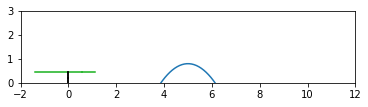

In [13]:
#animate it
try:
    import matplotlib.pyplot as plt
    import matplotlib.animation as ani
    from IPython.display import HTML
    import numpy as np
    %matplotlib inline

    fig1, ax1 = plt.subplots(1,1) #create axes
    ax1.set_aspect('equal')

    def plot_robot(i,m,ax): #update function for animation
        ax.clear()
        ax.set_xlim([-2,12])
        ax.set_ylim([0,3])
       #plot body
        body_xb = m.q[i,1,'x'].value 
        body_yb = m.q[i,1,'y'].value 
        body_xf = m.q[i,1,'x'].value + m.len[('body','T',1)]*cos(m.q[i,1,'thb'].value)
        body_yf = m.q[i,1,'y'].value + m.len[('body','T',1)]*sin(m.q[i,1,'thb'].value)  
        ax.plot([body_xb,body_xf],[body_yb,body_yf],color='xkcd:green')
    
    #plot tail
        tail_xb = body_xb
        tail_yb = body_yb
        th_tail_abs = m.q[i,1,'thb'].value + m.q[i,1,'tht'].value
        tail_xt = m.q[i,1,'x'].value - m.len[('tail','T',1)]*cos(th_tail_abs)
        tail_yt = m.q[i,1,'y'].value - m.len[('tail','T',1)]*sin(th_tail_abs)
        ax.plot([tail_xb,tail_xt],[tail_yb,tail_yt],color='xkcd:green')
    
        #plot neck
        neck_xb = body_xf
        neck_yb = body_yf
        th_neck_abs = m.q[i,1,'thb'].value + m.q[i,1,'thn'].value
        neck_xt = neck_xb + m.len[('neck','T',1)]*cos(th_neck_abs)
        neck_yt = neck_yb + m.len[('neck','T',1)]*sin(th_neck_abs)
        ax.plot([neck_xb,neck_xt],[neck_yb,neck_yt],color='xkcd:green')
    
    #plot gap

        w=0.625
        ci = 5
        x1 = np.linspace(0,10,100)
        y1 = -w*(x1 - ci)**2 + Hi
#     x1 = np.linspace(-5,4.354,10)
#     x2 = np.linspace(6.335,15,10)
#     y1 = sym.zeros(10)
        plt.plot(x1,y1)
#     plt.plot(x2,y1)

        for s in sides:
            if s == 'R':
                col = 'xkcd:black'
            else:
                col = 'xkcd:black'
            thA = m.q[i,1,'thb'].value+m.q[i,1,'thh1%s'%s].value
            thAplus =  m.q[i,1,'thb'].value+m.q[i,1,'thh1%s'%s].value+m.q[i,1,'thh2%s'%s].value
            leg1_xt = body_xb
            leg1_yt = body_yb
            leg1_xb = body_xb + m.len[('legH',s,1)]*sin(thA)
            leg1_yb = body_yb - m.len[('legH',s,1)]*cos(thA)
            ax.plot([leg1_xt,leg1_xb],[leg1_yt,leg1_yb],color=col)
    
    #plot leg 2
            leg2_xt = leg1_xb
            leg2_yt = leg1_yb
            leg2_xb = leg2_xt + m.len[('legH',s,2)]*sin(thAplus)
            leg2_yb = leg2_yt - m.len[('legH',s,2)]*cos(thAplus)
            ax.plot([leg2_xt,leg2_xb],[leg2_yt,leg2_yb],color=col)
    
    update = lambda i: plot_robot(i,m,ax1) #lambdify update function

    animate = ani.FuncAnimation(fig1,update,range(1,N+1),interval = 50,repeat=True)

    

except:
    b = 1
HTML(animate.to_html5_video()) #you need to convert the animation to HTML5 to embed it in the notebook

In [20]:
m.GRF.pprint()

GRF : Size=3600, Index=GRF_index
    Key                                     : Lower : Value                  : Upper : Fixed : Stale : Domain
      (1, 1, 'legH', 'L', 2, 'THETA', 'ng') :   0.0 :                   None :  None : False :  True :  Reals
      (1, 1, 'legH', 'L', 2, 'THETA', 'ps') :   0.0 :                   None :  None : False :  True :  Reals
          (1, 1, 'legH', 'L', 2, 'X', 'ng') :   0.0 :  1.415726878057321e-07 :  None : False : False :  Reals
          (1, 1, 'legH', 'L', 2, 'X', 'ps') :   0.0 :                    0.0 :  None : False : False :  Reals
          (1, 1, 'legH', 'L', 2, 'Y', 'ng') :   0.0 :                   None :  None : False :  True :  Reals
          (1, 1, 'legH', 'L', 2, 'Y', 'ps') :   0.0 : 1.4898163331528856e-07 :  None : False : False :  Reals
      (1, 1, 'legH', 'R', 2, 'THETA', 'ng') :   0.0 :                   None :  None : False :  True :  Reals
      (1, 1, 'legH', 'R', 2, 'THETA', 'ps') :   0.0 :                   None :  None : 

    (250, 1, 'legH', 'R', 2, 'THETA', 'ps') :   0.0 :                   None :  None : False :  True :  Reals
        (250, 1, 'legH', 'R', 2, 'X', 'ng') :   0.0 :     0.8883892878828572 :  None : False : False :  Reals
        (250, 1, 'legH', 'R', 2, 'X', 'ps') :   0.0 :     0.4238680082192566 :  None : False : False :  Reals
        (250, 1, 'legH', 'R', 2, 'Y', 'ng') :   0.0 :                   None :  None : False :  True :  Reals
        (250, 1, 'legH', 'R', 2, 'Y', 'ps') :   0.0 :      2.137871182004738 :  None : False : False :  Reals
    (251, 1, 'legH', 'L', 2, 'THETA', 'ng') :   0.0 :                   None :  None : False :  True :  Reals
    (251, 1, 'legH', 'L', 2, 'THETA', 'ps') :   0.0 :                   None :  None : False :  True :  Reals
        (251, 1, 'legH', 'L', 2, 'X', 'ng') :   0.0 :                    0.0 :  None : False : False :  Reals
        (251, 1, 'legH', 'L', 2, 'X', 'ps') :   0.0 :                    0.0 :  None : False : False :  Reals
        (2

In [16]:
m.q.pprint()

q : Size=2700, Index=q_index
    Key               : Lower               : Value                   : Upper               : Fixed : Stale : Domain
        (1, 1, 'thb') : -0.2617993877991494 :                     0.0 :  0.2617993877991494 :  True :  True :  Reals
      (1, 1, 'thh1L') : -1.5707963267948966 :                     0.0 :  1.5707963267948966 :  True :  True :  Reals
      (1, 1, 'thh1R') : -1.5707963267948966 :                     0.0 :  1.5707963267948966 :  True :  True :  Reals
      (1, 1, 'thh2L') : -1.5707963267948966 :                     0.0 :                 0.0 :  True :  True :  Reals
      (1, 1, 'thh2R') : -1.5707963267948966 :                     0.0 :                 0.0 :  True :  True :  Reals
        (1, 1, 'thn') : -0.2617993877991494 :                     0.0 : 0.39269908169872414 :  True :  True :  Reals
        (1, 1, 'tht') : -1.5707963267948966 :                     0.0 :  1.5707963267948966 :  True :  True :  Reals
          (1, 1, 'x') :            

In [22]:
vertGRFarrleft = [m.GRF[i,1,'legH','L',2,'Y','ps']()for i in range(138,140)]
vertGRFarrright = [m.GRF[i,1,'legH','R',2,'Y','ps']()for i in range(138,140)]

horGRFarrleft = [m.GRF[i,1,'legH','L',2,'X','ps']()for i in range(138,140)]
horGRFarrright = [m.GRF[i,1,'legH','R',2,'X','ps']()for i in range(138,140)]

vertGRFtotal = 0
for i in range(len(vertGRFarrleft)):
    vertGRFtotal = vertGRFtotal + vertGRFarrleft[i] +  vertGRFarrright[i]


horGRFtotal = 0
for i in range(len(horGRFarrleft)):
    horGRFtotal = horGRFtotal +horGRFarrright[i] +  horGRFarrleft[i]

vertratio = vertGRFtotal*100/(vertGRFtotal+horGRFtotal)
print(vertratio)

horratio = horGRFtotal*100/(vertGRFtotal+horGRFtotal)
print(horratio)

54.05405865492802
45.94594134507197


In [22]:
body_base_angle_arr =  sym.zeros(1,285)
for n in range(1,N):
    body_base_angle_arr[n] = m.q[n,1,'thb'].value
tail_angle_arr = sym.zeros(1,285)
for n in range(1,N):
    tail_angle_arr[n] = m.q[n,1,'tht'].value

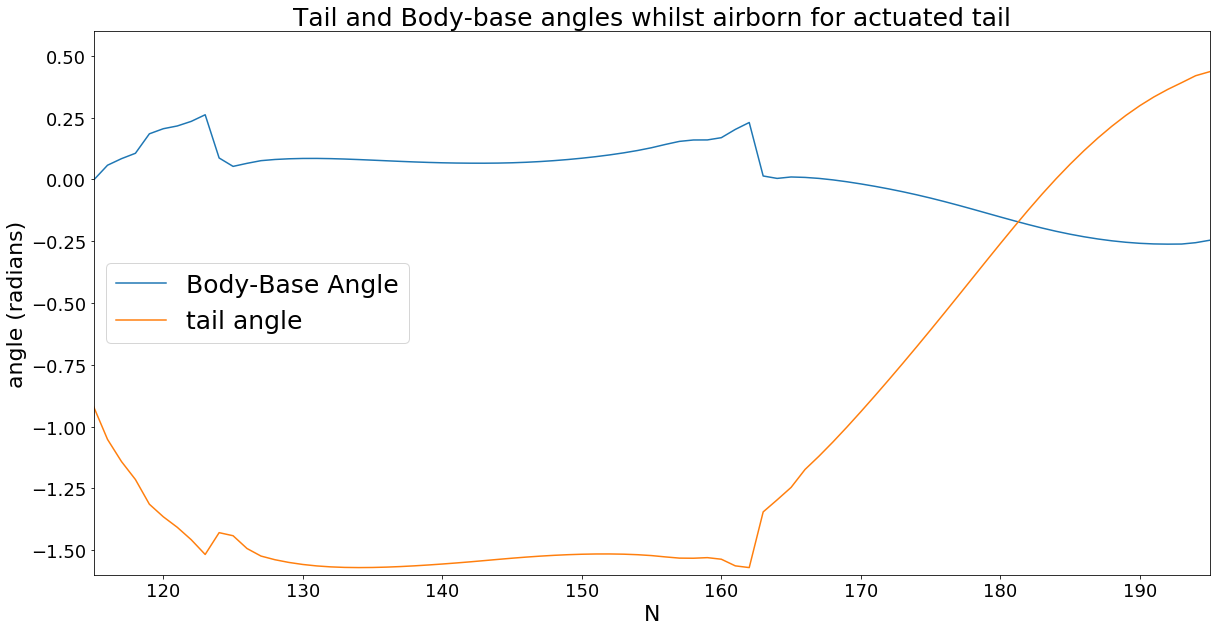

In [127]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML
import numpy as np
import sympy as sym
%matplotlib inline
# body_base_angle_arr = [m.q[i,1,'thb']() for i in range(115,196)]
# x1  =  np.linspace(115,195,81)
# plt.xlim([115,195])
# plt.ylim([-0.5,0.5])
# plt.plot(x1,body_base_angle_arr)

# tail_angle_arr = [m.q[i,1,'tht']() for i in range(115,196)]
# x1  =  np.linspace(115,195,81)
# plt.xlim([115,195])
# plt.ylim([-1.6,0.6])
# plt.plot(x1,tail_angle_arr)
# plt.title('Tail and Body-base angles whilst airborn')
# plt.xlabel('N')
# plt.legend([r'Body-Base Angle',r'$Tail Angle$'])
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),&nbsp; shadow=True, ncol=2)

body_base_angle_arr = [m.q[i,1,'thb']() for i in range(115,196)]
tail_angle_arr = [m.q[i,1,'tht']() for i in range(115,196)]
y = body_base_angle_arr
y2 = tail_angle_arr
x  =  np.linspace(115,195,81)
fig = plt.figure(figsize=(20,10))
plt.xlim([115,195])
plt.ylim([-1.6,0.6])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('N',fontsize=22)
plt.ylabel('angle (radians)', fontsize=22)
plt.plot(x, y, label='Body-Base Angle')
plt.plot(x, y2, label='tail angle')
plt.title('Tail and Body-base angles whilst airborn for actuated tail', fontsize=25)
plt.legend([r'Body-Base Angle',r'$Tail Angle$'])
plt.legend(loc='center left', fontsize=25)








In [ ]:
# rerun from here if you don't want to calculate the EOM's again
if 'm' in globals():
    del m # deletes the model
    
m = ConcreteModel()

# SETS-----------------------------------------------------------------------------------------------------------------------

N = 300
m.N = RangeSet(N) # number of elements

P = 1
m.P = RangeSet(1) # number of collocation points (don't worry about this for now)

sides = ['R','L']
# links
# format: (lb, ls, ln) = branch, side, number
links = [('body','T',1)]+[('neck','T',1)]+[('tail','T',1)]+[('legH',s,1) for s in sides]+\
[('legH',s,2) for s in sides]
m.L = Set(dimen=3, initialize = links)

# generalized coordinates
DOFs = ['x','y','thb','thn','tht']+['thh1%s'%s for s in sides]+\
['thh2%s'%s for s in sides]
m.DOF = Set(initialize = DOFs) 

# PARAMETERS-----------------------------------------------------------------------------------------------------------------


m.g = Param(initialize = 9.81)
m.ks = Param(initialize = 500.0)
m.kd = Param(initialize = 200.0)

def get_m(n, lb, ls, ln):
    if lb == 'body':
        return 10.0
    if lb == 'neck':
        return 7.0
    if lb == 'tail':
        return 3.9
    else: return 3.0
m.m = Param(m.L, initialize = get_m) # mass of links

def get_len(n, lb, ls, ln):
    if lb == 'body':
        return 0.55
    if lb == 'neck':
        return 0.55
    if lb == 'tail':
        return 1.4
    else: return 0.22
m.len = Param(m.L, initialize = get_len) # length of links

def calculate_In(m, lb, ls, ln): 
    l = (lb,ls,ln)
    return m.m[l]*m.len[l]**2/12 
m.In = Param(m.L, initialize = calculate_In) # moment of inertia

mbody = sum(m.m[l] for l in links)
BW = mbody*m.g.value

# VARIABLES -----------------------------------------------------------------------------------------------------------------

# system coordinates
m.q = Var(m.N, m.P, m.DOF) # position

m.dq = Var(m.N, m.P, m.DOF) # velocity
m.ddq = Var(m.N, m.P, m.DOF) # acceleration

# bound variables
for n in range(1,N+1):
    for p in range(1,P+1):
        m.q[n,p,'y'].setlb(0.0)
        
# TIME AND INTEGRATION

# variable timestep
TT = 3.0
hm = TT/N # master timestep
m.h = Var(m.N, bounds = (0.8,1.2)) 
#5m 1.5s

# Integration constraints 
def BwEuler_p(m,n,dof): # for positions
    if n > 1:
        return m.q[n,1,dof] == m.q[n-1,1,dof] + hm*m.h[n]*m.dq[n,1,dof]
    else:
        return Constraint.Skip #use this to leave out members of a set that the constraint doesn't apply to
m.integrate_p = Constraint(m.N, m.DOF, rule = BwEuler_p)

def BwEuler_v(m,n,dof): # for velocities
    if n > 1:
        return m.dq[n,1,dof] == m.dq[n-1,1,dof] + hm*m.h[n]*m.ddq[n-1,1,dof]
    else:
        return Constraint.Skip 
m.integrate_v = Constraint(m.N, m.DOF, rule = BwEuler_v)


# GROUND INTERACTIONS -------------------------------------------------------------------------------------------------------

# paramters
m.mu = Param(initialize = 0.85) # friction coefficient

signs = ['ps','ng'] # sign set for positive and negative components
m.sgn = Set(initialize = signs)

WDOFs = ['X','Y',"THETA"] # absolute coordinates (see what I mean about switching between frames the whole time...?)
m.WDOF = Set(initialize = WDOFs) 

contacts = [('legH',s,2) for s in sides] # set of contacts
m.C = Set(dimen=3, initialize = contacts) 

# variables
m.taily = Var(m.N, m.WDOF, bounds = (0.0,None))
m.heady = Var(m.N, m.WDOF, bounds = (0.0,None))
m.footy = Var(m.N, m.P, m.C, bounds = (0.0,None)) # foot position
m.footdx = Var(m.N, m.P, m.C, m.sgn, bounds = (0.0,None)) # foot velocity
m.friction_cone = Var(m.N, m.P, m.C, bounds = (0.0,None))
m.GRF = Var(m.N, m.P, m.C, m.WDOF, m.sgn, bounds = (0.0,None)) # ground reaction forces

def def_taily(m,n,dof):
    if dof == 'Y':
        return m.taily[n,'Y'] == m.q[n,1,'y']-m.len['tail','T',1]*sin(m.q[n,1,'tht']+m.q[n,1,'thb'])
    else:                                          
        return Constraint.Skip                                     
m.def_taily = Constraint(m.N, m.WDOF, rule = def_taily)

def def_heady(m,n,p,dof):
    if dof == 'Y':
        return m.heady[n,'Y'] == m.q[n,1,'y']+m.len['body','T',1]*sin(m.q[n,1,'thb'])+m.len['neck','T',1]*sin(m.q[n,1,'thb']+m.q[n,1,'thn'])
    else:                                          
        return Constraint.Skip                                     
m.def_heady = Constraint(m.N, m.P, m.WDOF, rule = def_heady)

w=0.625
ci = 5.0
Hi = 2.088624
def jump1(m,n):
    return m.q[n,1,'y'] >= -w*(m.q[n,1,'x'] - ci)**2 + Hi
m.jump1 = Constraint(m.N, rule = jump1)

# def jump2(m,n):
#     return m.q[n,1,'y'] >= -w*(m.q[n,1,'x'] - c)**2 + H - m.len['body','T',1]*sin(m.q[n,1,'thb'])-m.len['neck','T',1]*sin(m.q[n,1,'thb']+m.q[n,1,'thn'])
# m.jump2 = Constraint(m.N, rule = jump2)

# def jump3(m,n):
#     return m.q[n,1,'y'] >= -w*(m.q[n,1,'x'] - c)**2 + H - (-m.len['tail','T',1]*sin(m.q[n,1,'tht']+m.q[n,1,'thb']))




ground_constraints = ['contact','friction','slip_ps','slip_ng'] 
m.ground_constraints = Set(initialize = ground_constraints) # set for indexing ground-related penalties
m.ground_penalty = Var(m.N, m.C, m.ground_constraints, bounds = (0.0,None))

# constraints: aux variables
def def_footy(m,n,p,lb,ls,ln):
    c = (lb,ls,ln)
    if lb == 'legH':
        var_list = [m.len[('body','T',1)],m.len[('neck','T',1)],m.len[('tail','T',1)],
                    m.len[('legH','R',1)],m.len[('legH','R',2)],
                    m.q[n,p,'x'],m.q[n,p,'y'],m.q[n,p,'thb'],m.q[n,p,'thn'],m.q[n,p,'tht'],
                    m.q[n,p,'thh1%s'%ls],m.q[n,p,'thh2%s'%ls],
                    m.dq[n,p,'x'],m.dq[n,p,'y'],m.dq[n,p,'thb'],m.dq[n,p,'thn'],m.dq[n,p,'tht'],
                    m.dq[n,p,'thh1%s'%ls],m.dq[n,p,'thh2%s'%ls]]
        return m.footy[n,p,c] == lamb_pfooth_y(*var_list)
    else:
        return Constraint.Skip
m.def_footy = Constraint(m.N, m.P, m.C, rule = def_footy)


def def_footdx(m,n,p,lb,ls,ln):
    c = (lb,ls,ln)
    if lb == 'legH':
        var_list = [m.len[('body','T',1)],m.len[('neck','T',1)],m.len[('tail','T',1)],
                    m.len[('legH','R',1)],m.len[('legH','R',2)],
                    m.q[n,p,'x'],m.q[n,p,'y'],m.q[n,p,'thb'],m.q[n,p,'thn'],m.q[n,p,'tht'],
                    m.q[n,p,'thh1%s'%ls],m.q[n,p,'thh2%s'%ls],
                    m.dq[n,p,'x'],m.dq[n,p,'y'],m.dq[n,p,'thb'],m.dq[n,p,'thn'],m.dq[n,p,'tht'],
                    m.dq[n,p,'thh1%s'%ls],m.dq[n,p,'thh2%s'%ls]]
        return m.footdx[n,p,c,'ps']-m.footdx[n,p,c,'ng'] == lamb_vfooth_x(*var_list)
    else:
        return Constraint.Skip
m.def_footdx = Constraint(m.N, m.P, m.C, rule = def_footdx)

def def_friction_cone(m,n,p,lb,ls,ln):
    c = (lb,ls,ln)
    return m.friction_cone[n,p,c] == m.mu*m.GRF[n,p,c,'Y','ps'] - (m.GRF[n,p,c,'X','ps'] + m.GRF[n,p,c,'X','ng'])
m.def_friction_cone = Constraint(m.N, m.P, m.C, rule = def_friction_cone)

# constraints: complementarity

# contact
def ground_contact(m,n,lb,ls,ln):
    c = (lb,ls,ln)
    if n < N:
        return m.ground_penalty[n,c,'contact'] == m.footy[n+1,1,c]*m.GRF[n,1,c,'Y','ps'] 
    else:
        return Constraint.Skip
m.ground_contact = Constraint(m.N, m.C, rule = ground_contact)



# friction
def ground_friction(m,n,lb,ls,ln):
    c = (lb,ls,ln)
    if n < N:
        return m.ground_penalty[n,c,'friction'] == (m.footdx[n+1,1,c,'ps']+m.footdx[n+1,1,c,'ng'])*m.friction_cone[n,1,c]
    else:
        return Constraint.Skip
m.ground_friction = Constraint(m.N, m.C, rule = ground_friction)

# slipping
def ground_slip_ps(m,n,lb,ls,ln):
    c = (lb,ls,ln)
    if n < N:
        return m.ground_penalty[n,c,'slip_ps'] == m.footdx[n+1,1,c,'ps']*m.GRF[n,1,c,'X','ps']
    else:
        return Constraint.Skip
m.ground_slip_ps = Constraint(m.N, m.C, rule = ground_slip_ps)

def ground_slip_ng(m,n,lb,ls,ln):
    c = (lb,ls,ln)
    if n < N:
        return m.ground_penalty[n,c,'slip_ng'] == m.footdx[n+1,1,c,'ng']*m.GRF[n,1,c,'X','ng']
    else:
        return Constraint.Skip
m.ground_slip_ng = Constraint(m.N, m.C, rule = ground_slip_ng)

# bound contact forces at last node
for p in range(1,P+1):
    for c in contacts:
        for dof in WDOFs:
            for sgn in signs:
                m.GRF[N,p,c,dof,sgn].value = 0
                m.GRF[N,p,c,dof,sgn].fixed = True

                
                
# HARD JOINT STOPS ----------------------------------------------------------------------------------------------------------

# sets
joints = ['tht']+['thn']+['thh1%s'%s for s in sides]+['thh2%s'%s for s in sides] # set of joints
m.J = Set(initialize = joints)

jointsACT = ['tht']+['thn']+['thh1%s'%s for s in sides]+['thh2%s'%s for s in sides] # set of joints
m.Jact = Set(initialize = jointsACT)

selectjoints = ['thh1%s'%s for s in sides]+['thh2%s'%s for s in sides] # set of joints
m.Jselect = Set(initialize = selectjoints)

joint_constraints = ['up','lo'] # set of joint penalties
m.joint_constraints = Set(initialize = joint_constraints)

# bound the joints
for n in range(1,N+1):
    for p in range(1,P+1):
        m.q[n,p,'thb'].setlb(-np.pi/12)
        m.q[n,p,'thb'].setub(np.pi/12)
        m.q[n,p,'tht'].setlb(-np.pi/2)
        m.q[n,p,'tht'].setub(np.pi/2)
        m.q[n,p,'thn'].setlb(-np.pi/12)
        m.q[n,p,'thn'].setub(np.pi/8)
        
        [m.q[n,p,'thh1%s'%s].setlb(-np.pi/2) for s in sides]
        [m.q[n,p,'thh1%s'%s].setub(np.pi/2) for s in sides]
        [m.q[n,p,'thh2%s'%s].setlb(-np.pi/2) for s in sides]
        [m.q[n,p,'thh2%s'%s].setub(0.0) for s in sides]
        

# variables
m.tau_a = Var(m.N, m.Jact, bounds = (-1.0,1.0)) # actuator torque

m.joint_penalty = Var(m.N, m.J, m.joint_constraints, bounds = (0.0,None))

# complementarity
def joint_limits(m,n,j,jc):
    if n < N:
        if jc == 'up':
            return m.joint_penalty[n,j,jc] == (m.q[2,1,j].ub - m.q[n+1,1,j])
        else:
            return m.joint_penalty[n,j,jc] == (m.q[n+1,1,j] - m.q[2,1,j].lb)
    else:
        return Constraint.Skip
m.joint_limits = Constraint(m.N, m.J, m.joint_constraints, rule = joint_limits)

# EQUATIONS OF MOTION -------------------------------------------------------------------------------------------------------
S = 0.5*BW    #scale

# sym_list = [g,
#             mb,mn,mh1,mh2,mt,
#             lb,ln,lh1,lh2,lt,
#             Inb,Inn,Inh1,Inh2,Int,
#             x,y,thb,thn,tht]+thh1+thh2+\
#             [dx,dy,dthb,dthn,dtht]+dthh1+dthh2+\
#             [ddx,ddy,ddthb,ddthn,ddtht]+ddthh1+ddthh2+\
#             [taut,taun]+tauh1+tauh2+\
#             Gxh+Gyh

def EOM_x(m,n,p):
    var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%s] for s in sides]+\
            [m.q[n,p,'thh2%s'%s] for s in sides]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%s] for s in sides]+\
            [m.dq[n,p,'thh2%s'%s] for s in sides]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%s] for s in sides]+\
            [m.ddq[n,p,'thh2%s'%s] for s in sides]+\
            [S*m.tau_a[n,'tht']]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%s] for s in sides]+\
            [S*m.tau_a[n,'thh2%s'%s] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'X','ps']-S*m.GRF[n,p,('legH',s,2),'X','ng'] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'Y','ps'] for s in sides] 
    return lambEOM_x(*var_list) == 0
m.EOM_x = Constraint(m.N, m.P, rule = EOM_x)

def EOM_y(m,n,p):
    var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%s] for s in sides]+\
            [m.q[n,p,'thh2%s'%s] for s in sides]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%s] for s in sides]+\
            [m.dq[n,p,'thh2%s'%s] for s in sides]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%s] for s in sides]+\
            [m.ddq[n,p,'thh2%s'%s] for s in sides]+\
            [S*m.tau_a[n,'tht']]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%s] for s in sides]+\
            [S*m.tau_a[n,'thh2%s'%s] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'X','ps']-S*m.GRF[n,p,('legH',s,2),'X','ng'] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'Y','ps'] for s in sides]
    return lambEOM_y(*var_list) == 0
m.EOM_y = Constraint(m.N, m.P, rule = EOM_y)

def EOM_thb(m,n,p):
    var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%s] for s in sides]+\
            [m.q[n,p,'thh2%s'%s] for s in sides]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%s] for s in sides]+\
            [m.dq[n,p,'thh2%s'%s] for s in sides]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%s] for s in sides]+\
            [m.ddq[n,p,'thh2%s'%s] for s in sides]+\
            [S*m.tau_a[n,'tht']]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%s] for s in sides]+\
            [S*m.tau_a[n,'thh2%s'%s] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'X','ps']-S*m.GRF[n,p,('legH',s,2),'X','ng'] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'Y','ps'] for s in sides]
    return lambEOM_thb(*var_list) == 0
m.EOM_thb = Constraint(m.N, m.P, rule = EOM_thb)

def EOM_tht(m,n,p):
    var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%s] for s in sides]+\
            [m.q[n,p,'thh2%s'%s] for s in sides]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%s] for s in sides]+\
            [m.dq[n,p,'thh2%s'%s] for s in sides]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%s] for s in sides]+\
            [m.ddq[n,p,'thh2%s'%s] for s in sides]+\
            [S*m.tau_a[n,'tht']]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%s] for s in sides]+\
            [S*m.tau_a[n,'thh2%s'%s] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'X','ps']-S*m.GRF[n,p,('legH',s,2),'X','ng'] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'Y','ps'] for s in sides]
    return lambEOM_tht(*var_list) == 0
m.EOM_tht = Constraint(m.N, m.P, rule = EOM_tht)

def EOM_thn(m,n,p):
    var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%s] for s in sides]+\
            [m.q[n,p,'thh2%s'%s] for s in sides]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%s] for s in sides]+\
            [m.dq[n,p,'thh2%s'%s] for s in sides]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%s] for s in sides]+\
            [m.ddq[n,p,'thh2%s'%s] for s in sides]+\
            [S*m.tau_a[n,'tht']]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%s] for s in sides]+\
            [S*m.tau_a[n,'thh2%s'%s] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'X','ps']-S*m.GRF[n,p,('legH',s,2),'X','ng'] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'Y','ps'] for s in sides]
    return lambEOM_thn(*var_list) == 0
m.EOM_thn = Constraint(m.N, m.P, rule = EOM_thn)



def EOM_thh1(m,n,p,lb,ls,ln):
    if lb == 'legH' and ln == 1:
        var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%ls]]+\
            [m.q[n,p,'thh2%s'%ls]]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%ls]]+\
            [m.dq[n,p,'thh2%s'%ls]]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%ls]]+\
            [m.ddq[n,p,'thh2%s'%ls]]+\
            [S*m.tau_a[n,'tht']]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%ls]]+\
            [S*m.tau_a[n,'thh2%s'%ls]]+\
            [S*m.GRF[n,p,('legH',ls,2),'X','ps']-S*m.GRF[n,p,('legH',ls,2),'X','ng']]+\
            [S*m.GRF[n,p,('legH',ls,2),'Y','ps']]
        return lambEOM_thh1(*var_list) == 0
    else:
        return Constraint.Skip
m.EOM_thh1 = Constraint(m.N, m.P, m.L, rule = EOM_thh1)


def EOM_thh2(m,n,p,lb,ls,ln):
    if lb == 'legH' and ln == 2:
        var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%ls]]+\
            [m.q[n,p,'thh2%s'%ls]]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%ls]]+\
            [m.dq[n,p,'thh2%s'%ls]]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%ls]]+\
            [m.ddq[n,p,'thh2%s'%ls]]+\
            [S*m.tau_a[n,'tht']]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%ls]]+\
            [S*m.tau_a[n,'thh2%s'%ls]]+\
            [S*m.GRF[n,p,('legH',ls,2),'X','ps']-S*m.GRF[n,p,('legH',ls,2),'X','ng']]+\
            [S*m.GRF[n,p,('legH',ls,2),'Y','ps']]
        return lambEOM_thh2(*var_list) == 0
    else:
        return Constraint.Skip
m.EOM_thh2 = Constraint(m.N, m.P, m.L, rule = EOM_thh2)

# INITIALIZATION
guide = np.linspace(0.0,5.0,N)
for n in range(1,N+1):
    m.q[n,1,'x'].value = guide[n-1] + np.random.uniform(-0.25,0.25)
    m.q[n,1,'y'].value  = np.random.uniform(0.5,1.1)
    m.q[n,1,'thb'].value  = np.random.uniform(-np.pi/8,np.pi/8)
    for j in joints:
        m.q[n,1,j].value = np.random.uniform(m.q[n,1,j].lb,m.q[n,1,j].ub)
    
    for c in contacts:
        m.GRF[n,1,c,'Y','ps'].value = np.random.uniform(0.0,1)
        m.GRF[n,1,c,'X','ps'].value = m.mu.value*m.GRF[n,1,c,'Y','ps'].value
        
        

# SPRINT TEST
# initial condition

# SPRINT TEST
# initial condition

m.q[1,1,'x'].value = 0.0
m.q[1,1,'x'].fixed = True

#m.q[1,1,'x'].fix(0.0)

m.q[1,1,'tht'].value = 0.0
m.q[1,1,'tht'].fixed = True

for j in jointsACT:
    m.q[1,1,j].value = 0.0
    m.q[1,1,j].fixed = True
    
m.q[1,1,'thb'].value = 0.0
m.q[1,1,'thb'].fixed = True


for c in contacts:
    m.footy[1,1,c].value = 0.0
    m.footy[1,1,c].fixed = True

for dof in DOFs:
    m.dq[1,1,dof].value = 0.0
    m.dq[1,1,dof].fixed = True
# m.q[N,1,'x'].value = 5.0
# m.q[N,1,'x'].fixed = True

m.q[N,1,'x'].setlb(10.0)

for j in joints:
    m.q[N,1,j].value = 0.0
    m.q[N,1,j].fixed = True

m.q[N,1,'thb'].value = 0.0
m.q[N,1,'thb'].fixed = True
    
for j in joints:
    m.dq[N,1,j].value = 0.0
    m.dq[N,1,j].fixed = True
m.dq[N,1,'x'].value = 0.0
m.dq[N,1,'x'].fixed = True

m.dq[N,1,'y'].value = 0.0
m.dq[N,1,'y'].fixed = True

# COST FUNCTION -------------------------------------------------------------------------------------------------------------


def MinTime(m):
    T = sum(m.h[n] for n in range(1,N+1))
    penalty_sum = 0
    for n in range(1,N+1):
        for c in contacts:
            for gc in ground_constraints:
                penalty_sum += m.ground_penalty[n,c,gc]
    return T + 1000*penalty_sum
m.MinTime = Objective(rule = MinTime)

# # minimum effort

def MinTorque(m):
    torque_sum = 0
    for n in range(1,N+1):
        for j in jointsACT:
            torque_sum += m.tau_a[n,j]**2
    penalty_sum = 0
    for n in range(1,N+1):
        for c in contacts:
            for gc in ground_constraints:
                penalty_sum += m.ground_penalty[n,c,gc]
    return torque_sum + 1000*penalty_sum
m.MinTorque = Objective(rule = MinTorque)

#feasibility

def MinPenalty(m):
    penalty_sum = 0
    for n in range(1,N+1):
        for c in contacts:
            for gc in ground_constraints:
                penalty_sum += m.ground_penalty[n,c,gc]
    return penalty_sum
m.MinPenalty = Objective(rule = MinPenalty)


def penalty_solved(m):
    ground_penalty_max = np.max([m.ground_penalty[n,c,gc].value for n in range(1,N+1) for c in contacts for gc in ground_constraints])
    threshold = 1e-4
    if ground_penalty_max <= threshold:
        return True
    else: return False


def get_status(results):
    try:
        status = results.solver.termination_condition == TerminationCondition.optimal
    except:
        status = False
    return status

def purge(m):
    for j in joints:
        for n in range(1,N):
            m.q[n,1,j].value = None
            m.dq[n,1,j].value = None
            m.ddq[n,1,j].value = None
    for i in jointsACT:
        for n in range(1,N):
            m.tau_a[n,i].value = None


In [ ]:
# solving
testing = 0
count = 10023
stringcount = str(count)
iterations = 1
timeout = 5
success = False
opt = SolverFactory('ipopt') # standard issue, garden variety ipopt
opt.options["expect_infeasible_problem"] = 'yes'
opt.options["print_level"] = 5 # prints a log with each iteration (you want to this - it's the only way to see progress.)
opt.options["max_iter"] = 30000 # maximum number of iterations
opt.options["max_cpu_time"] = 3600 # maximum cpu time in seconds
opt.options["Tol"] = 1e-6 # the tolerance for feasibility. Considers constraints satisfied when they're within this margin.   
m.MinTime.deactivate()
m.MinPenalty.deactivate() 
m.MinTorque.activate() 
while iterations > 0 and timeout > 0:
    timeout = timeout-1
    try:
        results1 = opt.solve(m, tee = True)
        success = get_status(results1) and penalty_solved(m)
    except:
        success = False
    if success == True:
        print('success')
        iterations = iterations - 1
    else:
        # INITIALIZATION
        guide = np.linspace(0.0,5.0,N)
        for n in range(1,N+1):
            m.q[n,1,'x'].value = guide[n-1] + np.random.uniform(-0.25,0.25)
            m.q[n,1,'y'].value  = np.random.uniform(0.5,1.1)
            m.q[n,1,'thb'].value  = np.random.uniform(-np.pi/8,np.pi/8)
            for j in joints:
                m.q[n,1,j].value = np.random.uniform(m.q[n,1,j].lb,m.q[n,1,j].ub)
    
            for c in contacts:
                m.GRF[n,1,c,'Y','ps'].value = np.random.uniform(0.0,1)
                m.GRF[n,1,c,'X','ps'].value = m.mu.value*m.GRF[n,1,c,'Y','ps'].value
        print('failure')
        

In [ ]:
#animate it
try:
    import matplotlib.pyplot as plt
    import matplotlib.animation as ani
    from IPython.display import HTML
    import numpy as np
    %matplotlib inline

    fig1, ax1 = plt.subplots(1,1) #create axes
    ax1.set_aspect('equal')

    def plot_robot(i,m,ax): #update function for animation
        ax.clear()
        ax.set_xlim([-2,12])
        ax.set_ylim([0,3])
       #plot body
        body_xb = m.q[i,1,'x'].value 
        body_yb = m.q[i,1,'y'].value 
        body_xf = m.q[i,1,'x'].value + m.len[('body','T',1)]*cos(m.q[i,1,'thb'].value)
        body_yf = m.q[i,1,'y'].value + m.len[('body','T',1)]*sin(m.q[i,1,'thb'].value)  
        ax.plot([body_xb,body_xf],[body_yb,body_yf],color='xkcd:green')
    
    #plot tail
        tail_xb = body_xb
        tail_yb = body_yb
        th_tail_abs = m.q[i,1,'thb'].value + m.q[i,1,'tht'].value
        tail_xt = m.q[i,1,'x'].value - m.len[('tail','T',1)]*cos(th_tail_abs)
        tail_yt = m.q[i,1,'y'].value - m.len[('tail','T',1)]*sin(th_tail_abs)
        ax.plot([tail_xb,tail_xt],[tail_yb,tail_yt],color='xkcd:green')
    
        #plot neck
        neck_xb = body_xf
        neck_yb = body_yf
        th_neck_abs = m.q[i,1,'thb'].value + m.q[i,1,'thn'].value
        neck_xt = neck_xb + m.len[('neck','T',1)]*cos(th_neck_abs)
        neck_yt = neck_yb + m.len[('neck','T',1)]*sin(th_neck_abs)
        ax.plot([neck_xb,neck_xt],[neck_yb,neck_yt],color='xkcd:green')
    
    #plot gap

        w=0.625
        ci = 5
        Hi = 2.088624
        x1 = np.linspace(0,10,100)
        y1 = -w*(x1 - ci)**2 + Hi
#     x1 = np.linspace(-5,4.354,10)
#     x2 = np.linspace(6.335,15,10)
#     y1 = sym.zeros(10)
        plt.plot(x1,y1)
#     plt.plot(x2,y1)

        for s in sides:
            if s == 'R':
                col = 'xkcd:black'
            else:
                col = 'xkcd:black'
            thA = m.q[i,1,'thb'].value+m.q[i,1,'thh1%s'%s].value
            thAplus =  m.q[i,1,'thb'].value+m.q[i,1,'thh1%s'%s].value+m.q[i,1,'thh2%s'%s].value
            leg1_xt = body_xb
            leg1_yt = body_yb
            leg1_xb = body_xb + m.len[('legH',s,1)]*sin(thA)
            leg1_yb = body_yb - m.len[('legH',s,1)]*cos(thA)
            ax.plot([leg1_xt,leg1_xb],[leg1_yt,leg1_yb],color=col)
    
    #plot leg 2
            leg2_xt = leg1_xb
            leg2_yt = leg1_yb
            leg2_xb = leg2_xt + m.len[('legH',s,2)]*sin(thAplus)
            leg2_yb = leg2_yt - m.len[('legH',s,2)]*cos(thAplus)
            ax.plot([leg2_xt,leg2_xb],[leg2_yt,leg2_yb],color=col)
    
    update = lambda i: plot_robot(i,m,ax1) #lambdify update function

    animate = ani.FuncAnimation(fig1,update,range(1,N+1),interval = 50,repeat=True)

    

except:
    b = 1
HTML(animate.to_html5_video()) #you need to convert the animation to HTML5 to embed it in the notebook

In [ ]:
# rerun from here if you don't want to calculate the EOM's again
if 'm' in globals():
    del m # deletes the model
    
m = ConcreteModel()

# SETS-----------------------------------------------------------------------------------------------------------------------

N = 300
m.N = RangeSet(N) # number of elements

P = 1
m.P = RangeSet(1) # number of collocation points (don't worry about this for now)

sides = ['R','L']
# links
# format: (lb, ls, ln) = branch, side, number
links = [('body','T',1)]+[('neck','T',1)]+[('tail','T',1)]+[('legH',s,1) for s in sides]+\
[('legH',s,2) for s in sides]
m.L = Set(dimen=3, initialize = links)

# generalized coordinates
DOFs = ['x','y','thb','thn','tht']+['thh1%s'%s for s in sides]+\
['thh2%s'%s for s in sides]
m.DOF = Set(initialize = DOFs) 

# PARAMETERS-----------------------------------------------------------------------------------------------------------------


m.g = Param(initialize = 9.81)
m.ks = Param(initialize = 500.0)
m.kd = Param(initialize = 200.0)

def get_m(n, lb, ls, ln):
    if lb == 'body':
        return 10.0
    if lb == 'neck':
        return 7.0
    if lb == 'tail':
        return 3.9
    else: return 3.0
m.m = Param(m.L, initialize = get_m) # mass of links

def get_len(n, lb, ls, ln):
    if lb == 'body':
        return 0.55
    if lb == 'neck':
        return 0.55
    if lb == 'tail':
        return 1.4
    else: return 0.22
m.len = Param(m.L, initialize = get_len) # length of links

def calculate_In(m, lb, ls, ln): 
    l = (lb,ls,ln)
    return m.m[l]*m.len[l]**2/12 
m.In = Param(m.L, initialize = calculate_In) # moment of inertia

mbody = sum(m.m[l] for l in links)
BW = mbody*m.g.value

# VARIABLES -----------------------------------------------------------------------------------------------------------------

# system coordinates
m.q = Var(m.N, m.P, m.DOF) # position

m.dq = Var(m.N, m.P, m.DOF) # velocity
m.ddq = Var(m.N, m.P, m.DOF) # acceleration

# bound variables
for n in range(1,N+1):
    for p in range(1,P+1):
        m.q[n,p,'y'].setlb(0.0)
        
# TIME AND INTEGRATION

# variable timestep
TT = 3.0
hm = TT/N # master timestep
m.h = Var(m.N, bounds = (0.8,1.2)) 
#5m 1.5s

# Integration constraints 
def BwEuler_p(m,n,dof): # for positions
    if n > 1:
        return m.q[n,1,dof] == m.q[n-1,1,dof] + hm*m.h[n]*m.dq[n,1,dof]
    else:
        return Constraint.Skip #use this to leave out members of a set that the constraint doesn't apply to
m.integrate_p = Constraint(m.N, m.DOF, rule = BwEuler_p)

def BwEuler_v(m,n,dof): # for velocities
    if n > 1:
        return m.dq[n,1,dof] == m.dq[n-1,1,dof] + hm*m.h[n]*m.ddq[n-1,1,dof]
    else:
        return Constraint.Skip 
m.integrate_v = Constraint(m.N, m.DOF, rule = BwEuler_v)


# GROUND INTERACTIONS -------------------------------------------------------------------------------------------------------

# paramters
m.mu = Param(initialize = 0.85) # friction coefficient

signs = ['ps','ng'] # sign set for positive and negative components
m.sgn = Set(initialize = signs)

WDOFs = ['X','Y',"THETA"] # absolute coordinates (see what I mean about switching between frames the whole time...?)
m.WDOF = Set(initialize = WDOFs) 

contacts = [('legH',s,2) for s in sides] # set of contacts
m.C = Set(dimen=3, initialize = contacts) 

# variables
m.taily = Var(m.N, m.WDOF, bounds = (0.0,None))
m.heady = Var(m.N, m.WDOF, bounds = (0.0,None))
m.footy = Var(m.N, m.P, m.C, bounds = (0.0,None)) # foot position
m.footdx = Var(m.N, m.P, m.C, m.sgn, bounds = (0.0,None)) # foot velocity
m.friction_cone = Var(m.N, m.P, m.C, bounds = (0.0,None))
m.GRF = Var(m.N, m.P, m.C, m.WDOF, m.sgn, bounds = (0.0,None)) # ground reaction forces

def def_taily(m,n,dof):
    if dof == 'Y':
        return m.taily[n,'Y'] == m.q[n,1,'y']-m.len['tail','T',1]*sin(m.q[n,1,'tht']+m.q[n,1,'thb'])
    else:                                          
        return Constraint.Skip                                     
m.def_taily = Constraint(m.N, m.WDOF, rule = def_taily)

def def_heady(m,n,p,dof):
    if dof == 'Y':
        return m.heady[n,'Y'] == m.q[n,1,'y']+m.len['body','T',1]*sin(m.q[n,1,'thb'])+m.len['neck','T',1]*sin(m.q[n,1,'thb']+m.q[n,1,'thn'])
    else:                                          
        return Constraint.Skip                                     
m.def_heady = Constraint(m.N, m.P, m.WDOF, rule = def_heady)

w=0.625
ci = 5.0
Hi = 2.2974
def jump1(m,n):
    return m.q[n,1,'y'] >= -w*(m.q[n,1,'x'] - ci)**2 + Hi 
m.jump1 = Constraint(m.N, rule = jump1)

# def jump2(m,n):
#     return m.q[n,1,'y'] >= -w*(m.q[n,1,'x'] - c)**2 + H - m.len['body','T',1]*sin(m.q[n,1,'thb'])-m.len['neck','T',1]*sin(m.q[n,1,'thb']+m.q[n,1,'thn'])
# m.jump2 = Constraint(m.N, rule = jump2)

# def jump3(m,n):
#     return m.q[n,1,'y'] >= -w*(m.q[n,1,'x'] - c)**2 + H - (-m.len['tail','T',1]*sin(m.q[n,1,'tht']+m.q[n,1,'thb']))




ground_constraints = ['contact','friction','slip_ps','slip_ng'] 
m.ground_constraints = Set(initialize = ground_constraints) # set for indexing ground-related penalties
m.ground_penalty = Var(m.N, m.C, m.ground_constraints, bounds = (0.0,None))

# constraints: aux variables
def def_footy(m,n,p,lb,ls,ln):
    c = (lb,ls,ln)
    if lb == 'legH':
        var_list = [m.len[('body','T',1)],m.len[('neck','T',1)],m.len[('tail','T',1)],
                    m.len[('legH','R',1)],m.len[('legH','R',2)],
                    m.q[n,p,'x'],m.q[n,p,'y'],m.q[n,p,'thb'],m.q[n,p,'thn'],m.q[n,p,'tht'],
                    m.q[n,p,'thh1%s'%ls],m.q[n,p,'thh2%s'%ls],
                    m.dq[n,p,'x'],m.dq[n,p,'y'],m.dq[n,p,'thb'],m.dq[n,p,'thn'],m.dq[n,p,'tht'],
                    m.dq[n,p,'thh1%s'%ls],m.dq[n,p,'thh2%s'%ls]]
        return m.footy[n,p,c] == lamb_pfooth_y(*var_list)
    else:
        return Constraint.Skip
m.def_footy = Constraint(m.N, m.P, m.C, rule = def_footy)


def def_footdx(m,n,p,lb,ls,ln):
    c = (lb,ls,ln)
    if lb == 'legH':
        var_list = [m.len[('body','T',1)],m.len[('neck','T',1)],m.len[('tail','T',1)],
                    m.len[('legH','R',1)],m.len[('legH','R',2)],
                    m.q[n,p,'x'],m.q[n,p,'y'],m.q[n,p,'thb'],m.q[n,p,'thn'],m.q[n,p,'tht'],
                    m.q[n,p,'thh1%s'%ls],m.q[n,p,'thh2%s'%ls],
                    m.dq[n,p,'x'],m.dq[n,p,'y'],m.dq[n,p,'thb'],m.dq[n,p,'thn'],m.dq[n,p,'tht'],
                    m.dq[n,p,'thh1%s'%ls],m.dq[n,p,'thh2%s'%ls]]
        return m.footdx[n,p,c,'ps']-m.footdx[n,p,c,'ng'] == lamb_vfooth_x(*var_list)
    else:
        return Constraint.Skip
m.def_footdx = Constraint(m.N, m.P, m.C, rule = def_footdx)

def def_friction_cone(m,n,p,lb,ls,ln):
    c = (lb,ls,ln)
    return m.friction_cone[n,p,c] == m.mu*m.GRF[n,p,c,'Y','ps'] - (m.GRF[n,p,c,'X','ps'] + m.GRF[n,p,c,'X','ng'])
m.def_friction_cone = Constraint(m.N, m.P, m.C, rule = def_friction_cone)

# constraints: complementarity

# contact
def ground_contact(m,n,lb,ls,ln):
    c = (lb,ls,ln)
    if n < N:
        return m.ground_penalty[n,c,'contact'] == m.footy[n+1,1,c]*m.GRF[n,1,c,'Y','ps'] 
    else:
        return Constraint.Skip
m.ground_contact = Constraint(m.N, m.C, rule = ground_contact)



# friction
def ground_friction(m,n,lb,ls,ln):
    c = (lb,ls,ln)
    if n < N:
        return m.ground_penalty[n,c,'friction'] == (m.footdx[n+1,1,c,'ps']+m.footdx[n+1,1,c,'ng'])*m.friction_cone[n,1,c]
    else:
        return Constraint.Skip
m.ground_friction = Constraint(m.N, m.C, rule = ground_friction)

# slipping
def ground_slip_ps(m,n,lb,ls,ln):
    c = (lb,ls,ln)
    if n < N:
        return m.ground_penalty[n,c,'slip_ps'] == m.footdx[n+1,1,c,'ps']*m.GRF[n,1,c,'X','ps']
    else:
        return Constraint.Skip
m.ground_slip_ps = Constraint(m.N, m.C, rule = ground_slip_ps)

def ground_slip_ng(m,n,lb,ls,ln):
    c = (lb,ls,ln)
    if n < N:
        return m.ground_penalty[n,c,'slip_ng'] == m.footdx[n+1,1,c,'ng']*m.GRF[n,1,c,'X','ng']
    else:
        return Constraint.Skip
m.ground_slip_ng = Constraint(m.N, m.C, rule = ground_slip_ng)

# bound contact forces at last node
for p in range(1,P+1):
    for c in contacts:
        for dof in WDOFs:
            for sgn in signs:
                m.GRF[N,p,c,dof,sgn].value = 0
                m.GRF[N,p,c,dof,sgn].fixed = True

                
                
# HARD JOINT STOPS ----------------------------------------------------------------------------------------------------------

# sets
joints = ['tht']+['thn']+['thh1%s'%s for s in sides]+['thh2%s'%s for s in sides] # set of joints
m.J = Set(initialize = joints)

jointsACT = ['tht']+['thn']+['thh1%s'%s for s in sides]+['thh2%s'%s for s in sides] # set of joints
m.Jact = Set(initialize = jointsACT)

selectjoints = ['thh1%s'%s for s in sides]+['thh2%s'%s for s in sides] # set of joints
m.Jselect = Set(initialize = selectjoints)

joint_constraints = ['up','lo'] # set of joint penalties
m.joint_constraints = Set(initialize = joint_constraints)

# bound the joints
for n in range(1,N+1):
    for p in range(1,P+1):
        m.q[n,p,'thb'].setlb(-np.pi/12)
        m.q[n,p,'thb'].setub(np.pi/12)
        m.q[n,p,'tht'].setlb(-np.pi/2)
        m.q[n,p,'tht'].setub(np.pi/2)
        m.q[n,p,'thn'].setlb(-np.pi/12)
        m.q[n,p,'thn'].setub(np.pi/8)
        
        [m.q[n,p,'thh1%s'%s].setlb(-np.pi/2) for s in sides]
        [m.q[n,p,'thh1%s'%s].setub(np.pi/2) for s in sides]
        [m.q[n,p,'thh2%s'%s].setlb(-np.pi/2) for s in sides]
        [m.q[n,p,'thh2%s'%s].setub(0.0) for s in sides]
        

# variables
m.tau_a = Var(m.N, m.Jact, bounds = (-1.0,1.0)) # actuator torque

m.joint_penalty = Var(m.N, m.J, m.joint_constraints, bounds = (0.0,None))

# complementarity
def joint_limits(m,n,j,jc):
    if n < N:
        if jc == 'up':
            return m.joint_penalty[n,j,jc] == (m.q[2,1,j].ub - m.q[n+1,1,j])
        else:
            return m.joint_penalty[n,j,jc] == (m.q[n+1,1,j] - m.q[2,1,j].lb)
    else:
        return Constraint.Skip
m.joint_limits = Constraint(m.N, m.J, m.joint_constraints, rule = joint_limits)

# EQUATIONS OF MOTION -------------------------------------------------------------------------------------------------------
S = 0.5*BW    #scale

# sym_list = [g,
#             mb,mn,mh1,mh2,mt,
#             lb,ln,lh1,lh2,lt,
#             Inb,Inn,Inh1,Inh2,Int,
#             x,y,thb,thn,tht]+thh1+thh2+\
#             [dx,dy,dthb,dthn,dtht]+dthh1+dthh2+\
#             [ddx,ddy,ddthb,ddthn,ddtht]+ddthh1+ddthh2+\
#             [taut,taun]+tauh1+tauh2+\
#             Gxh+Gyh

def EOM_x(m,n,p):
    var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%s] for s in sides]+\
            [m.q[n,p,'thh2%s'%s] for s in sides]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%s] for s in sides]+\
            [m.dq[n,p,'thh2%s'%s] for s in sides]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%s] for s in sides]+\
            [m.ddq[n,p,'thh2%s'%s] for s in sides]+\
            [S*m.tau_a[n,'tht']]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%s] for s in sides]+\
            [S*m.tau_a[n,'thh2%s'%s] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'X','ps']-S*m.GRF[n,p,('legH',s,2),'X','ng'] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'Y','ps'] for s in sides] 
    return lambEOM_x(*var_list) == 0
m.EOM_x = Constraint(m.N, m.P, rule = EOM_x)

def EOM_y(m,n,p):
    var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%s] for s in sides]+\
            [m.q[n,p,'thh2%s'%s] for s in sides]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%s] for s in sides]+\
            [m.dq[n,p,'thh2%s'%s] for s in sides]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%s] for s in sides]+\
            [m.ddq[n,p,'thh2%s'%s] for s in sides]+\
            [S*m.tau_a[n,'tht']]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%s] for s in sides]+\
            [S*m.tau_a[n,'thh2%s'%s] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'X','ps']-S*m.GRF[n,p,('legH',s,2),'X','ng'] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'Y','ps'] for s in sides]
    return lambEOM_y(*var_list) == 0
m.EOM_y = Constraint(m.N, m.P, rule = EOM_y)

def EOM_thb(m,n,p):
    var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%s] for s in sides]+\
            [m.q[n,p,'thh2%s'%s] for s in sides]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%s] for s in sides]+\
            [m.dq[n,p,'thh2%s'%s] for s in sides]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%s] for s in sides]+\
            [m.ddq[n,p,'thh2%s'%s] for s in sides]+\
            [S*m.tau_a[n,'tht']]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%s] for s in sides]+\
            [S*m.tau_a[n,'thh2%s'%s] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'X','ps']-S*m.GRF[n,p,('legH',s,2),'X','ng'] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'Y','ps'] for s in sides]
    return lambEOM_thb(*var_list) == 0
m.EOM_thb = Constraint(m.N, m.P, rule = EOM_thb)

def EOM_tht(m,n,p):
    var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%s] for s in sides]+\
            [m.q[n,p,'thh2%s'%s] for s in sides]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%s] for s in sides]+\
            [m.dq[n,p,'thh2%s'%s] for s in sides]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%s] for s in sides]+\
            [m.ddq[n,p,'thh2%s'%s] for s in sides]+\
            [S*m.tau_a[n,'tht']]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%s] for s in sides]+\
            [S*m.tau_a[n,'thh2%s'%s] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'X','ps']-S*m.GRF[n,p,('legH',s,2),'X','ng'] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'Y','ps'] for s in sides]
    return lambEOM_tht(*var_list) == 0
m.EOM_tht = Constraint(m.N, m.P, rule = EOM_tht)

def EOM_thn(m,n,p):
    var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%s] for s in sides]+\
            [m.q[n,p,'thh2%s'%s] for s in sides]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%s] for s in sides]+\
            [m.dq[n,p,'thh2%s'%s] for s in sides]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%s] for s in sides]+\
            [m.ddq[n,p,'thh2%s'%s] for s in sides]+\
            [S*m.tau_a[n,'tht']]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%s] for s in sides]+\
            [S*m.tau_a[n,'thh2%s'%s] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'X','ps']-S*m.GRF[n,p,('legH',s,2),'X','ng'] for s in sides]+\
            [S*m.GRF[n,p,('legH',s,2),'Y','ps'] for s in sides]
    return lambEOM_thn(*var_list) == 0
m.EOM_thn = Constraint(m.N, m.P, rule = EOM_thn)



def EOM_thh1(m,n,p,lb,ls,ln):
    if lb == 'legH' and ln == 1:
        var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%ls]]+\
            [m.q[n,p,'thh2%s'%ls]]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%ls]]+\
            [m.dq[n,p,'thh2%s'%ls]]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%ls]]+\
            [m.ddq[n,p,'thh2%s'%ls]]+\
            [S*m.tau_a[n,'tht']]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%ls]]+\
            [S*m.tau_a[n,'thh2%s'%ls]]+\
            [S*m.GRF[n,p,('legH',ls,2),'X','ps']-S*m.GRF[n,p,('legH',ls,2),'X','ng']]+\
            [S*m.GRF[n,p,('legH',ls,2),'Y','ps']]
        return lambEOM_thh1(*var_list) == 0
    else:
        return Constraint.Skip
m.EOM_thh1 = Constraint(m.N, m.P, m.L, rule = EOM_thh1)


def EOM_thh2(m,n,p,lb,ls,ln):
    if lb == 'legH' and ln == 2:
        var_list = [m.g]+\
            [m.m[('body','T',1)]]+\
            [m.m[('neck','T',1)]]+\
            [m.m[('legH','R',1)]]+\
            [m.m[('legH','R',2)]]+\
            [m.m[('tail','T',1)]]+\
            [m.len[('body','T',1)]]+\
            [m.len[('neck','T',1)]]+\
            [m.len[('legH','R',1)]]+\
            [m.len[('legH','R',2)]]+\
            [m.len[('tail','T',1)]]+\
            [m.In[('body','T',1)]]+\
            [m.In[('neck','T',1)]]+\
            [m.In[('legH','R',1)]]+\
            [m.In[('legH','R',2)]]+\
            [m.In[('tail','T',1)]]+\
            [m.q[n,p,'x']]+\
            [m.q[n,p,'y']]+\
            [m.q[n,p,'thb']]+\
            [m.q[n,p,'thn']]+\
            [m.q[n,p,'tht']]+\
            [m.q[n,p,'thh1%s'%ls]]+\
            [m.q[n,p,'thh2%s'%ls]]+\
            [m.dq[n,p,'x']]+\
            [m.dq[n,p,'y']]+\
            [m.dq[n,p,'thb']]+\
            [m.dq[n,p,'thn']]+\
            [m.dq[n,p,'tht']]+\
            [m.dq[n,p,'thh1%s'%ls]]+\
            [m.dq[n,p,'thh2%s'%ls]]+\
            [m.ddq[n,p,'x']]+\
            [m.ddq[n,p,'y']]+\
            [m.ddq[n,p,'thb']]+\
            [m.ddq[n,p,'thn']]+\
            [m.ddq[n,p,'tht']]+\
            [m.ddq[n,p,'thh1%s'%ls]]+\
            [m.ddq[n,p,'thh2%s'%ls]]+\
            [S*m.tau_a[n,'tht']]+\
            [S*m.tau_a[n,'thn']]+\
            [S*m.tau_a[n,'thh1%s'%ls]]+\
            [S*m.tau_a[n,'thh2%s'%ls]]+\
            [S*m.GRF[n,p,('legH',ls,2),'X','ps']-S*m.GRF[n,p,('legH',ls,2),'X','ng']]+\
            [S*m.GRF[n,p,('legH',ls,2),'Y','ps']]
        return lambEOM_thh2(*var_list) == 0
    else:
        return Constraint.Skip
m.EOM_thh2 = Constraint(m.N, m.P, m.L, rule = EOM_thh2)

# INITIALIZATION
guide = np.linspace(0.0,5.0,N)
for n in range(1,N+1):
    m.q[n,1,'x'].value = guide[n-1] + np.random.uniform(-0.25,0.25)
    m.q[n,1,'y'].value  = np.random.uniform(0.5,1.1)
    m.q[n,1,'thb'].value  = np.random.uniform(-np.pi/8,np.pi/8)
    for j in joints:
        m.q[n,1,j].value = np.random.uniform(m.q[n,1,j].lb,m.q[n,1,j].ub)
    
    for c in contacts:
        m.GRF[n,1,c,'Y','ps'].value = np.random.uniform(0.0,1)
        m.GRF[n,1,c,'X','ps'].value = m.mu.value*m.GRF[n,1,c,'Y','ps'].value
        
        

# SPRINT TEST
# initial condition

# SPRINT TEST
# initial condition

m.q[1,1,'x'].value = 0.0
m.q[1,1,'x'].fixed = True

#m.q[1,1,'x'].fix(0.0)

m.q[1,1,'tht'].value = 0.0
m.q[1,1,'tht'].fixed = True

for j in jointsACT:
    m.q[1,1,j].value = 0.0
    m.q[1,1,j].fixed = True
    
m.q[1,1,'thb'].value = 0.0
m.q[1,1,'thb'].fixed = True


for c in contacts:
    m.footy[1,1,c].value = 0.0
    m.footy[1,1,c].fixed = True

for dof in DOFs:
    m.dq[1,1,dof].value = 0.0
    m.dq[1,1,dof].fixed = True
# m.q[N,1,'x'].value = 5.0
# m.q[N,1,'x'].fixed = True

m.q[N,1,'x'].setlb(10.0)

for j in joints:
    m.q[N,1,j].value = 0.0
    m.q[N,1,j].fixed = True

m.q[N,1,'thb'].value = 0.0
m.q[N,1,'thb'].fixed = True
    
for j in joints:
    m.dq[N,1,j].value = 0.0
    m.dq[N,1,j].fixed = True
m.dq[N,1,'x'].value = 0.0
m.dq[N,1,'x'].fixed = True

m.dq[N,1,'y'].value = 0.0
m.dq[N,1,'y'].fixed = True

# COST FUNCTION -------------------------------------------------------------------------------------------------------------


def MinTime(m):
    T = sum(m.h[n] for n in range(1,N+1))
    penalty_sum = 0
    for n in range(1,N+1):
        for c in contacts:
            for gc in ground_constraints:
                penalty_sum += m.ground_penalty[n,c,gc]
    return T + 1000*penalty_sum
m.MinTime = Objective(rule = MinTime)

# # minimum effort

def MinTorque(m):
    torque_sum = 0
    for n in range(1,N+1):
        for j in jointsACT:
            torque_sum += m.tau_a[n,j]**2
    penalty_sum = 0
    for n in range(1,N+1):
        for c in contacts:
            for gc in ground_constraints:
                penalty_sum += m.ground_penalty[n,c,gc]
    return torque_sum + 1000*penalty_sum
m.MinTorque = Objective(rule = MinTorque)

#feasibility

def MinPenalty(m):
    penalty_sum = 0
    for n in range(1,N+1):
        for c in contacts:
            for gc in ground_constraints:
                penalty_sum += m.ground_penalty[n,c,gc]
    return penalty_sum
m.MinPenalty = Objective(rule = MinPenalty)


def penalty_solved(m):
    ground_penalty_max = np.max([m.ground_penalty[n,c,gc].value for n in range(1,N+1) for c in contacts for gc in ground_constraints])
    threshold = 1e-4
    if ground_penalty_max <= threshold:
        return True
    else: return False


def get_status(results):
    try:
        status = results.solver.termination_condition == TerminationCondition.optimal
    except:
        status = False
    return status

def purge(m):
    for j in joints:
        for n in range(1,N):
            m.q[n,1,j].value = None
            m.dq[n,1,j].value = None
            m.ddq[n,1,j].value = None
    for i in jointsACT:
        for n in range(1,N):
            m.tau_a[n,i].value = None


In [ ]:
# solving
testing = 0
count = 10023
stringcount = str(count)
iterations = 1
timeout = 5
success = False
opt = SolverFactory('ipopt') # standard issue, garden variety ipopt
opt.options["expect_infeasible_problem"] = 'yes'
opt.options["print_level"] = 5 # prints a log with each iteration (you want to this - it's the only way to see progress.)
opt.options["max_iter"] = 30000 # maximum number of iterations
opt.options["max_cpu_time"] = 3600 # maximum cpu time in seconds
opt.options["Tol"] = 1e-6 # the tolerance for feasibility. Considers constraints satisfied when they're within this margin.   
m.MinTime.deactivate()
m.MinPenalty.deactivate() 
m.MinTorque.activate() 
while iterations > 0 and timeout > 0:
    timeout = timeout-1
    try:
        results1 = opt.solve(m, tee = True)
        success = get_status(results1) and penalty_solved(m)
    except:
        success = False
    if success == True:
        print('success')
        iterations = iterations - 1
    else:
        # INITIALIZATION
        guide = np.linspace(0.0,5.0,N)
        for n in range(1,N+1):
            m.q[n,1,'x'].value = guide[n-1] + np.random.uniform(-0.25,0.25)
            m.q[n,1,'y'].value  = np.random.uniform(0.5,1.1)
            m.q[n,1,'thb'].value  = np.random.uniform(-np.pi/8,np.pi/8)
            for j in joints:
                m.q[n,1,j].value = np.random.uniform(m.q[n,1,j].lb,m.q[n,1,j].ub)
    
            for c in contacts:
                m.GRF[n,1,c,'Y','ps'].value = np.random.uniform(0.0,1)
                m.GRF[n,1,c,'X','ps'].value = m.mu.value*m.GRF[n,1,c,'Y','ps'].value
        print('failure')
        

In [ ]:
#animate it
try:
    import matplotlib.pyplot as plt
    import matplotlib.animation as ani
    from IPython.display import HTML
    import numpy as np
    %matplotlib inline

    fig1, ax1 = plt.subplots(1,1) #create axes
    ax1.set_aspect('equal')

    def plot_robot(i,m,ax): #update function for animation
        ax.clear()
        ax.set_xlim([-2,12])
        ax.set_ylim([0,3])
       #plot body
        body_xb = m.q[i,1,'x'].value 
        body_yb = m.q[i,1,'y'].value 
        body_xf = m.q[i,1,'x'].value + m.len[('body','T',1)]*cos(m.q[i,1,'thb'].value)
        body_yf = m.q[i,1,'y'].value + m.len[('body','T',1)]*sin(m.q[i,1,'thb'].value)  
        ax.plot([body_xb,body_xf],[body_yb,body_yf],color='xkcd:green')
    
    #plot tail
        tail_xb = body_xb
        tail_yb = body_yb
        th_tail_abs = m.q[i,1,'thb'].value + m.q[i,1,'tht'].value
        tail_xt = m.q[i,1,'x'].value - m.len[('tail','T',1)]*cos(th_tail_abs)
        tail_yt = m.q[i,1,'y'].value - m.len[('tail','T',1)]*sin(th_tail_abs)
        ax.plot([tail_xb,tail_xt],[tail_yb,tail_yt],color='xkcd:green')
    
        #plot neck
        neck_xb = body_xf
        neck_yb = body_yf
        th_neck_abs = m.q[i,1,'thb'].value + m.q[i,1,'thn'].value
        neck_xt = neck_xb + m.len[('neck','T',1)]*cos(th_neck_abs)
        neck_yt = neck_yb + m.len[('neck','T',1)]*sin(th_neck_abs)
        ax.plot([neck_xb,neck_xt],[neck_yb,neck_yt],color='xkcd:green')
    
    #plot gap

        w=0.625
        ci = 5
        Hi = 2.2974
        x1 = np.linspace(0,10,100)
        y1 = -w*(x1 - ci)**2 + Hi
#     x1 = np.linspace(-5,4.354,10)
#     x2 = np.linspace(6.335,15,10)
#     y1 = sym.zeros(10)
        plt.plot(x1,y1)
#     plt.plot(x2,y1)

        for s in sides:
            if s == 'R':
                col = 'xkcd:black'
            else:
                col = 'xkcd:black'
            thA = m.q[i,1,'thb'].value+m.q[i,1,'thh1%s'%s].value
            thAplus =  m.q[i,1,'thb'].value+m.q[i,1,'thh1%s'%s].value+m.q[i,1,'thh2%s'%s].value
            leg1_xt = body_xb
            leg1_yt = body_yb
            leg1_xb = body_xb + m.len[('legH',s,1)]*sin(thA)
            leg1_yb = body_yb - m.len[('legH',s,1)]*cos(thA)
            ax.plot([leg1_xt,leg1_xb],[leg1_yt,leg1_yb],color=col)
    
    #plot leg 2
            leg2_xt = leg1_xb
            leg2_yt = leg1_yb
            leg2_xb = leg2_xt + m.len[('legH',s,2)]*sin(thAplus)
            leg2_yb = leg2_yt - m.len[('legH',s,2)]*cos(thAplus)
            ax.plot([leg2_xt,leg2_xb],[leg2_yt,leg2_yb],color=col)
    
    update = lambda i: plot_robot(i,m,ax1) #lambdify update function

    animate = ani.FuncAnimation(fig1,update,range(1,N+1),interval = 50,repeat=True)


except:
    b = 1
HTML(animate.to_html5_video()) #you need to convert the animation to HTML5 to embed it in the notebook

In [ ]:
# #animate it
# import matplotlib.pyplot as plt
# import matplotlib.animation as ani
# from IPython.display import HTML
# import numpy as np
# %matplotlib inline

# fig1, ax1 = plt.subplots(1,1) #create axes
# ax1.set_aspect('equal')

# def plot_robot(i,m,ax): #update function for animation
#     ax.clear()
#     ax.set_xlim([-2,12])
#     ax.set_ylim([0,3])
    
  
    
#        #plot body
#     body_xb = m.q[i,1,'x'].value 
#     body_yb = m.q[i,1,'y'].value 
#     body_xf = m.q[i,1,'x'].value + m.len[('body','T',1)]*cos(m.q[i,1,'thb'].value)
#     body_yf = m.q[i,1,'y'].value + m.len[('body','T',1)]*sin(m.q[i,1,'thb'].value)  
#     ax.plot([body_xb,body_xf],[body_yb,body_yf],color='xkcd:green')
    
#     #plot tail
#     tail_xb = body_xb
#     tail_yb = body_yb
#     th_tail_abs = m.q[i,1,'thb'].value + m.q[i,1,'tht'].value
#     tail_xt = m.q[i,1,'x'].value - m.len[('tail','T',1)]*cos(th_tail_abs)
#     tail_yt = m.q[i,1,'y'].value - m.len[('tail','T',1)]*sin(th_tail_abs)
#     ax.plot([tail_xb,tail_xt],[tail_yb,tail_yt],color='xkcd:green')
    
#         #plot neck
#     neck_xb = body_xf
#     neck_yb = body_yf
#     th_neck_abs = m.q[i,1,'thb'].value + m.q[i,1,'thn'].value
#     neck_xt = neck_xb + m.len[('neck','T',1)]*cos(th_neck_abs)
#     neck_yt = neck_yb + m.len[('neck','T',1)]*sin(th_neck_abs)
#     ax.plot([neck_xb,neck_xt],[neck_yb,neck_yt],color='xkcd:green')
    
#     #plot gap

#     w=0.625
#     ci = 5
#     Hi = 1.2*1.1*1.1*1.1
#     x1 = np.linspace(0,10,100)
#     y1 = -w*(x1 - ci)**2 + Hi
# #     x1 = np.linspace(-5,4.354,10)
# #     x2 = np.linspace(6.335,15,10)
# #     y1 = sym.zeros(10)
#     plt.plot(x1,y1)
# #     plt.plot(x2,y1)

#     for s in sides:
#         if s == 'R':
#             col = 'xkcd:black'
#         else:
#             col = 'xkcd:black'
#         thA = m.q[i,1,'thb'].value+m.q[i,1,'thh1%s'%s].value
#         thAplus =  m.q[i,1,'thb'].value+m.q[i,1,'thh1%s'%s].value+m.q[i,1,'thh2%s'%s].value
#         leg1_xt = body_xb
#         leg1_yt = body_yb
#         leg1_xb = body_xb + m.len[('legH',s,1)]*sin(thA)
#         leg1_yb = body_yb - m.len[('legH',s,1)]*cos(thA)
#         ax.plot([leg1_xt,leg1_xb],[leg1_yt,leg1_yb],color=col)
    
#     #plot leg 2
#         leg2_xt = leg1_xb
#         leg2_yt = leg1_yb
#         leg2_xb = leg2_xt + m.len[('legH',s,2)]*sin(thAplus)
#         leg2_yb = leg2_yt - m.len[('legH',s,2)]*cos(thAplus)
#         ax.plot([leg2_xt,leg2_xb],[leg2_yt,leg2_yb],color=col)
    
# update = lambda i: plot_robot(i,m,ax1) #lambdify update function

# animate = ani.FuncAnimation(fig1,update,range(1,N+1),interval = 50,repeat=True)

# HTML(animate.to_html5_video()) #you need to convert the animation to HTML5 to embed it in the notebook



In [ ]:
# import cloudpickle

# with open('gapjump1.pkl', mode='wb') as file:
#     cloudpickle.dump(m, file)

# with open('gapjump1.pkl', mode='rb') as file:
#     m1 = cloudpickle.load(file)
    
# for dof in DOFs:
#     for n in range(1,N+1):
#         m.q[n,1,dof] = m1.q[n,1,dof].value
    
    


In [ ]:
m.q.pprint()

In [ ]:
# # solving
# testing = 0
# count = 10023
# stringcount = str(count)
# iterations = 1
# success = False
# opt = SolverFactory('ipopt') # standard issue, garden variety ipopt
# opt.options["expect_infeasible_problem"] = 'yes'
# opt.options["print_level"] = 5 # prints a log with each iteration (you want to this - it's the only way to see progress.)
# opt.options["max_iter"] = 30000 # maximum number of iterations
# opt.options["max_cpu_time"] = 3600 # maximum cpu time in seconds
# opt.options["Tol"] = 1e-6 # the tolerance for feasibility. Considers constraints satisfied when they're within this margin.   
# m.MinTime.deactivate()
# m.MinPenalty.deactivate() 
# m.MinTorque.activate() 
# while iterations > 0:
#     try:
#         results1 = opt.solve(m, tee = True)
#         success = get_status(results1) and penalty_solved(m)
#     except:
#         success = False
#     if success == True:
#         print('sucess')
#     else:
#         print('failure')

In [ ]:
# #animate it
# import matplotlib.pyplot as plt
# import matplotlib.animation as ani
# from IPython.display import HTML
# import numpy as np
# %matplotlib inline

# fig1, ax1 = plt.subplots(1,1) #create axes
# ax1.set_aspect('equal')

# def plot_robot(i,m,ax): #update function for animation
#     ax.clear()
#     ax.set_xlim([-2,12])
#     ax.set_ylim([0,3])
    
  
    
#        #plot body
#     body_xb = m.q[i,1,'x'].value 
#     body_yb = m.q[i,1,'y'].value 
#     body_xf = m.q[i,1,'x'].value + m.len[('body','T',1)]*cos(m.q[i,1,'thb'].value)
#     body_yf = m.q[i,1,'y'].value + m.len[('body','T',1)]*sin(m.q[i,1,'thb'].value)  
#     ax.plot([body_xb,body_xf],[body_yb,body_yf],color='xkcd:green')
    
#     #plot tail
#     tail_xb = body_xb
#     tail_yb = body_yb
#     th_tail_abs = m.q[i,1,'thb'].value + m.q[i,1,'tht'].value
#     tail_xt = m.q[i,1,'x'].value - m.len[('tail','T',1)]*cos(th_tail_abs)
#     tail_yt = m.q[i,1,'y'].value - m.len[('tail','T',1)]*sin(th_tail_abs)
#     ax.plot([tail_xb,tail_xt],[tail_yb,tail_yt],color='xkcd:green')
    
#         #plot neck
#     neck_xb = body_xf
#     neck_yb = body_yf
#     th_neck_abs = m.q[i,1,'thb'].value + m.q[i,1,'thn'].value
#     neck_xt = neck_xb + m.len[('neck','T',1)]*cos(th_neck_abs)
#     neck_yt = neck_yb + m.len[('neck','T',1)]*sin(th_neck_abs)
#     ax.plot([neck_xb,neck_xt],[neck_yb,neck_yt],color='xkcd:green')
    
#     #plot gap

#     w=0.625
#     ci = 5
#     Hi = 1.2*1.1
#     x1 = np.linspace(0,10,100)
#     y1 = -w*(x1 - ci)**2 + Hi
# #     x1 = np.linspace(-5,4.354,10)
# #     x2 = np.linspace(6.335,15,10)
# #     y1 = sym.zeros(10)
#     plt.plot(x1,y1)
# #     plt.plot(x2,y1)

#     for s in sides:
#         if s == 'R':
#             col = 'xkcd:black'
#         else:
#             col = 'xkcd:black'
#         thA = m.q[i,1,'thb'].value+m.q[i,1,'thh1%s'%s].value
#         thAplus =  m.q[i,1,'thb'].value+m.q[i,1,'thh1%s'%s].value+m.q[i,1,'thh2%s'%s].value
#         leg1_xt = body_xb
#         leg1_yt = body_yb
#         leg1_xb = body_xb + m.len[('legH',s,1)]*sin(thA)
#         leg1_yb = body_yb - m.len[('legH',s,1)]*cos(thA)
#         ax.plot([leg1_xt,leg1_xb],[leg1_yt,leg1_yb],color=col)
    
#     #plot leg 2
#         leg2_xt = leg1_xb
#         leg2_yt = leg1_yb
#         leg2_xb = leg2_xt + m.len[('legH',s,2)]*sin(thAplus)
#         leg2_yb = leg2_yt - m.len[('legH',s,2)]*cos(thAplus)
#         ax.plot([leg2_xt,leg2_xb],[leg2_yt,leg2_yb],color=col)
    
# update = lambda i: plot_robot(i,m,ax1) #lambdify update function

# animate = ani.FuncAnimation(fig1,update,range(1,N+1),interval = 50,repeat=True)

# HTML(animate.to_html5_video()) #you need to convert the animation to HTML5 to embed it in the notebook



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

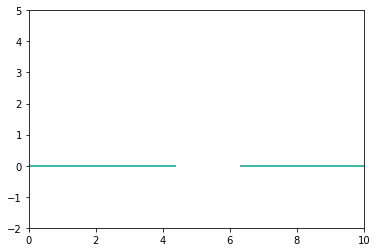

In [36]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML
import numpy as np
import sympy as sym
%matplotlib inline
num1 = (4.354)/0.1
num2 = (10-4.354)/0.1
x1 = np.linspace(0,4.354,100)
x2 = np.linspace(6.335,10,100)
y1 = sym.zeros(100)
plt.xlim([0,10])
plt.ylim([-2,5])
plt.plot(x1,y1)
plt.plot(x2,y1)

